# OpenClassrooms - Ingenieur IA
# Projet 4 - PretADepenser

## Objectifs du projet : 
- **Développer un algorithme de scoring**
- **Le modèle doit être interprétable**


## Plan :
**A - Exploration préliminaire du jeu de données**
- 1 - Chargement des données
- 2 - Exploration préliminaire des données avant nettoyage

**B - Nettoyage et analyse exploratoire des données**
- 1 - Traitement des doublons
- 2 - Traitement des valeurs manquantes
- 3 - Traitement des types des colonnes
- 4 - Analyse des données
- 5 - Copie et sauvegarde des donnée nettoyées

**C - PreProcessing**
- 1 - Création d'un jeu de données d'entrainement et de test
- 2 - Création de nouvelles variables métier (Feature Engineering)
- 3 - Imputation / Encodage / Standardisation
- 4 - Ré-échantillonage des données
- 5 - Sélection des variables (Feature Selection)

**D - Modélisation**
- 1 - Choix de la métrique adaptée à l'objectif et l'aspect métier
- 2 - Modèles
    - Modèles linéaires
    - Modèles non linéaires
    - Modèles ensemblistes
    - Modèle de référence
- 3 - Entrainement
- 4 - Evaluation
- 5 - Optimisation en utilisant le seuil de décision
- 6 - Prédiction
- 7 - Interprétation - Importance des variables

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import shap

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import classification_report
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_recall_curve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFECV
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_predict
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold

from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb

from sklearn import set_config
set_config(display='diagram')

import warnings
warnings.filterwarnings('ignore')

# A - Présentation générale du jeu de données 

# 1 - Chargement des données

In [2]:
df = pd.read_csv('application_train.csv')

## Type récupéré

In [3]:
type(df)

pandas.core.frame.DataFrame

## Copie des données

In [4]:
data = df.copy()

## Renommage des colonnes au format Python correct

In [5]:
data.columns = [col.replace("-", "_") for col in data.columns]
data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

# 2 - Exploration préliminaire des données avant nettoyage

## Volumétrie des données : nombre de lignes et de colonnes

In [6]:
data_size = data.shape
nb_rows = data_size[0]
nb_columns = data_size[1]
print(f"Nombre de lignes : {nb_rows}")
print(f"Nombre de colonnes : {nb_columns}")

Nombre de lignes : 307511
Nombre de colonnes : 122


## Description de la structure des données

In [7]:
pd.set_option('display.max_column', 200)
pd.set_option('display.max_row', 200)

In [8]:
data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [9]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [10]:
data.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

### => Premières remarques (avant nettoyage) :
- 106 variables quantitatives
- 16 variables qualitatives (catégorielles)

## Indicateurs statistiques pour les variables quantitatives

In [11]:
data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

## Indicateurs statistiques pour les variables qualitatives

### Nombre de modalités

In [12]:
for col in data.select_dtypes('object'):
    print(col, " : ")
    print(data[col].nunique())
    print()

NAME_CONTRACT_TYPE  : 
2

CODE_GENDER  : 
3

FLAG_OWN_CAR  : 
2

FLAG_OWN_REALTY  : 
2

NAME_TYPE_SUITE  : 
7

NAME_INCOME_TYPE  : 
8

NAME_EDUCATION_TYPE  : 
5

NAME_FAMILY_STATUS  : 
6

NAME_HOUSING_TYPE  : 
6

OCCUPATION_TYPE  : 
18

WEEKDAY_APPR_PROCESS_START  : 
7

ORGANIZATION_TYPE  : 
58

FONDKAPREMONT_MODE  : 
4

HOUSETYPE_MODE  : 
3

WALLSMATERIAL_MODE  : 
7

EMERGENCYSTATE_MODE  : 
2



### Liste des modalités

In [13]:
for col in data.select_dtypes('object'):
    print(col, " : ")
    print(data[col].unique())
    print()

NAME_CONTRACT_TYPE  : 
['Cash loans' 'Revolving loans']

CODE_GENDER  : 
['M' 'F' 'XNA']

FLAG_OWN_CAR  : 
['N' 'Y']

FLAG_OWN_REALTY  : 
['Y' 'N']

NAME_TYPE_SUITE  : 
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']

NAME_INCOME_TYPE  : 
['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']

NAME_EDUCATION_TYPE  : 
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

NAME_FAMILY_STATUS  : 
['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']

NAME_HOUSING_TYPE  : 
['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']

OCCUPATION_TYPE  : 
['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech s

### Nombre de données pour chaque modalité

In [14]:
for col in data.select_dtypes('object'):
    print(data[col].value_counts())
    print()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAM

# B - Nettoyage et analyse exploratoire des donnéess

# 1 - Traitement des doublons

### Doublon ligne entière

In [15]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
307506    False
307507    False
307508    False
307509    False
307510    False
Length: 307511, dtype: bool

In [16]:
data.duplicated().sum()

0

In [17]:
print(data.shape)
data.drop_duplicates(inplace=True)
print(data.shape)

(307511, 122)
(307511, 122)


### **-> Il n'y a pas de doublon de ligne entière**

### Doublon de la colonne 'SK_ID_CURR' 

In [18]:
print("Data shape avant suppression des doublons 'SK_ID_CURR' : ", data.shape)
data.drop_duplicates(subset=["SK_ID_CURR"], inplace=True)
print("Data shape après suppression des doublons 'SK_ID_CURR' : ", data.shape)

Data shape avant suppression des doublons 'SK_ID_CURR' :  (307511, 122)
Data shape après suppression des doublons 'SK_ID_CURR' :  (307511, 122)


# 2 - Traitement des valeurs manquantes

In [19]:
data.isna()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0            False   False               False        False         False   
1            False   False               False        False         False   
2            False   False               False        False         False   
3            False   False               False        False         False   
4            False   False               False        False         False   
...            ...     ...                 ...          ...           ...   
307506       False   False               False        False         False   
307507       False   False               False        False         False   
307508       False   False               False        False         False   
307509       False   False               False        False         False   
307510       False   False               False        False         False   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                 False         False             False       False   
1                 False         False             False       False   
2                 False         False             False       False   
3                 False         False             False       False   
4                 False         False             False       False   
...                 ...           ...               ...         ...   
307506            False         False             False       False   
307507            False         False             False       False   
307508            False         False             False       False   
307509            False         False             False       False   
307510            False         False             False       False   

        AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  \
0             False            False            False             False   
1             False            False            False             False   
2             False            False            False             False   
3             False            False            False             False   
4             False            False            False             False   
...             ...              ...              ...               ...   
307506        False            False            False             False   
307507        False            False            False             False   
307508        False            False            False             False   
307509        False            False            False             False   
307510        False            False            False             False   

        NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0                     False               False              False   
1                     False               False              False   
2                     False               False              False   
3                     False               False              False   
4                     False               False              False   
...                     ...                 ...                ...   
307506                False               False              False   
307507                False               False              False   
307508                False               False              False   
307509                False               False              False   
307510                False               False              False   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                            False       False          False   
1                            False       False          False   
2                            False       False          False   
3                            False       False          False   
4                            False       False          False   
...                            ...         ...            ...   
307506                       Fals

## Identification des données manquantes

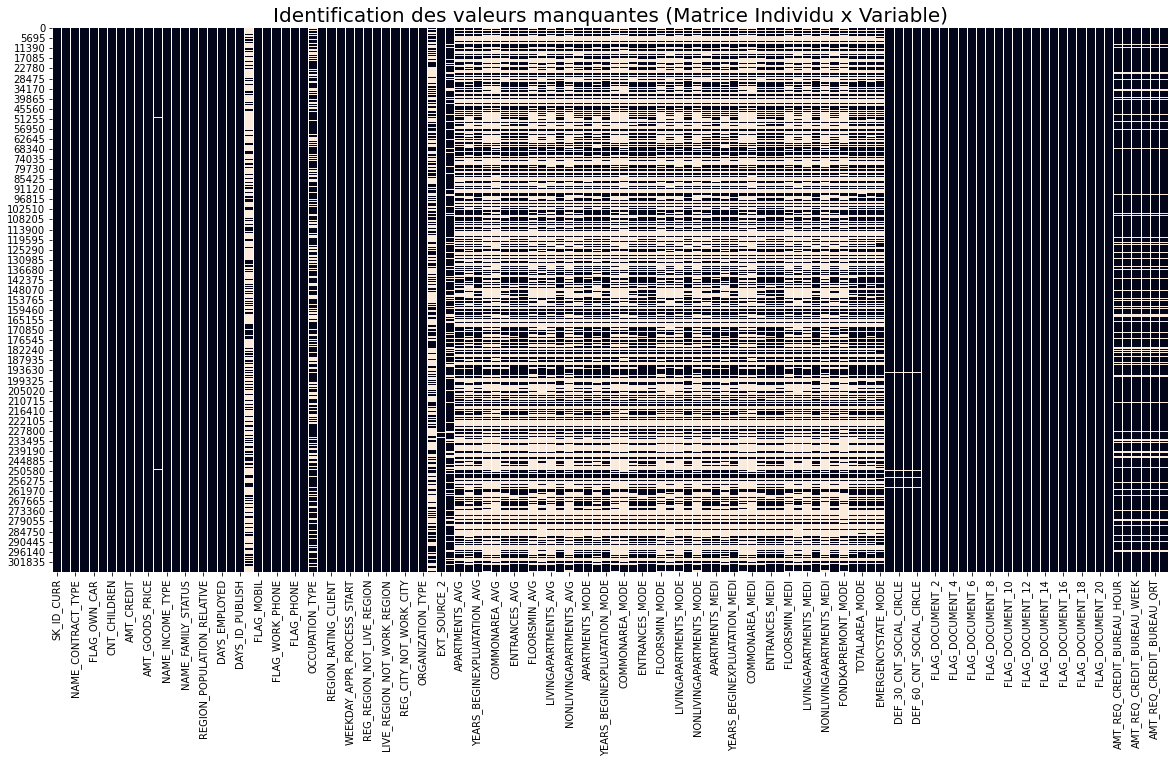

In [20]:
plt.figure(figsize=(20,10))
plt.title("Identification des valeurs manquantes (Matrice Individu x Variable)", fontsize=20)
sns.heatmap(data.isna(), cbar=False)
plt.show()

In [21]:
total_missing_value_number = data.isna().sum().sum()
print("Nombre total de valeurs manquantes dans le dataset = ", total_missing_value_number)

Nombre total de valeurs manquantes dans le dataset =  9152465


In [22]:
missing_value_number_per_column = data.isna().sum().sort_values(ascending=False)
print("Nombre de valeurs manquantes par colonne :")
missing_value_number_per_column

Nombre de valeurs manquantes par colonne :


COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_MEDI        213514
NONLIVINGAPARTMENTS_AVG         213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MEDI           210199
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
FLOORSMIN_MEDI                  208642
FLOORSMIN_MODE                  208642
FLOORSMIN_AVG                   208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_AVG                 204488
YEARS_BUILD_MODE                204488
OWN_CAR_AGE                     202929
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
LANDAREA_MEDI                   182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MEDI              169682
NONLIVINGAREA_AVG        

In [23]:
total_percentage_missing_value = (data.isna().sum().sum() / data.size)
print("Pourcentage total de valeurs manquantes dans le dataset = ", total_percentage_missing_value)

Pourcentage total de valeurs manquantes dans le dataset =  0.24395941907129431


In [24]:
missing_value_percentage_per_column = (data.isna().sum() / data.shape[0]).sort_values(ascending=False)
print("Pourcentage de valeurs manquantes par colonne : ")
missing_value_percentage_per_column

Pourcentage de valeurs manquantes par colonne : 


COMMONAREA_MEDI                 0.698723
COMMONAREA_AVG                  0.698723
COMMONAREA_MODE                 0.698723
NONLIVINGAPARTMENTS_MODE        0.694330
NONLIVINGAPARTMENTS_MEDI        0.694330
NONLIVINGAPARTMENTS_AVG         0.694330
FONDKAPREMONT_MODE              0.683862
LIVINGAPARTMENTS_MEDI           0.683550
LIVINGAPARTMENTS_MODE           0.683550
LIVINGAPARTMENTS_AVG            0.683550
FLOORSMIN_MEDI                  0.678486
FLOORSMIN_MODE                  0.678486
FLOORSMIN_AVG                   0.678486
YEARS_BUILD_MEDI                0.664978
YEARS_BUILD_AVG                 0.664978
YEARS_BUILD_MODE                0.664978
OWN_CAR_AGE                     0.659908
LANDAREA_MODE                   0.593767
LANDAREA_AVG                    0.593767
LANDAREA_MEDI                   0.593767
BASEMENTAREA_MEDI               0.585160
BASEMENTAREA_AVG                0.585160
BASEMENTAREA_MODE               0.585160
EXT_SOURCE_1                    0.563811
NONLIVINGAREA_ME

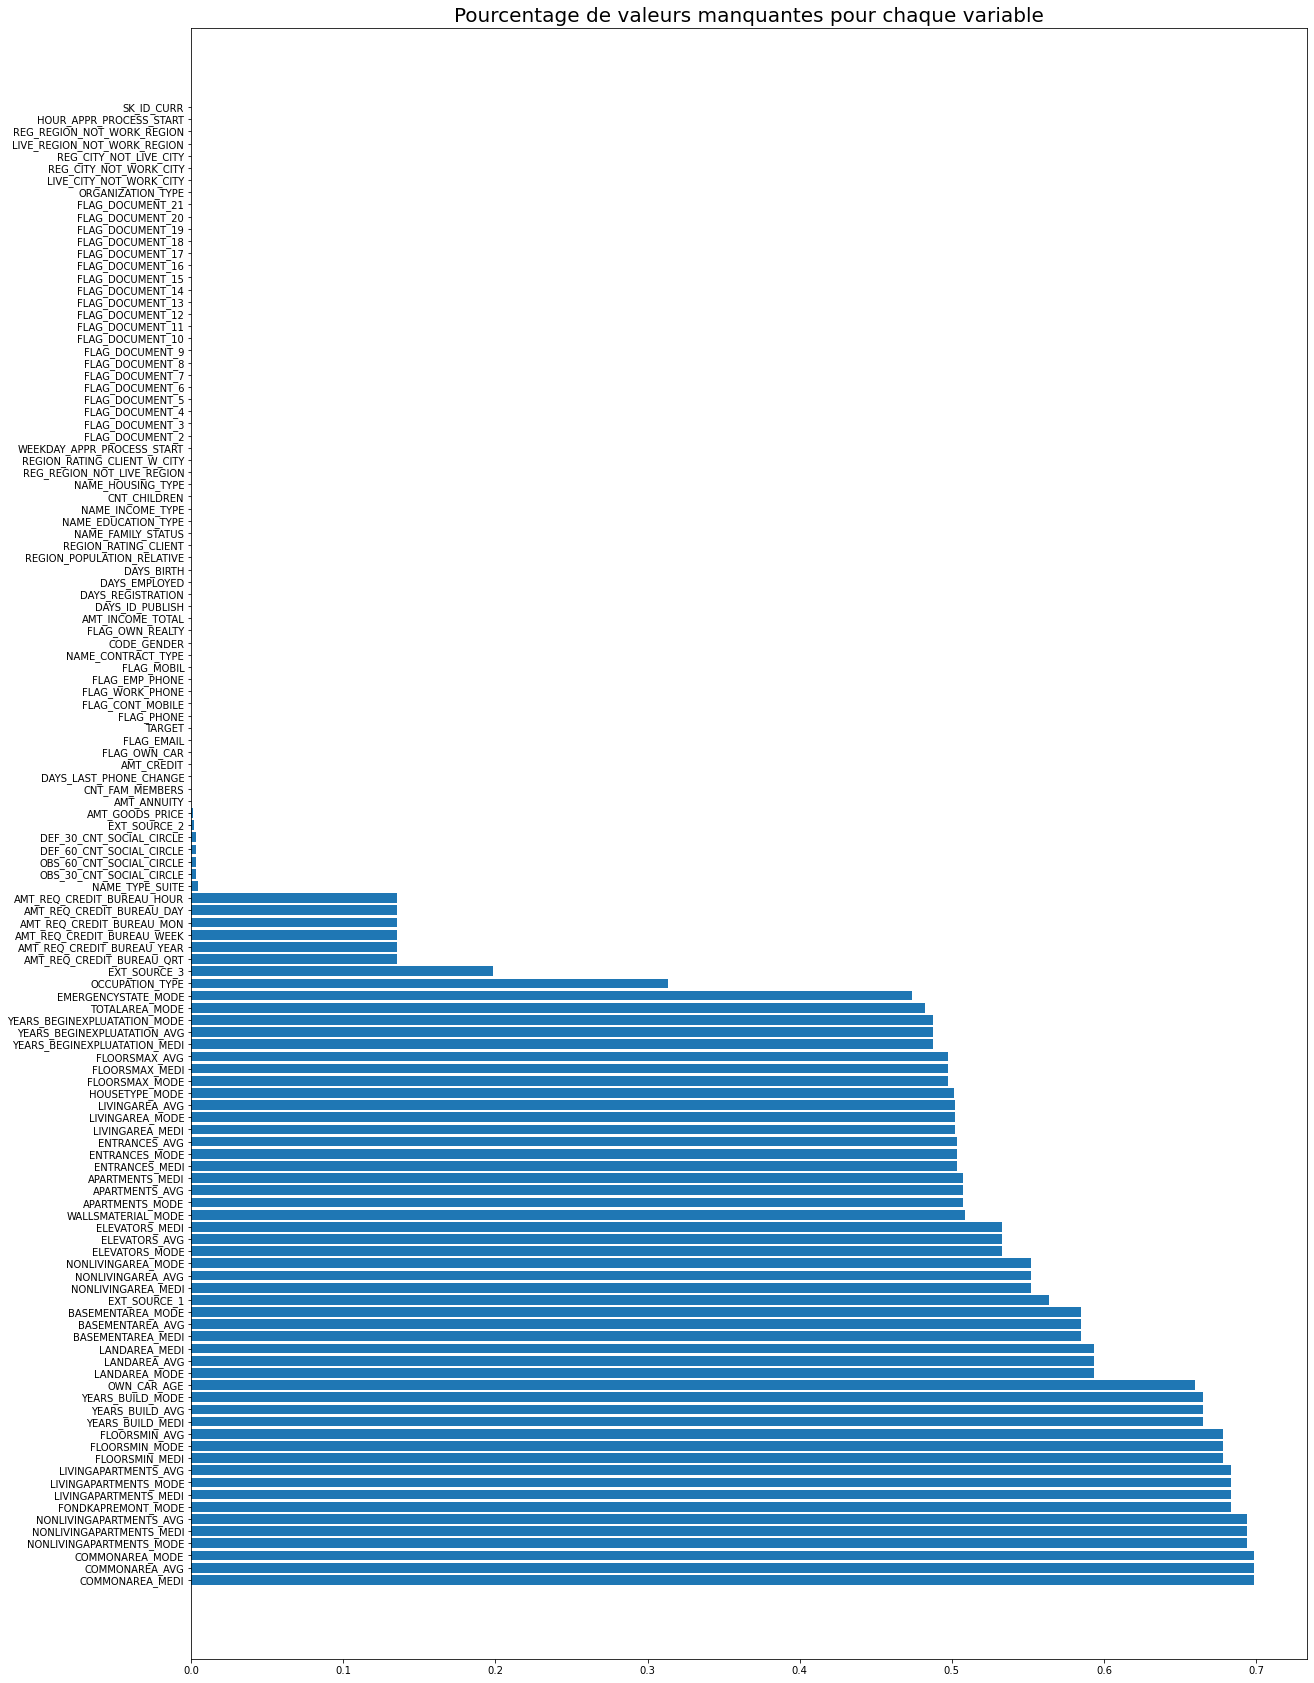

In [25]:
plt.figure(figsize=(20,30))
plt.barh(missing_value_percentage_per_column.index, missing_value_percentage_per_column.values)
plt.title("Pourcentage de valeurs manquantes pour chaque variable", fontsize=20)
plt.show()

## Suppression des données manquantes

### Suppression des colonnes avec trop de données manquantes : taux de valeur manquante maximum = 40%

In [26]:
missing_value_percentage_per_column > 0.4

COMMONAREA_MEDI                  True
COMMONAREA_AVG                   True
COMMONAREA_MODE                  True
NONLIVINGAPARTMENTS_MODE         True
NONLIVINGAPARTMENTS_MEDI         True
NONLIVINGAPARTMENTS_AVG          True
FONDKAPREMONT_MODE               True
LIVINGAPARTMENTS_MEDI            True
LIVINGAPARTMENTS_MODE            True
LIVINGAPARTMENTS_AVG             True
FLOORSMIN_MEDI                   True
FLOORSMIN_MODE                   True
FLOORSMIN_AVG                    True
YEARS_BUILD_MEDI                 True
YEARS_BUILD_AVG                  True
YEARS_BUILD_MODE                 True
OWN_CAR_AGE                      True
LANDAREA_MODE                    True
LANDAREA_AVG                     True
LANDAREA_MEDI                    True
BASEMENTAREA_MEDI                True
BASEMENTAREA_AVG                 True
BASEMENTAREA_MODE                True
EXT_SOURCE_1                     True
NONLIVINGAREA_MEDI               True
NONLIVINGAREA_AVG                True
NONLIVINGARE

In [27]:
colums_too_empty = missing_value_percentage_per_column[missing_value_percentage_per_column > 0.4].index
colums_too_empty

Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAPARTMENTS_AVG', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAPARTMENTS_AVG', 'FLOORSMIN_MEDI', 'FLOORSMIN_MODE',
       'FLOORSMIN_AVG', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_AVG',
       'YEARS_BUILD_MODE', 'OWN_CAR_AGE', 'LANDAREA_MODE', 'LANDAREA_AVG',
       'LANDAREA_MEDI', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG',
       'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MEDI',
       'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'ELEVATORS_MODE',
       'ELEVATORS_AVG', 'ELEVATORS_MEDI', 'WALLSMATERIAL_MODE',
       'APARTMENTS_MODE', 'APARTMENTS_AVG', 'APARTMENTS_MEDI',
       'ENTRANCES_MEDI', 'ENTRANCES_MODE', 'ENTRANCES_AVG', 'LIVINGAREA_MEDI',
       'LIVINGAREA_MODE', 'LIVINGAREA_AVG', 'HOUSETYPE_MODE', 'FLOORSMAX_MODE',
       'FLOORSMAX_MEDI', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MEDI

In [28]:
data.drop(columns = colums_too_empty, inplace=True)
data.shape

(307511, 73)

### Analyse des colonnes supprimés 

 49 variables supprimées pour cause de données manquantes :
- la majorité (47) concernent principalement des informations sur le batiment d'habitation du client (nombre d'étages, ascenseur...)
- EXT_SOURCE_1 : Score normalisé provenent de source externe
- OWN_CAR_AGE : Age de la voiture du client    

### Après suppression des colonnes avec trop de données manquantes

In [29]:
data.shape

(307511, 73)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

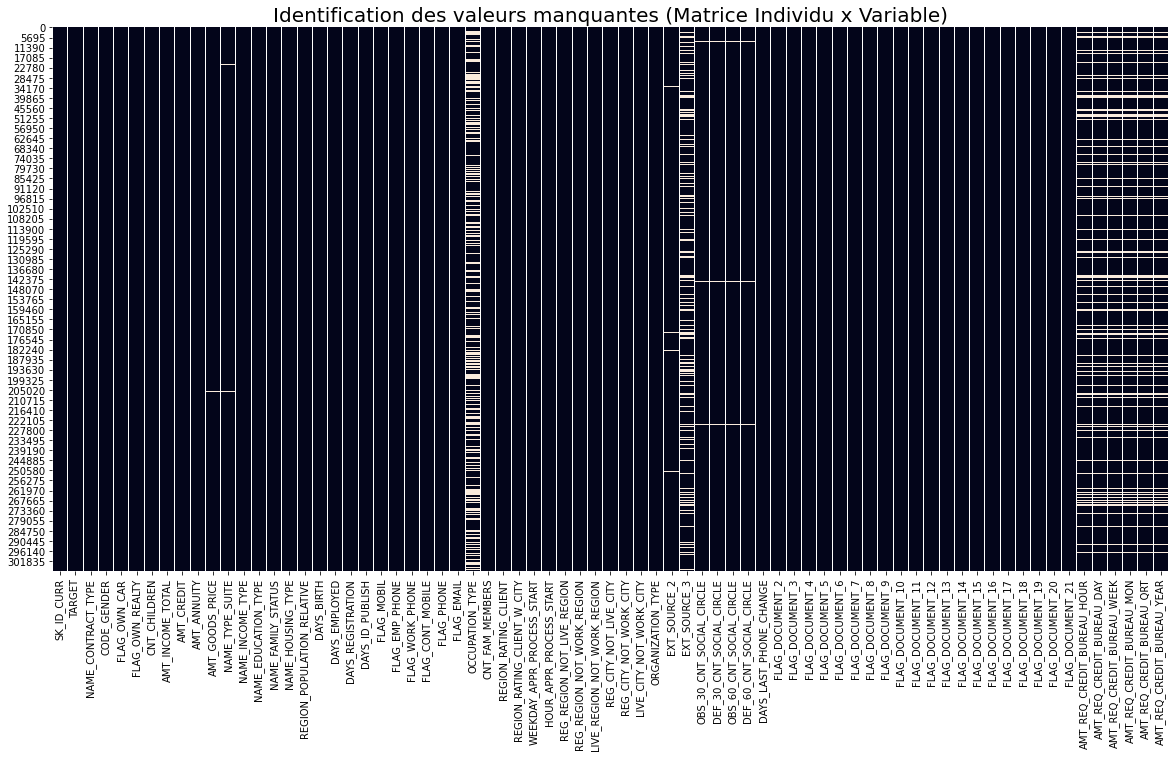

In [31]:
plt.figure(figsize=(20,10))
plt.title("Identification des valeurs manquantes (Matrice Individu x Variable)", fontsize=20)
sns.heatmap(data.isna(), cbar=False)
plt.show()

In [32]:
total_percentage_nan_value = (data.isna().sum().sum() / data.size)
print("Pourcentage total de valeurs manquantes dans le dataset = ", total_percentage_nan_value)

Pourcentage total de valeurs manquantes dans le dataset =  0.018388873314833642


In [33]:
nan_value_percentage_per_column = (data.isna().sum() / data.shape[0]).sort_values(ascending=False)
print("Pourcentage de valeurs manquantes par colonne : ")
nan_value_percentage_per_column

Pourcentage de valeurs manquantes par colonne : 


OCCUPATION_TYPE                0.313455
EXT_SOURCE_3                   0.198253
AMT_REQ_CREDIT_BUREAU_YEAR     0.135016
AMT_REQ_CREDIT_BUREAU_MON      0.135016
AMT_REQ_CREDIT_BUREAU_WEEK     0.135016
AMT_REQ_CREDIT_BUREAU_DAY      0.135016
AMT_REQ_CREDIT_BUREAU_HOUR     0.135016
AMT_REQ_CREDIT_BUREAU_QRT      0.135016
NAME_TYPE_SUITE                0.004201
OBS_30_CNT_SOCIAL_CIRCLE       0.003320
DEF_30_CNT_SOCIAL_CIRCLE       0.003320
OBS_60_CNT_SOCIAL_CIRCLE       0.003320
DEF_60_CNT_SOCIAL_CIRCLE       0.003320
EXT_SOURCE_2                   0.002146
AMT_GOODS_PRICE                0.000904
AMT_ANNUITY                    0.000039
CNT_FAM_MEMBERS                0.000007
DAYS_LAST_PHONE_CHANGE         0.000003
NAME_INCOME_TYPE               0.000000
FLAG_OWN_REALTY                0.000000
TARGET                         0.000000
FLAG_EMAIL                     0.000000
FLAG_PHONE                     0.000000
FLAG_CONT_MOBILE               0.000000
NAME_CONTRACT_TYPE             0.000000


### Suppression des lignes avec beaucoup de données manquantes

In [34]:
# On ajoute une colonne au DataFrame avec le taux de remplissage par ligne (on travaille sur l'axis=1)

In [35]:
data["taux_remplissage"] = data.notna().sum(axis=1) / data.shape[1]
data["taux_remplissage"]

0         1.000000
1         0.986301
2         1.000000
3         0.904110
4         0.986301
            ...   
307506    0.904110
307507    0.890411
307508    1.000000
307509    1.000000
307510    1.000000
Name: taux_remplissage, Length: 307511, dtype: float64

<AxesSubplot:title={'center':'Taux de remplissage des lignes'}, ylabel='Frequency'>

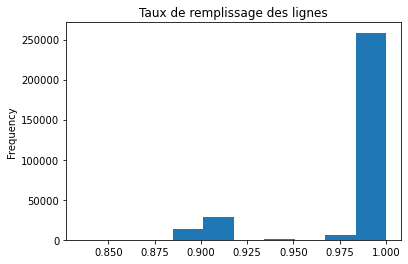

In [36]:
data["taux_remplissage"].sort_values().plot(kind='hist', title="Taux de remplissage des lignes")

In [37]:
print(f"Nombre de lignes avant suppression lignes : {data.shape[0]}")
print(f"Nombre de colonnes avant suppression lignes : {data.shape[1]-1}")


data = data[data["taux_remplissage"] > 0.4]
data.drop(columns=["taux_remplissage"], inplace=True) #On supprime la colone taux_remplissage que l'on avait ajoutée

print(f"Nombre de lignes après suppression lignes : {data.shape[0]}")
print(f"Nombre de colonnes après suppression lignes : {data.shape[1]}")

Nombre de lignes avant suppression lignes : 307511
Nombre de colonnes avant suppression lignes : 73
Nombre de lignes après suppression lignes : 307511
Nombre de colonnes après suppression lignes : 73


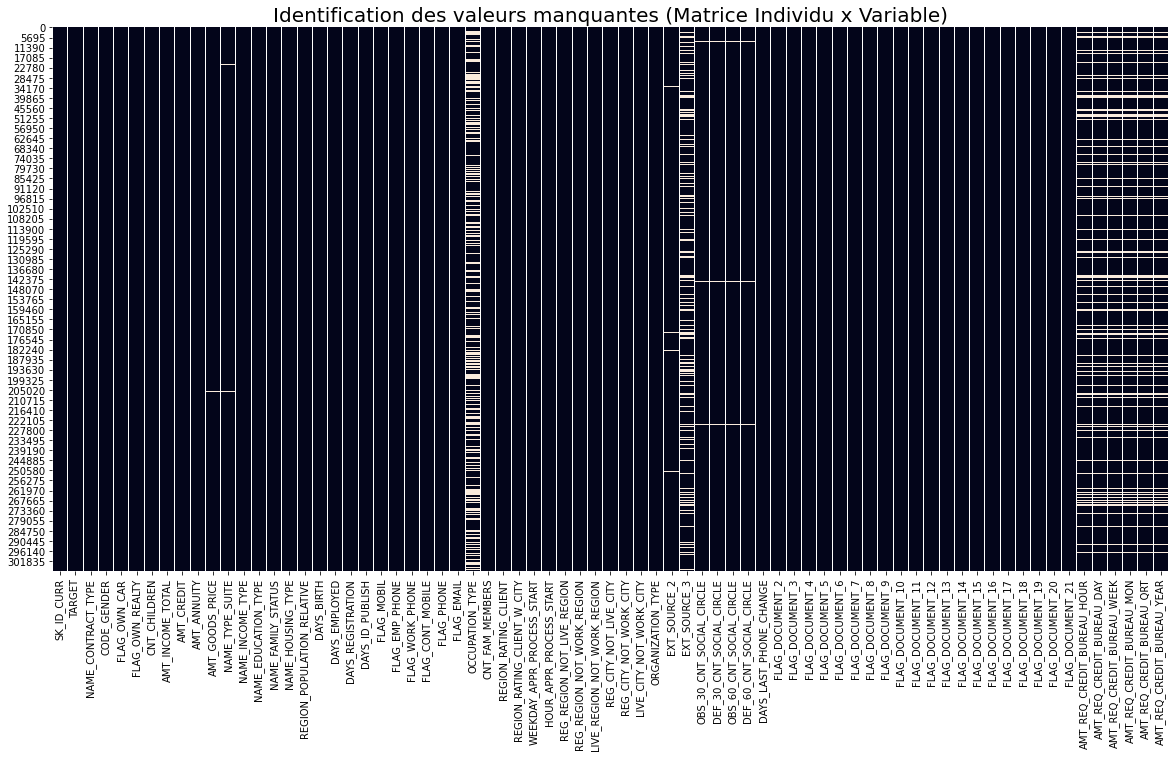

In [38]:
plt.figure(figsize=(20,10))
plt.title("Identification des valeurs manquantes (Matrice Individu x Variable)", fontsize=20)
sns.heatmap(data.isna(), cbar=False)
plt.show()

### -> Il y a moins de lignes creuses

### **Après suppression des données manquantes**

In [39]:
data.shape

(307511, 73)

In [40]:
data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

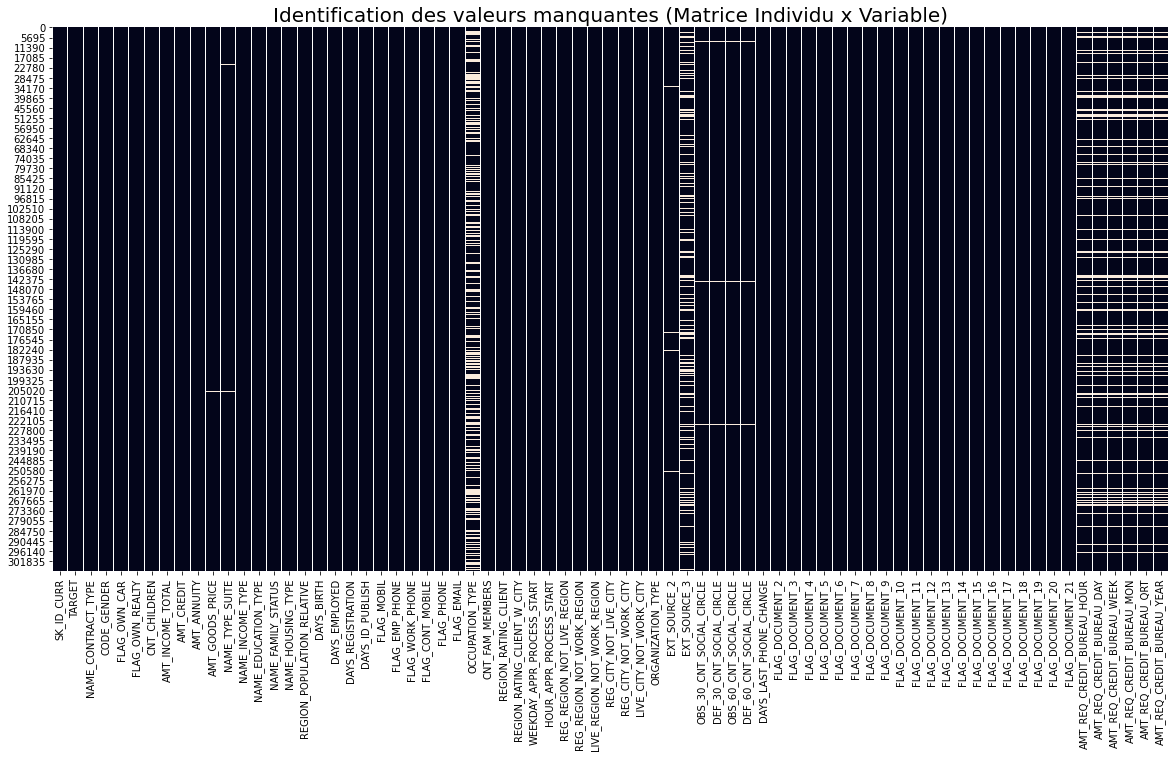

In [42]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isna(), cbar=False)
plt.title("Identification des valeurs manquantes (Matrice Individu x Variable)", fontsize=20)
plt.show()

# 3 - Traitement des types des colonnes

### Avant traitement des colonnes

In [43]:
data.dtypes.value_counts()

int64      41
float64    20
object     12
dtype: int64

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [45]:
data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [46]:
for col in data.select_dtypes('object'):
    print(col, " : ")
    print(data[col].nunique())
    print()

NAME_CONTRACT_TYPE  : 
2

CODE_GENDER  : 
3

FLAG_OWN_CAR  : 
2

FLAG_OWN_REALTY  : 
2

NAME_TYPE_SUITE  : 
7

NAME_INCOME_TYPE  : 
8

NAME_EDUCATION_TYPE  : 
5

NAME_FAMILY_STATUS  : 
6

NAME_HOUSING_TYPE  : 
6

OCCUPATION_TYPE  : 
18

WEEKDAY_APPR_PROCESS_START  : 
7

ORGANIZATION_TYPE  : 
58



In [47]:
for col in data.select_dtypes('object'):
    print(col, " : ")
    print(data[col].unique())
    print()

NAME_CONTRACT_TYPE  : 
['Cash loans' 'Revolving loans']

CODE_GENDER  : 
['M' 'F' 'XNA']

FLAG_OWN_CAR  : 
['N' 'Y']

FLAG_OWN_REALTY  : 
['Y' 'N']

NAME_TYPE_SUITE  : 
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']

NAME_INCOME_TYPE  : 
['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']

NAME_EDUCATION_TYPE  : 
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

NAME_FAMILY_STATUS  : 
['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']

NAME_HOUSING_TYPE  : 
['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']

OCCUPATION_TYPE  : 
['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech s

In [48]:
for col in data.select_dtypes('int64'):
    print(col, " : ")
    print(data[col].nunique())
    print()

SK_ID_CURR  : 
307511

TARGET  : 
2

CNT_CHILDREN  : 
15

DAYS_BIRTH  : 
17460

DAYS_EMPLOYED  : 
12574

DAYS_ID_PUBLISH  : 
6168

FLAG_MOBIL  : 
2

FLAG_EMP_PHONE  : 
2

FLAG_WORK_PHONE  : 
2

FLAG_CONT_MOBILE  : 
2

FLAG_PHONE  : 
2

FLAG_EMAIL  : 
2

REGION_RATING_CLIENT  : 
3

REGION_RATING_CLIENT_W_CITY  : 
3

HOUR_APPR_PROCESS_START  : 
24

REG_REGION_NOT_LIVE_REGION  : 
2

REG_REGION_NOT_WORK_REGION  : 
2

LIVE_REGION_NOT_WORK_REGION  : 
2

REG_CITY_NOT_LIVE_CITY  : 
2

REG_CITY_NOT_WORK_CITY  : 
2

LIVE_CITY_NOT_WORK_CITY  : 
2

FLAG_DOCUMENT_2  : 
2

FLAG_DOCUMENT_3  : 
2

FLAG_DOCUMENT_4  : 
2

FLAG_DOCUMENT_5  : 
2

FLAG_DOCUMENT_6  : 
2

FLAG_DOCUMENT_7  : 
2

FLAG_DOCUMENT_8  : 
2

FLAG_DOCUMENT_9  : 
2

FLAG_DOCUMENT_10  : 
2

FLAG_DOCUMENT_11  : 
2

FLAG_DOCUMENT_12  : 
2

FLAG_DOCUMENT_13  : 
2

FLAG_DOCUMENT_14  : 
2

FLAG_DOCUMENT_15  : 
2

FLAG_DOCUMENT_16  : 
2

FLAG_DOCUMENT_17  : 
2

FLAG_DOCUMENT_18  : 
2

FLAG_DOCUMENT_19  : 
2

FLAG_DOCUMENT_20  : 
2

FLAG_DOCU

In [49]:
for col in data.select_dtypes('int64'):
    print(col, " : ")
    print(data[col].unique())
    print()

SK_ID_CURR  : 
[100002 100003 100004 ... 456253 456254 456255]

TARGET  : 
[1 0]

CNT_CHILDREN  : 
[ 0  1  2  3  4  7  5  6  8  9 11 12 10 19 14]

DAYS_BIRTH  : 
[ -9461 -16765 -19046 ...  -7951  -7857 -25061]

DAYS_EMPLOYED  : 
[  -637  -1188   -225 ... -12971 -11084  -8694]

DAYS_ID_PUBLISH  : 
[-2120  -291 -2531 ... -6194 -5854 -6211]

FLAG_MOBIL  : 
[1 0]

FLAG_EMP_PHONE  : 
[1 0]

FLAG_WORK_PHONE  : 
[0 1]

FLAG_CONT_MOBILE  : 
[1 0]

FLAG_PHONE  : 
[1 0]

FLAG_EMAIL  : 
[0 1]

REGION_RATING_CLIENT  : 
[2 1 3]

REGION_RATING_CLIENT_W_CITY  : 
[2 1 3]

HOUR_APPR_PROCESS_START  : 
[10 11  9 17 16 14  8 15  7 13  6 12 19  3 18 21  4  5 20 22  1  2 23  0]

REG_REGION_NOT_LIVE_REGION  : 
[0 1]

REG_REGION_NOT_WORK_REGION  : 
[0 1]

LIVE_REGION_NOT_WORK_REGION  : 
[0 1]

REG_CITY_NOT_LIVE_CITY  : 
[0 1]

REG_CITY_NOT_WORK_CITY  : 
[0 1]

LIVE_CITY_NOT_WORK_CITY  : 
[0 1]

FLAG_DOCUMENT_2  : 
[0 1]

FLAG_DOCUMENT_3  : 
[1 0]

FLAG_DOCUMENT_4  : 
[0 1]

FLAG_DOCUMENT_5  : 
[0 1]

FLAG_DOC

#### Remarques : 
- les variables suivantes ne prennent que 2 valeurs possibles : 0 ou 1
    - FLAG_MOBILE / FLAG_EMP_PHONE / FLAG_WORK_PHONE / FLAG_CONT_MOBILE / FLAG_PHONE / FLAG_PHONE
    - REG_REGION_NOT_LIVE_REGION / REG_REGION_NOT_WORK_REGION / LIVE_REGION_NOT_WORK_REGION / REG_CITY_NOT_LIVE_CITY / REG_CITY_NOT_WORK_CITY / LIVE_CITY_NOT_WORK_CITY 
    - FLAG_DOCUMENT 
    
    
- les variables suivantes ne prennent que 3 valeurs possibles : 1, 2 ou 3
    - REGION_RATING_CLIENT 
    - REGION_RATING_CLIENT_W_CITY 
    
-> Ce sont des variables qualitatives (catégorielles)

On pourrait les transformer en variables catégorielles mais cela ne fait pas de sens car il faudrait ensuite les encoder en valeurs numériques afin qu'elles puissent être traitées par les algorithmes d'apprentissage

In [50]:
for col in data.select_dtypes('float64'):
    print(col, " : ")
    print(data[col].nunique())
    print()

AMT_INCOME_TOTAL  : 
2548

AMT_CREDIT  : 
5603

AMT_ANNUITY  : 
13672

AMT_GOODS_PRICE  : 
1002

REGION_POPULATION_RELATIVE  : 
81

DAYS_REGISTRATION  : 
15688

CNT_FAM_MEMBERS  : 
17

EXT_SOURCE_2  : 
119831

EXT_SOURCE_3  : 
814

OBS_30_CNT_SOCIAL_CIRCLE  : 
33

DEF_30_CNT_SOCIAL_CIRCLE  : 
10

OBS_60_CNT_SOCIAL_CIRCLE  : 
33

DEF_60_CNT_SOCIAL_CIRCLE  : 
9

DAYS_LAST_PHONE_CHANGE  : 
3773

AMT_REQ_CREDIT_BUREAU_HOUR  : 
5

AMT_REQ_CREDIT_BUREAU_DAY  : 
9

AMT_REQ_CREDIT_BUREAU_WEEK  : 
9

AMT_REQ_CREDIT_BUREAU_MON  : 
24

AMT_REQ_CREDIT_BUREAU_QRT  : 
11

AMT_REQ_CREDIT_BUREAU_YEAR  : 
25



In [51]:
for col in data.select_dtypes('float64'):
    print(col, " : ")
    print(data[col].unique())
    print()

AMT_INCOME_TOTAL  : 
[202500.  270000.   67500.  ...  96768.  546250.5 113062.5]

AMT_CREDIT  : 
[ 406597.5 1293502.5  135000.  ...  181989.   743863.5 1391130. ]

AMT_ANNUITY  : 
[24700.5 35698.5  6750.  ... 71986.5 58770.  77809.5]

AMT_GOODS_PRICE  : 
[ 351000.  1129500.   135000.  ...  453465.   143977.5  743863.5]

REGION_POPULATION_RELATIVE  : 
[0.018801 0.003541 0.010032 0.008019 0.028663 0.035792 0.003122 0.018634
 0.019689 0.0228   0.015221 0.031329 0.016612 0.010006 0.020713 0.010966
 0.04622  0.025164 0.006296 0.026392 0.018029 0.019101 0.030755 0.008575
 0.01885  0.006207 0.009175 0.007305 0.007114 0.009334 0.022625 0.01452
 0.006629 0.00733  0.032561 0.00496  0.072508 0.009657 0.02461  0.003069
 0.020246 0.018209 0.009549 0.007274 0.002134 0.010276 0.003813 0.003818
 0.00712  0.0105   0.010147 0.010643 0.008866 0.00702  0.002506 0.005313
 0.006233 0.008474 0.005144 0.011657 0.008625 0.014464 0.004849 0.006008
 0.00963  0.005002 0.006852 0.011703 0.006305 0.010556 0.00823  

[ 0. nan  1.  2.  3.  4.]

AMT_REQ_CREDIT_BUREAU_DAY  : 
[ 0. nan  1.  3.  2.  4.  5.  6.  9.  8.]

AMT_REQ_CREDIT_BUREAU_WEEK  : 
[ 0. nan  1.  3.  2.  4.  5.  6.  8.  7.]

AMT_REQ_CREDIT_BUREAU_MON  : 
[ 0. nan  1.  2.  6.  5.  3.  7.  9.  4. 11.  8. 16. 12. 14. 10. 13. 17.
 24. 19. 15. 23. 18. 27. 22.]

AMT_REQ_CREDIT_BUREAU_QRT  : 
[  0.  nan   1.   2.   4.   3.   8.   5.   6.   7. 261.  19.]

AMT_REQ_CREDIT_BUREAU_YEAR  : 
[ 1.  0. nan  2.  4.  5.  3.  8.  6.  9.  7. 10. 11. 13. 16. 12. 25. 23.
 15. 14. 22. 17. 19. 18. 21. 20.]



## Changement des variables de type Object -> type Category

In [52]:
for col in data.select_dtypes('object'):
    print(col)

NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
OCCUPATION_TYPE
WEEKDAY_APPR_PROCESS_START
ORGANIZATION_TYPE


In [53]:
for col in data.select_dtypes('object'):
    data[col] = data[col].astype("category")

In [54]:
data.dtypes.value_counts()

int64       41
float64     20
category     2
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
dtype: int64

### Après traitement des types des colonnes

In [55]:
data.dtypes.value_counts()

int64       41
float64     20
category     2
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
dtype: int64

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

# 4 - Analyse des données

## Structure des données

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

In [58]:
data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [59]:
data.dtypes.value_counts()

int64       41
float64     20
category     2
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
dtype: int64

### 73 variables :
- 12 variables qualitatives
- 61 variables quantitatives (dont 41 de type int et 20 de type float)

## Volumétrie des données

In [60]:
data_size = data.shape
nb_rows = data_size[0]
nb_columns = data_size[1]
print(f"Nombre de lignes : {nb_rows}")
print(f"Nombre de colonnes : {nb_columns}")

Nombre de lignes : 307511
Nombre de colonnes : 73


## Variables qualitatives

### Indicateurs statistiques

#### Nombre de modalités

In [61]:
for col in data.select_dtypes('category'):
    print(col, " : ")
    print(data[col].nunique())
    print()

NAME_CONTRACT_TYPE  : 
2

CODE_GENDER  : 
3

FLAG_OWN_CAR  : 
2

FLAG_OWN_REALTY  : 
2

NAME_TYPE_SUITE  : 
7

NAME_INCOME_TYPE  : 
8

NAME_EDUCATION_TYPE  : 
5

NAME_FAMILY_STATUS  : 
6

NAME_HOUSING_TYPE  : 
6

OCCUPATION_TYPE  : 
18

WEEKDAY_APPR_PROCESS_START  : 
7

ORGANIZATION_TYPE  : 
58



#### Liste des modalités

In [62]:
for col in data.select_dtypes('category'):
    print(col, " : ")
    print(data[col].unique())
    print()

NAME_CONTRACT_TYPE  : 
['Cash loans', 'Revolving loans']
Categories (2, object): ['Cash loans', 'Revolving loans']

CODE_GENDER  : 
['M', 'F', 'XNA']
Categories (3, object): ['M', 'F', 'XNA']

FLAG_OWN_CAR  : 
['N', 'Y']
Categories (2, object): ['N', 'Y']

FLAG_OWN_REALTY  : 
['Y', 'N']
Categories (2, object): ['Y', 'N']

NAME_TYPE_SUITE  : 
['Unaccompanied', 'Family', 'Spouse, partner', 'Children', 'Other_A', NaN, 'Other_B', 'Group of people']
Categories (7, object): ['Unaccompanied', 'Family', 'Spouse, partner', 'Children', 'Other_A', 'Other_B', 'Group of people']

NAME_INCOME_TYPE  : 
['Working', 'State servant', 'Commercial associate', 'Pensioner', 'Unemployed', 'Student', 'Businessman', 'Maternity leave']
Categories (8, object): ['Working', 'State servant', 'Commercial associate', 'Pensioner', 'Unemployed', 'Student', 'Businessman', 'Maternity leave']

NAME_EDUCATION_TYPE  : 
['Secondary / secondary special', 'Higher education', 'Incomplete higher', 'Lower secondary', 'Academic de

#### Nombre de données pour chaque modalité

In [63]:
for col in data.select_dtypes('category'):
    print(col, " : ")
    print(data[col].value_counts())
    print()

NAME_CONTRACT_TYPE  : 
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

CODE_GENDER  : 
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

FLAG_OWN_CAR  : 
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

FLAG_OWN_REALTY  : 
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

NAME_TYPE_SUITE  : 
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

NAME_INCOME_TYPE  : 
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

NAME_EDUCATION_TYPE  : 
Secondary / secondary special    218391
Higher education            

### Distributions

In [64]:
cat_var_low = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
cat_var_medium = ['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE','WEEKDAY_APPR_PROCESS_START']
cat_var_high = ['OCCUPATION_TYPE', 'ORGANIZATION_TYPE']

### Variables avec un nombre de modalités peu élevé -> Diagramme circulaire (Pie Chart)

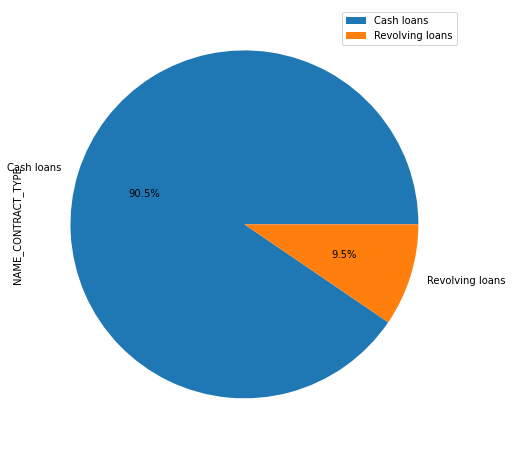

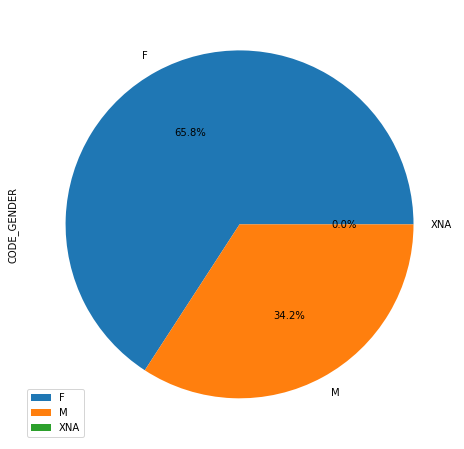

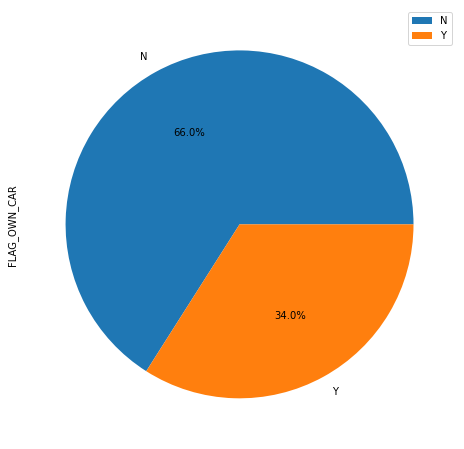

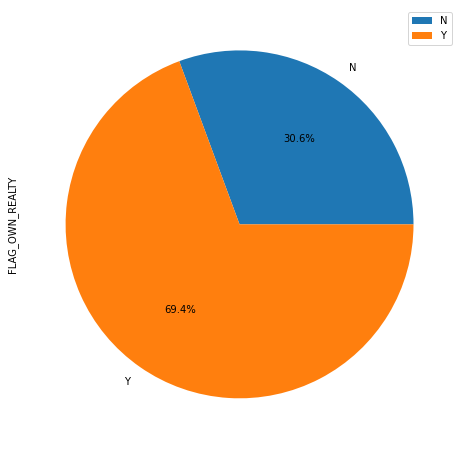

In [65]:
for var in cat_var_low:
    plt.figure(figsize=(8,8))
    data[var].value_counts().sort_index().plot.pie(autopct='%1.1f%%')
    plt.legend()
    plt.show()

### Variables avec un nombre de modalités moyen -> Diagramme en bâtons (Bar Plot)

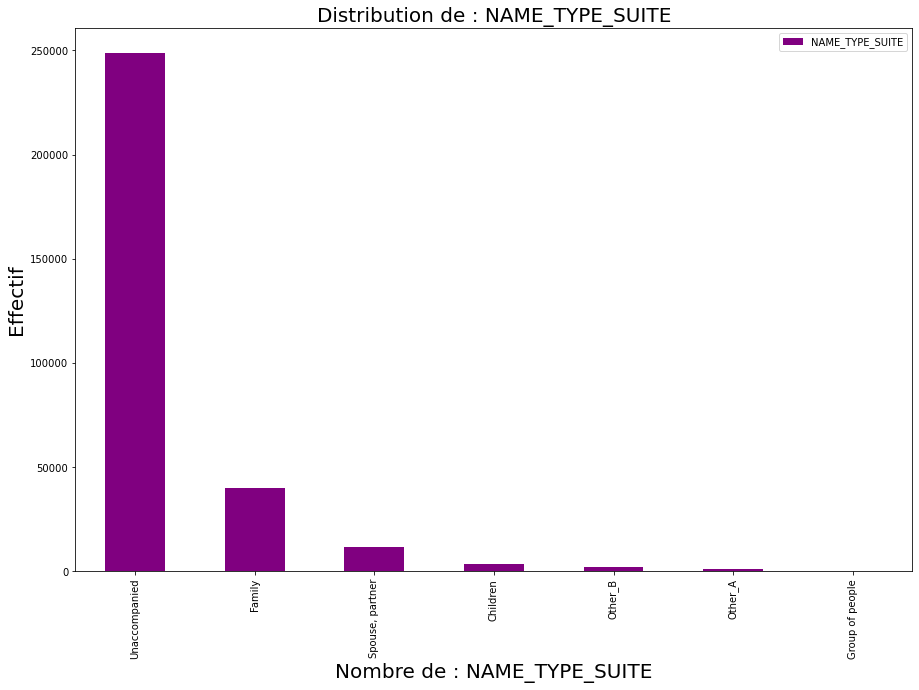

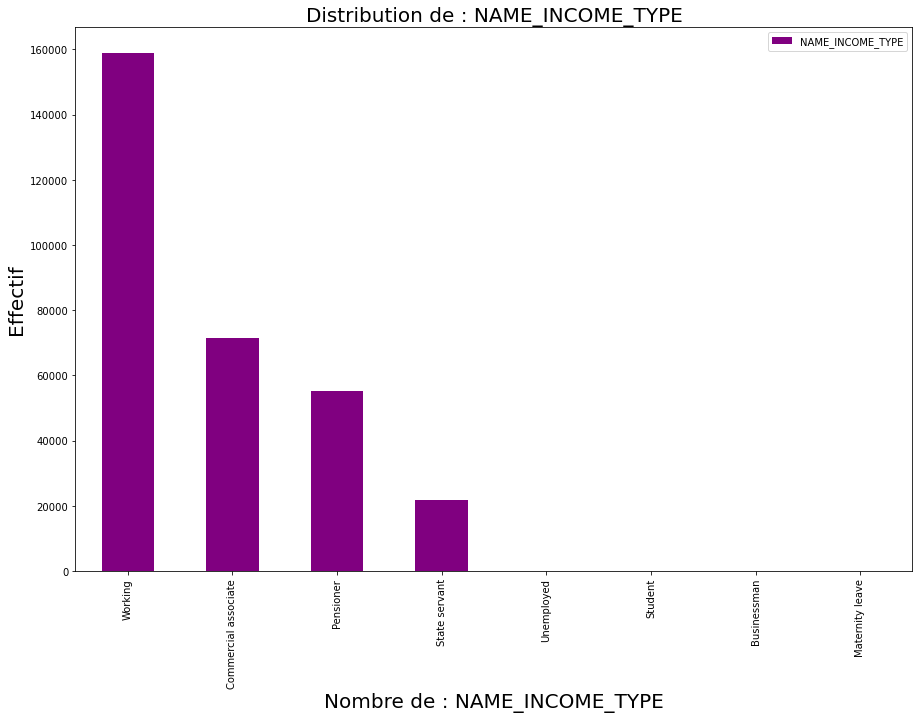

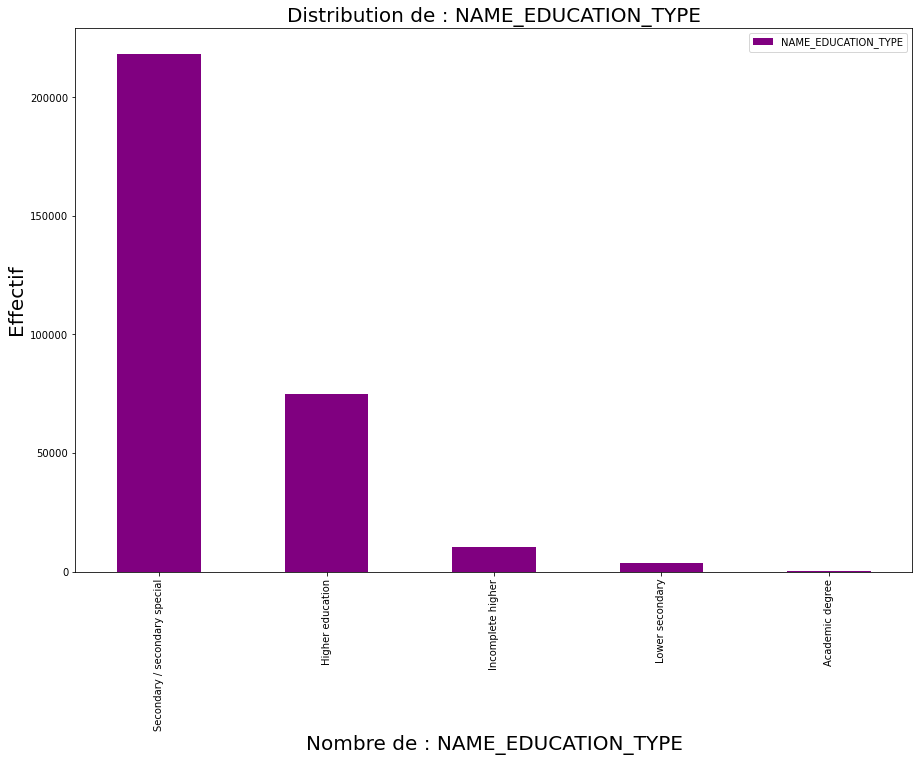

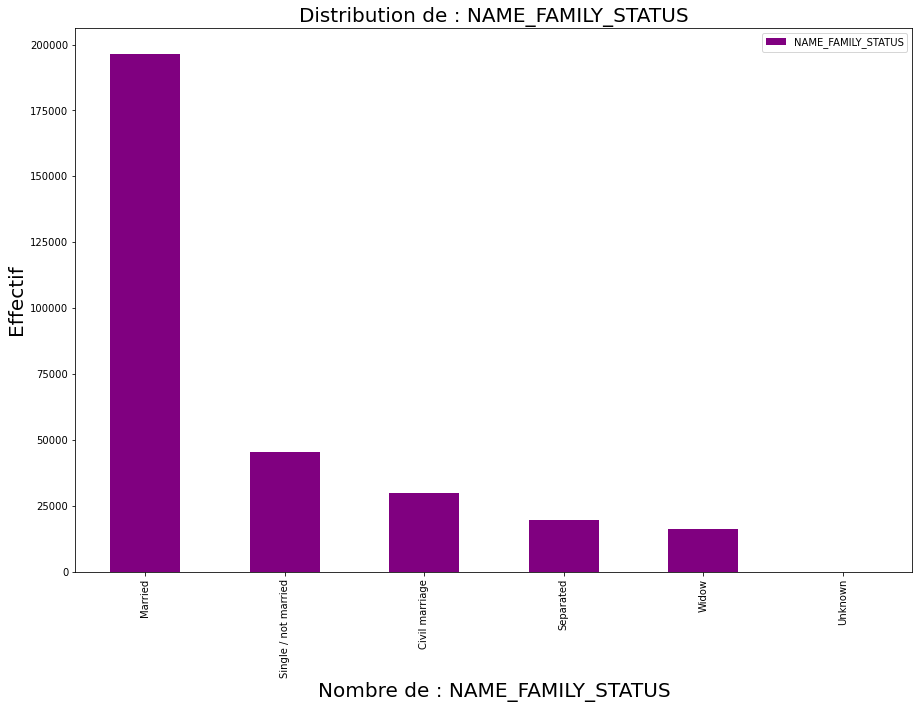

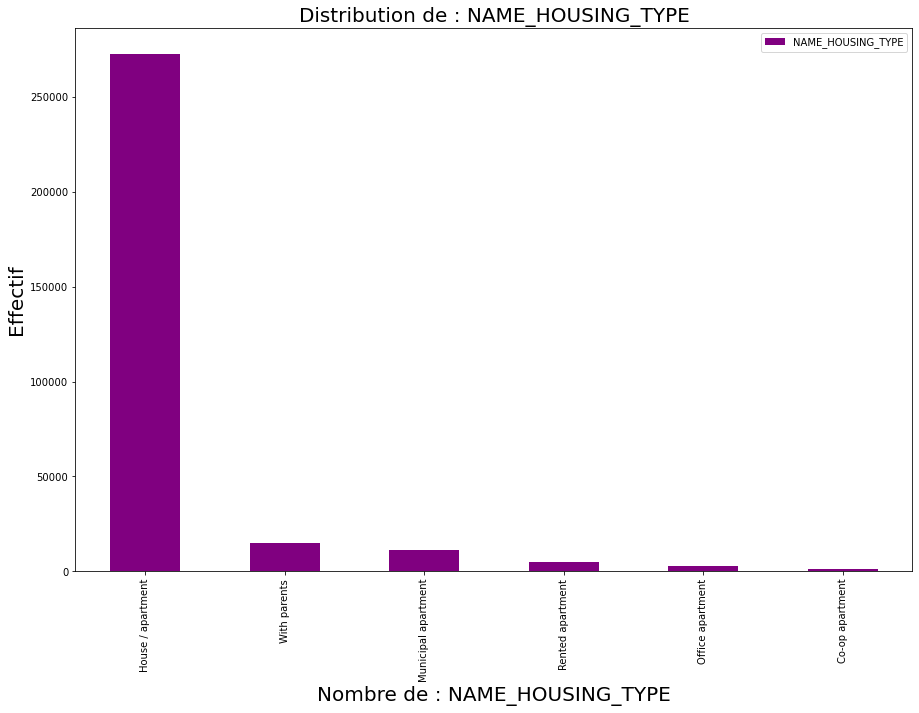

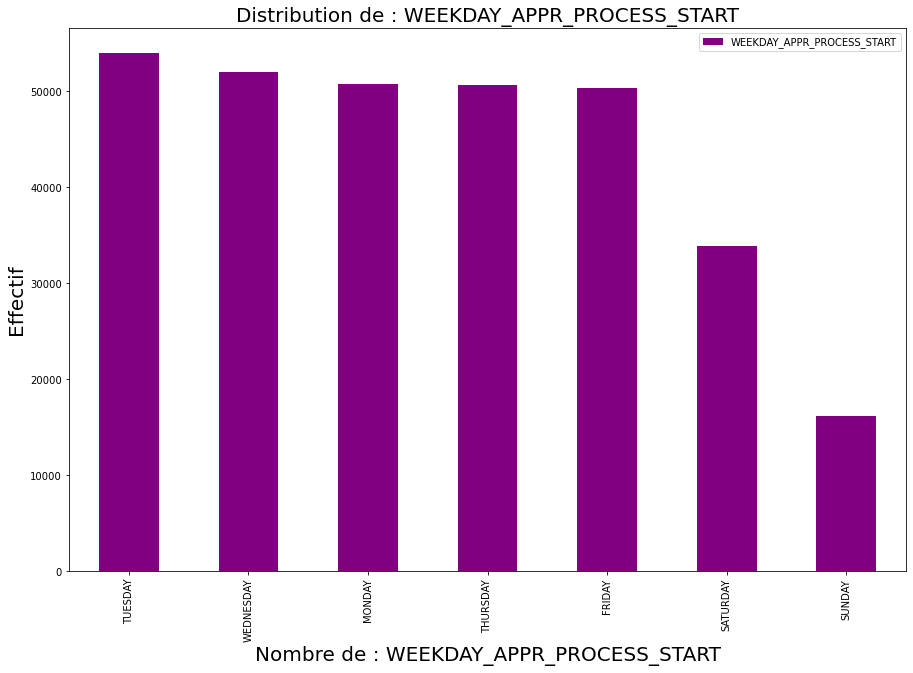

In [66]:
for var in cat_var_medium:
    plt.figure(figsize=(15,10))
    data[var].value_counts().plot.bar(label=var, color='purple')
    plt.xlabel("Nombre de : " + str(var), fontsize=20)
    plt.ylabel("Effectif", fontsize=20)
    plt.title("Distribution de : " + str(var), fontsize=20)
    plt.legend()
    plt.show()

### Variables avec un nombre de modalités élevé -> Nuage de mots (Words Cloud)

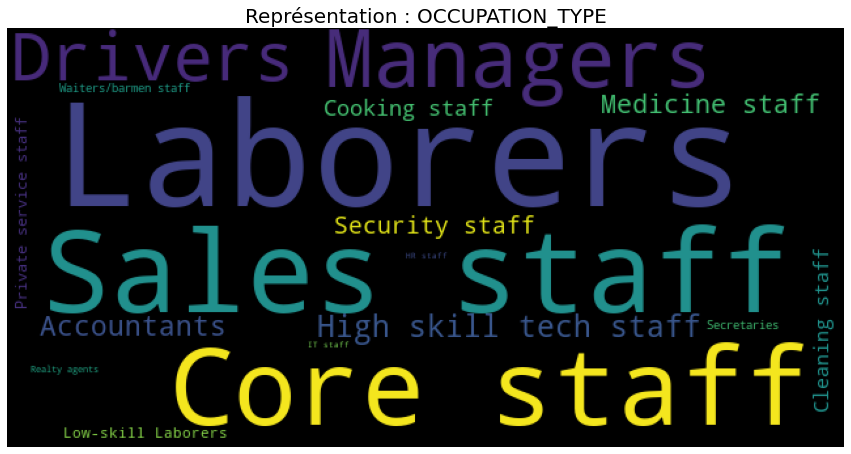

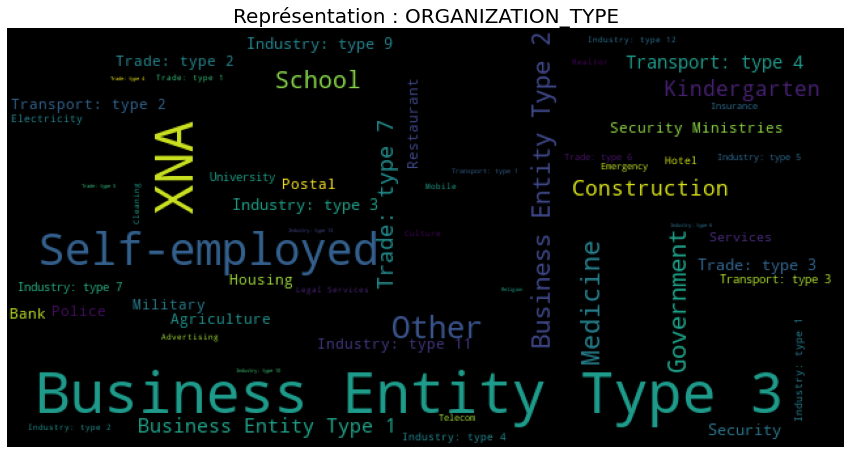

In [67]:
for var in cat_var_high:
    var_occurences = data[var].value_counts().to_dict()
    wordcloud = WordCloud(width=640, height=320).generate_from_frequencies(var_occurences)
    plt.figure(figsize=(15,10))
    plt.title("Représentation : " + var, fontsize=20)
    plt.imshow(wordcloud)
    _=plt.axis("off")

## Variables quantitatives

### Indicateurs statistiques

In [68]:
data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH     FLAG_MOBIL  FLAG_EMP_PHONE  \
count      307511.000000    307511.000000  307511.000000   307511.000000   
mean        -4986.120328     -2994.202373       0.999997        0.819889   
std          3522.886321      1509.450419       0.001803        0.384280   
min        -24672.000000     -7197.000000       0.000000        0.000000   
25%         -7479.500000     -4299.000000       1.000000        1.000000   
50%         -4504.000000     -3254.000000       1.000000        1.000000   
75%         -2010.000000     -1720.000000       1.000000        1.000000   
max             0.000000         0.000000       1.000000        1.000000   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  \
count    307511.000000     307511.000000  307511.000000  307511.000000   
mean          0.199368          0.998133       0.281066       0.056720   
std           0.399526          0.043164       0.449521       0.231307   
min           0.000000          0.000000       0.000000       0.000000   
25%           0.000000          1.000000       0.000000       0.000000   
50%           0.000000          1.000000       0.000000       0.000000   
75%           0.000000          1.000000       1.000000       0.000000   
max           1.000000          1.000000       1.000000       1.000000   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count    307509.000000         307511.000000                307511.000000   
mean          2.152665              2.052463                     2.031521   
std           0.910682              0.509034                     0.502737   
min           1.000000              1.000000                     1.000000   
25%           2.000000              2.000000                     2.000000   
50%           2.000000              2.000000                     2.000000   
75%           3.000000              2.000000                     2.000000   
max          20.000000              3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count            307511.000000               307511.000000   
mean                 12.063419                    0.015144   
std                   3.26583

### Distributions

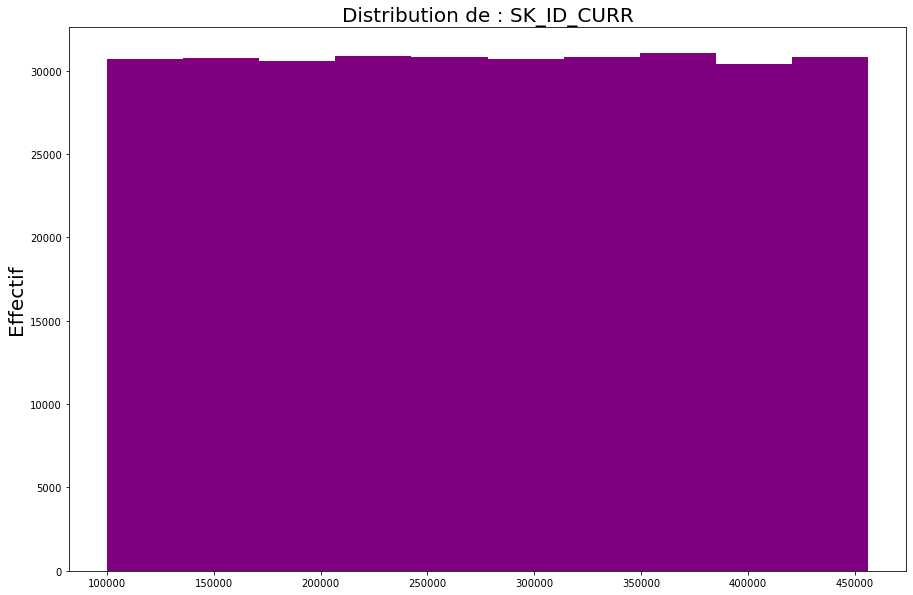

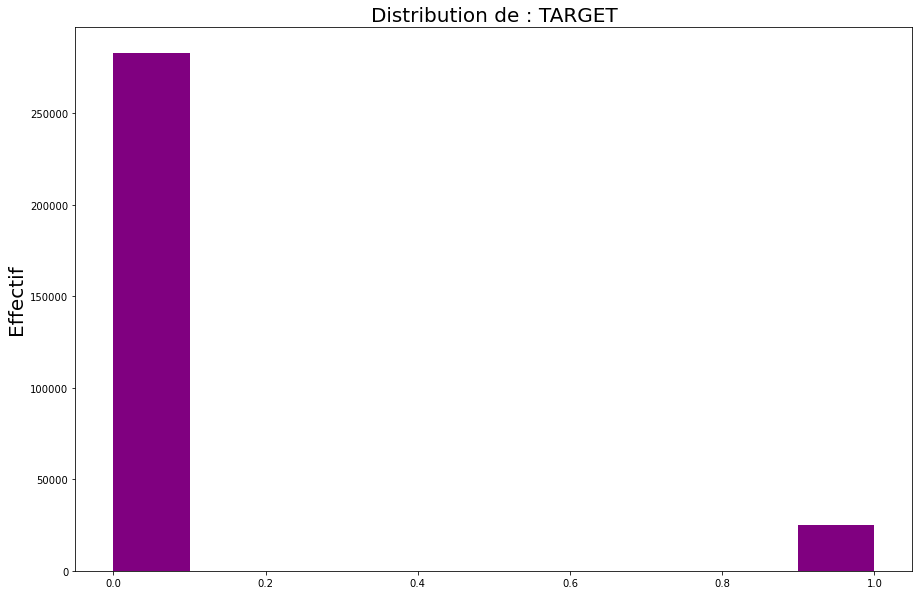

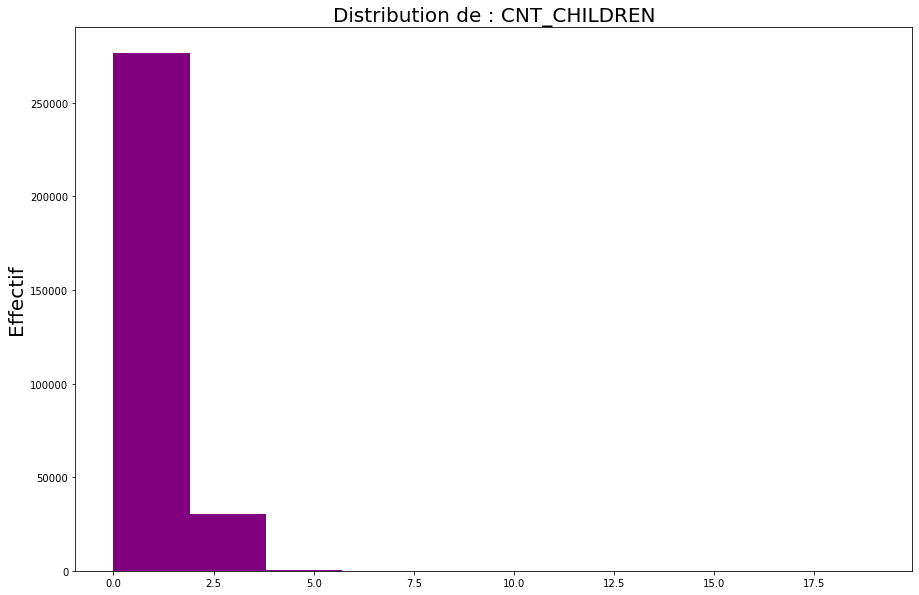

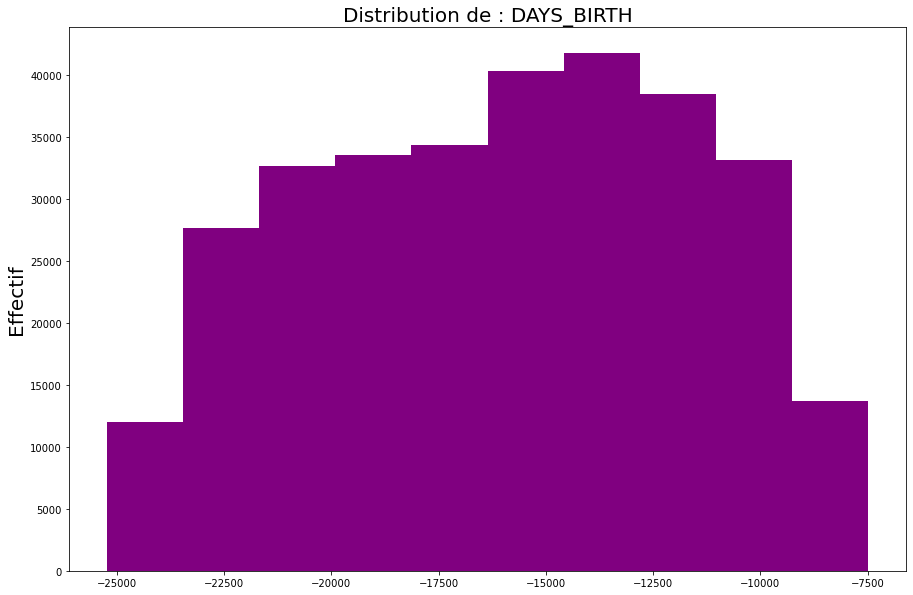

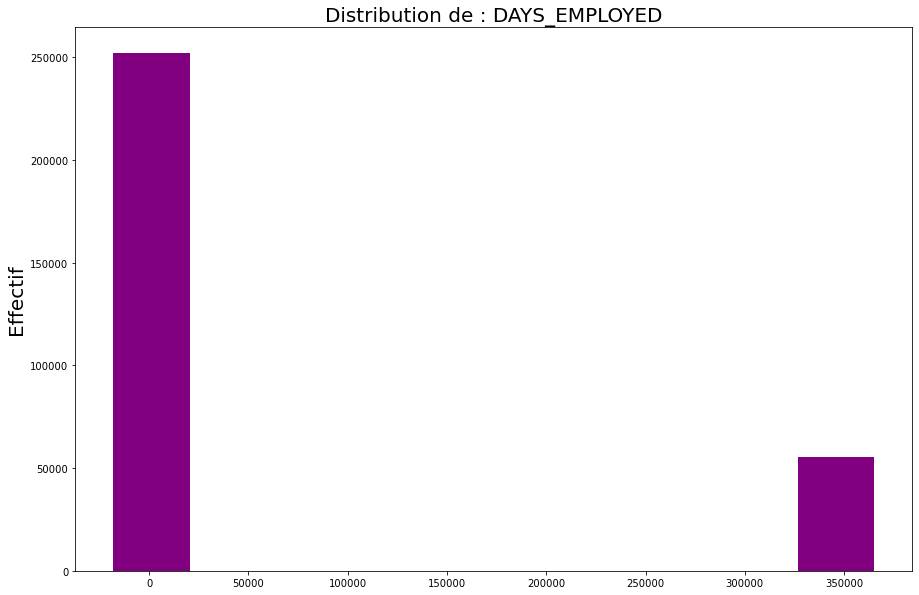

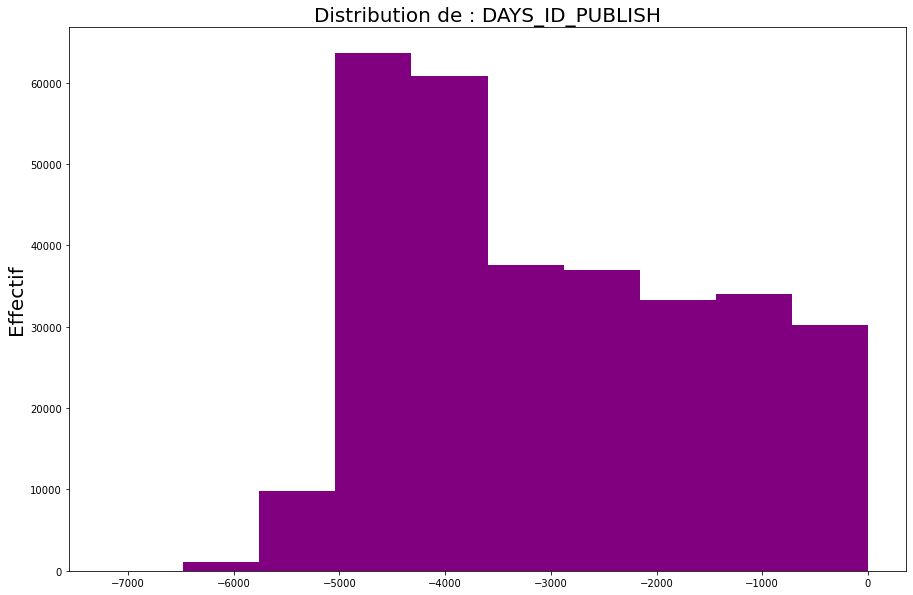

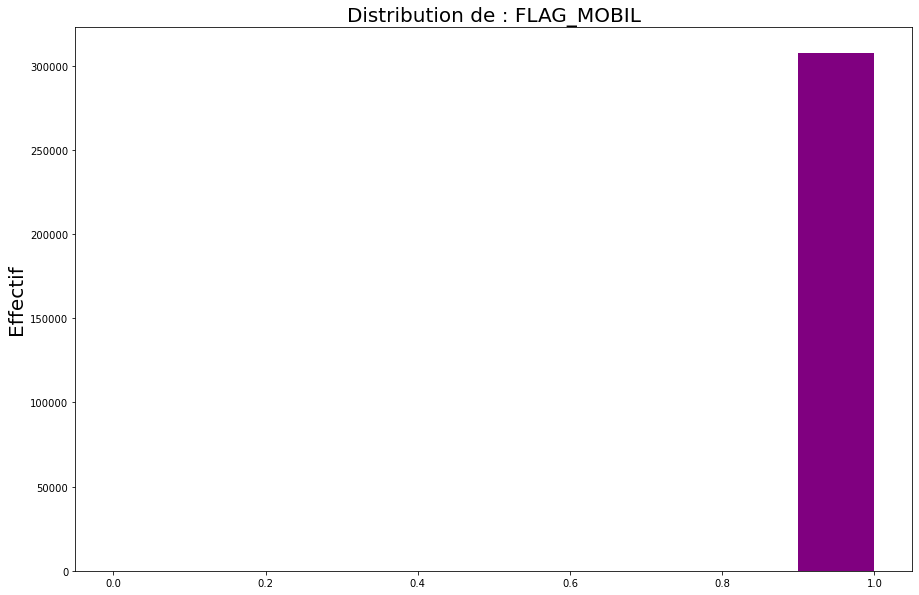

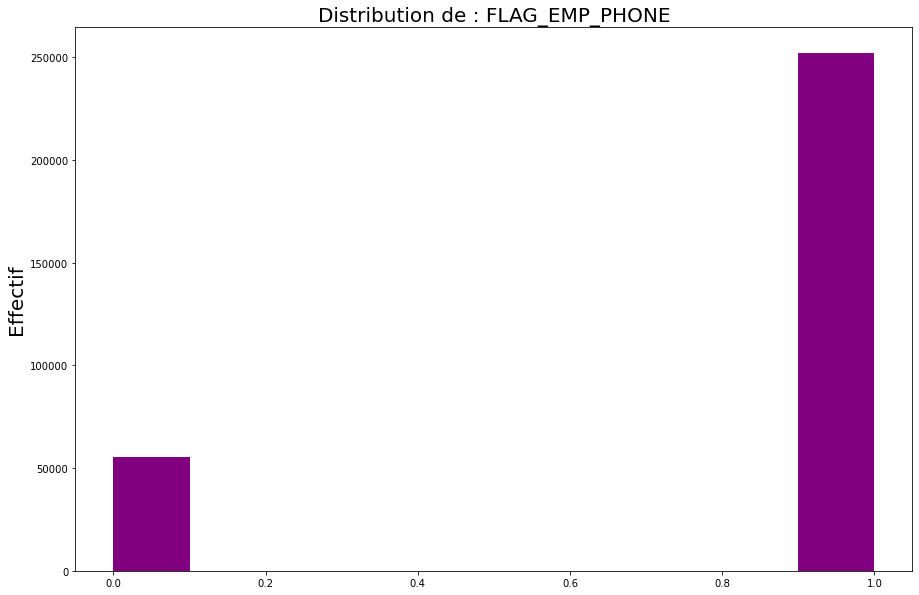

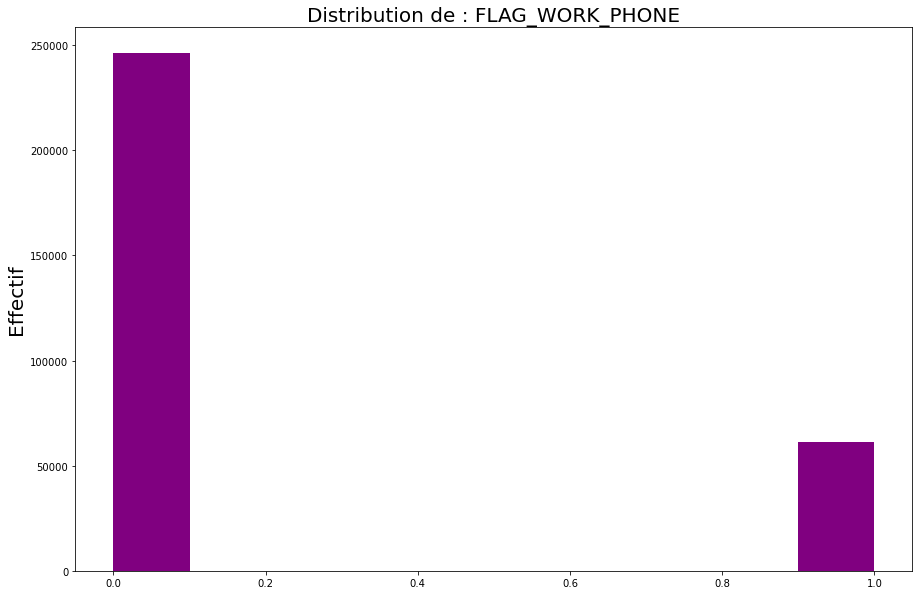

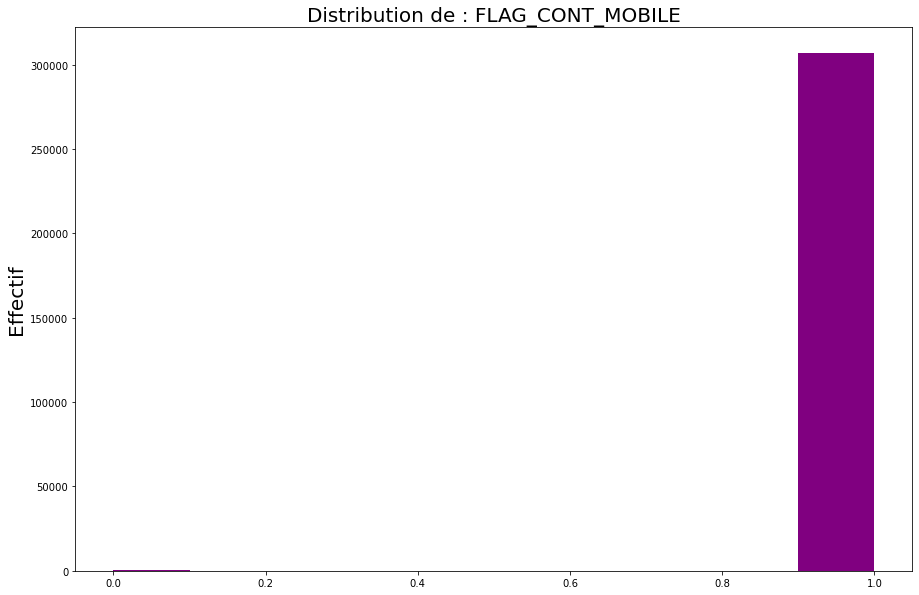

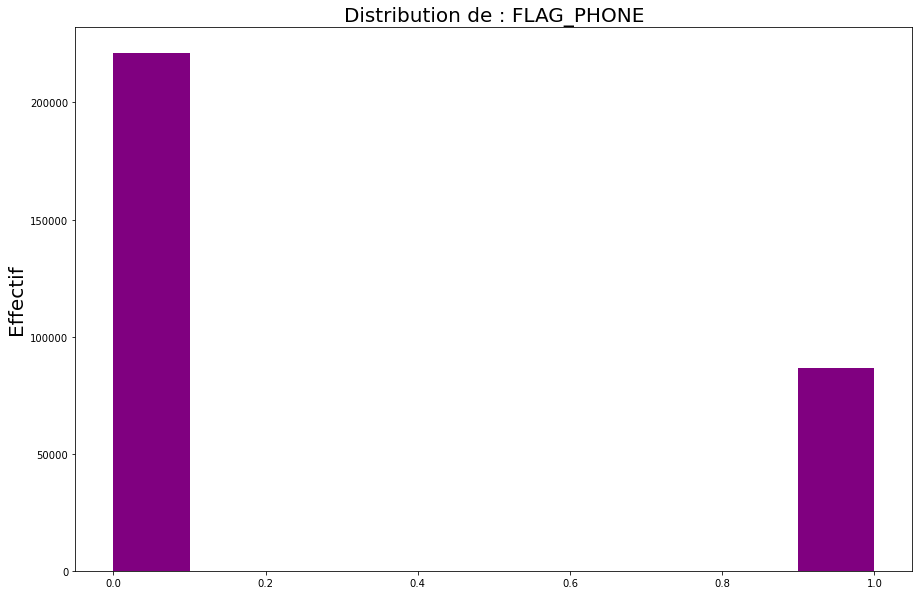

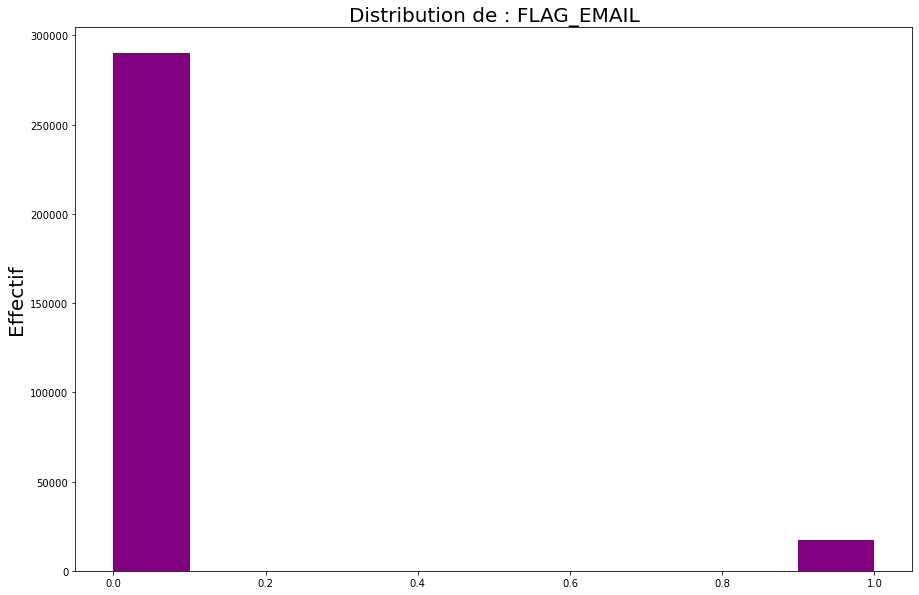

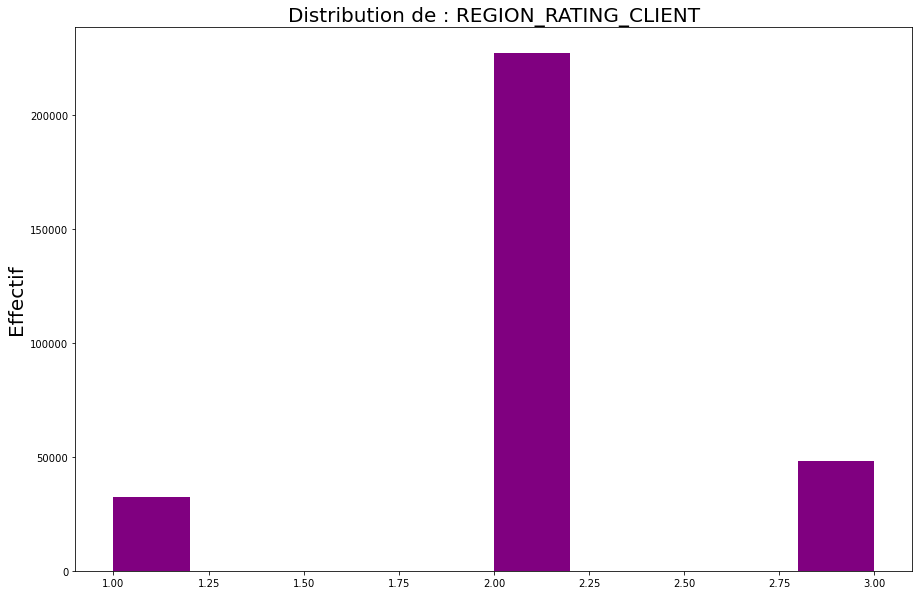

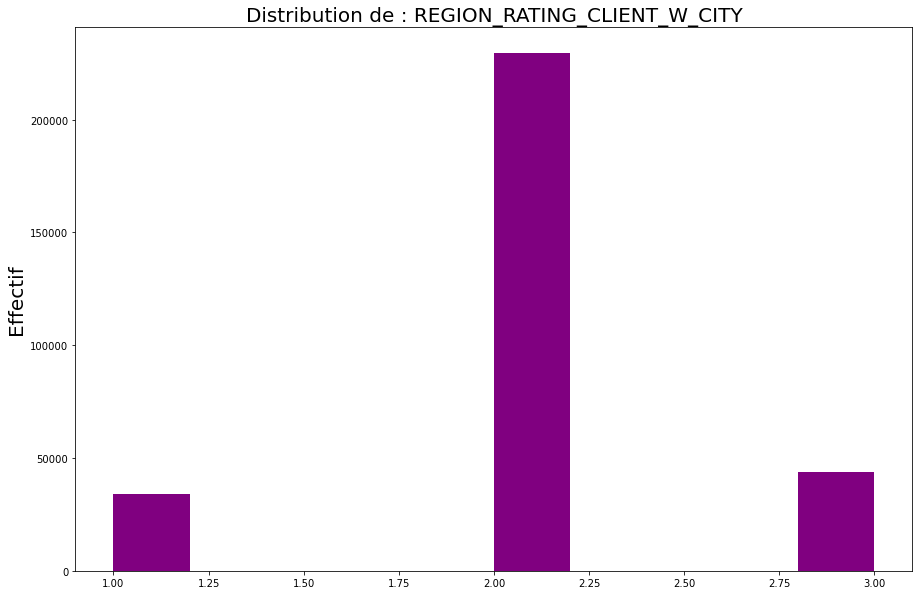

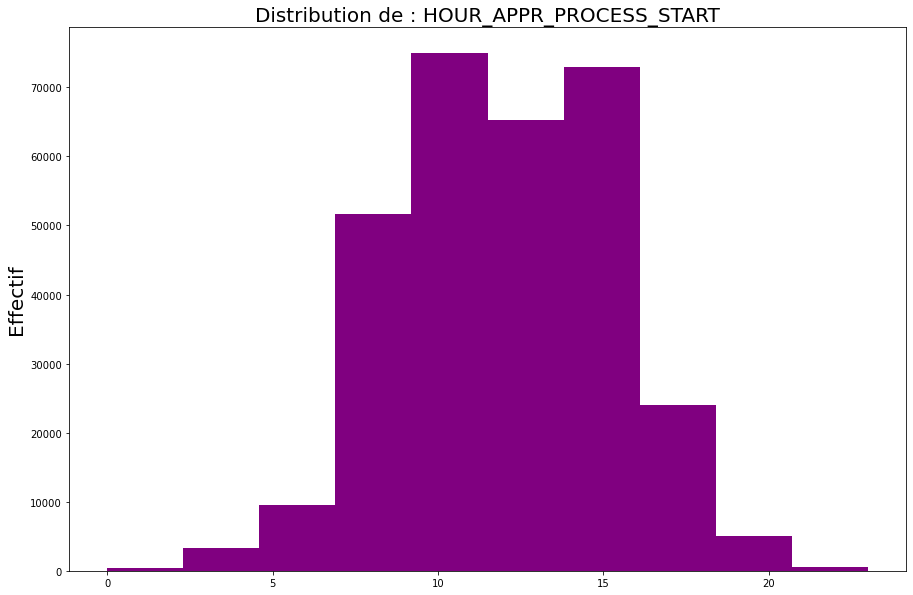

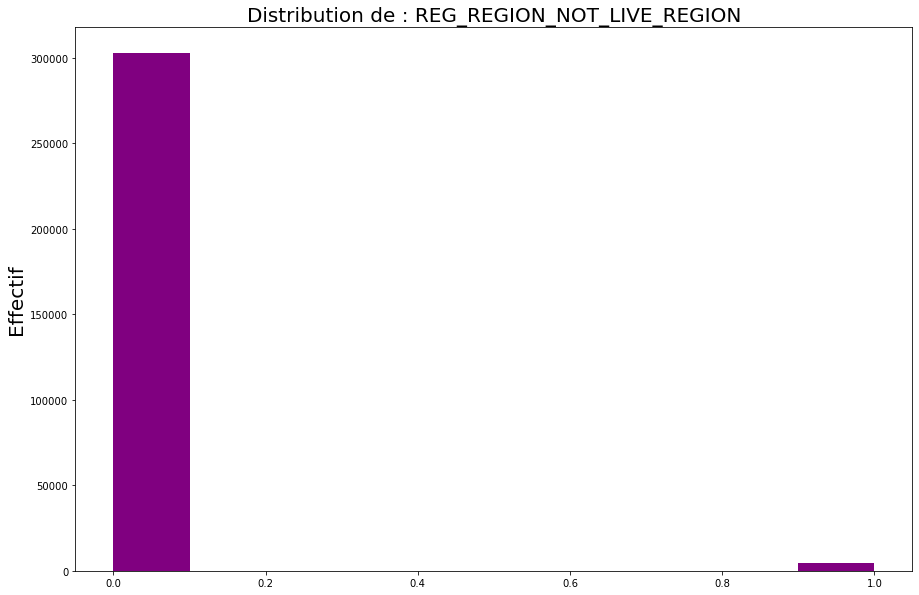

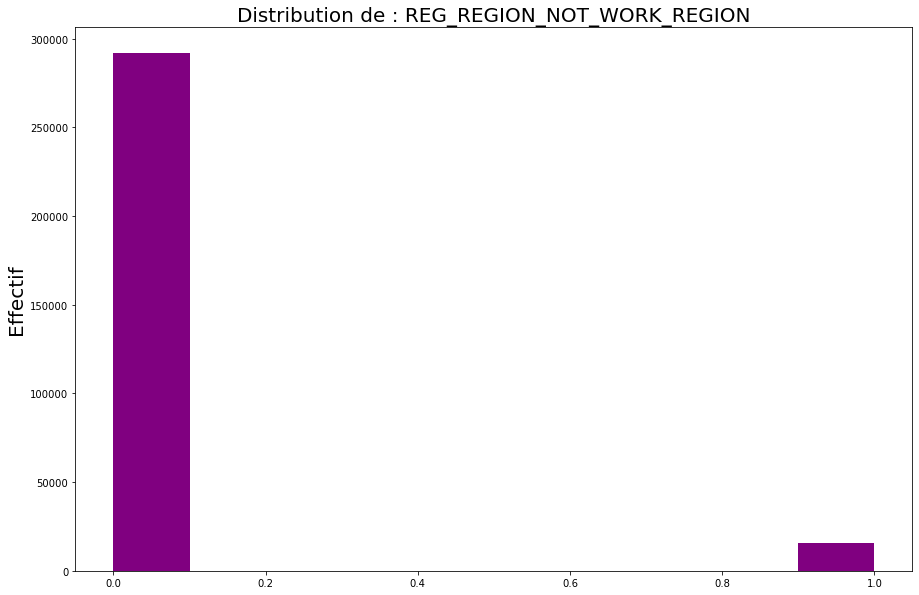

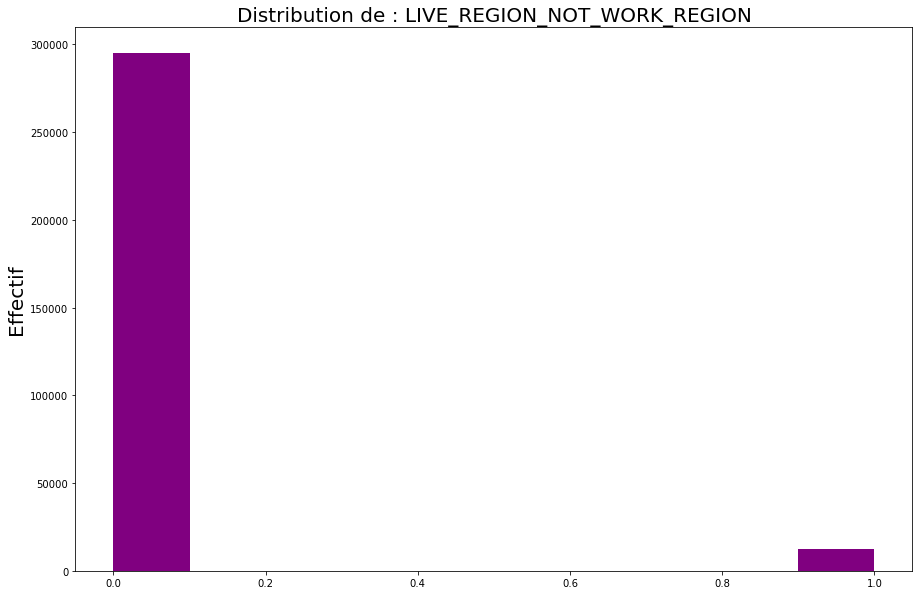

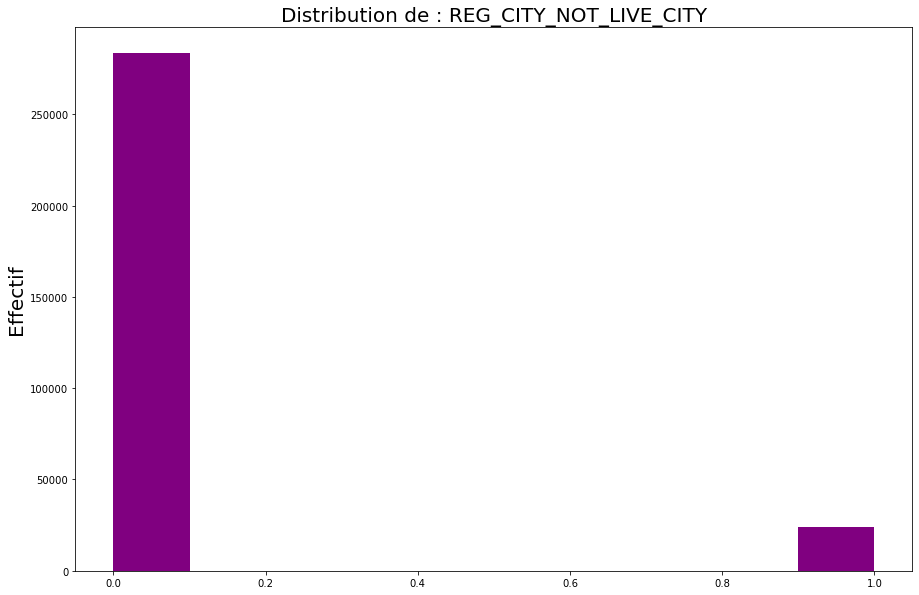

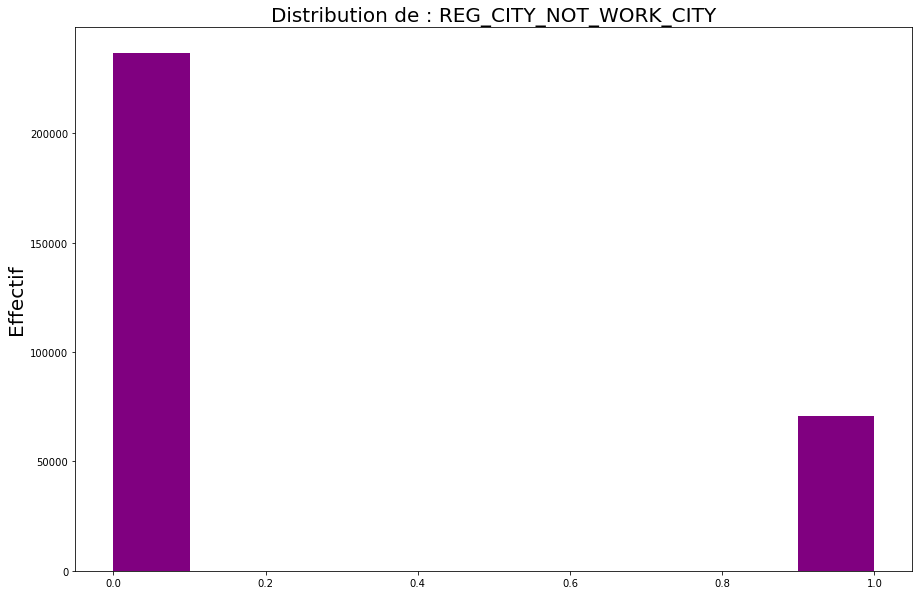

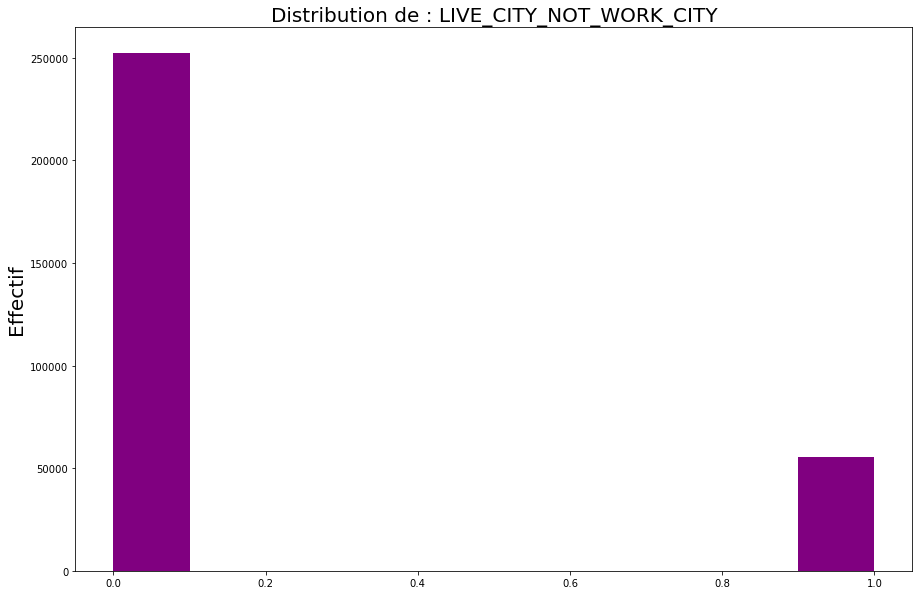

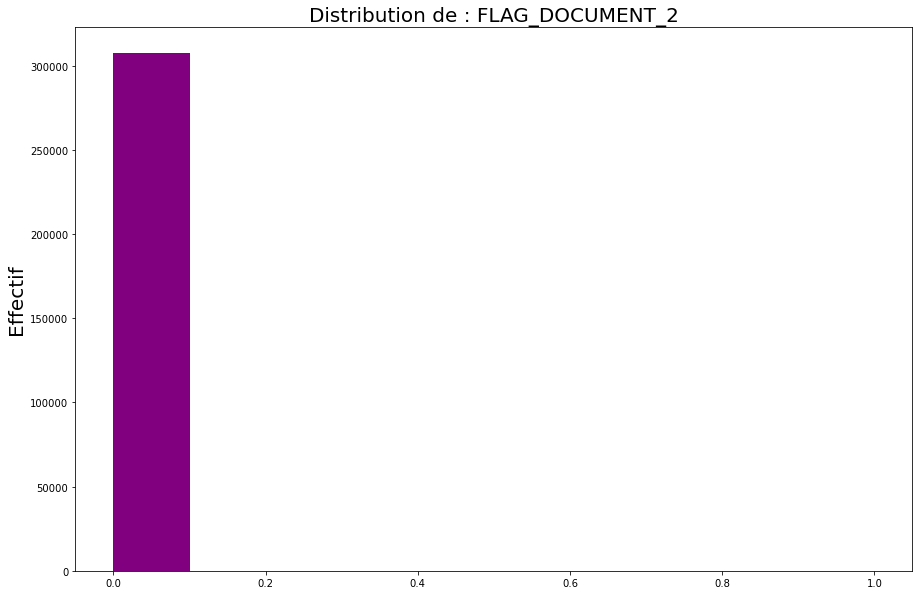

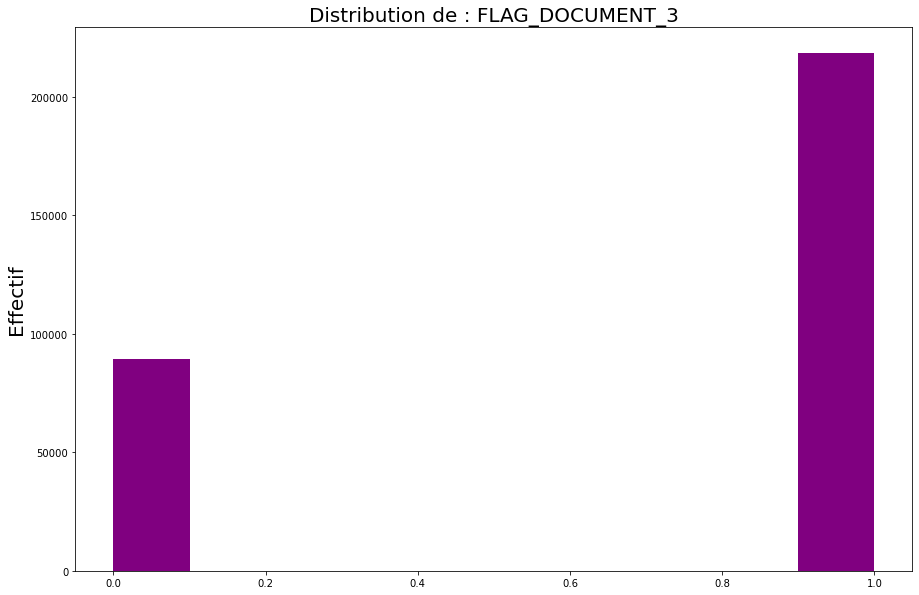

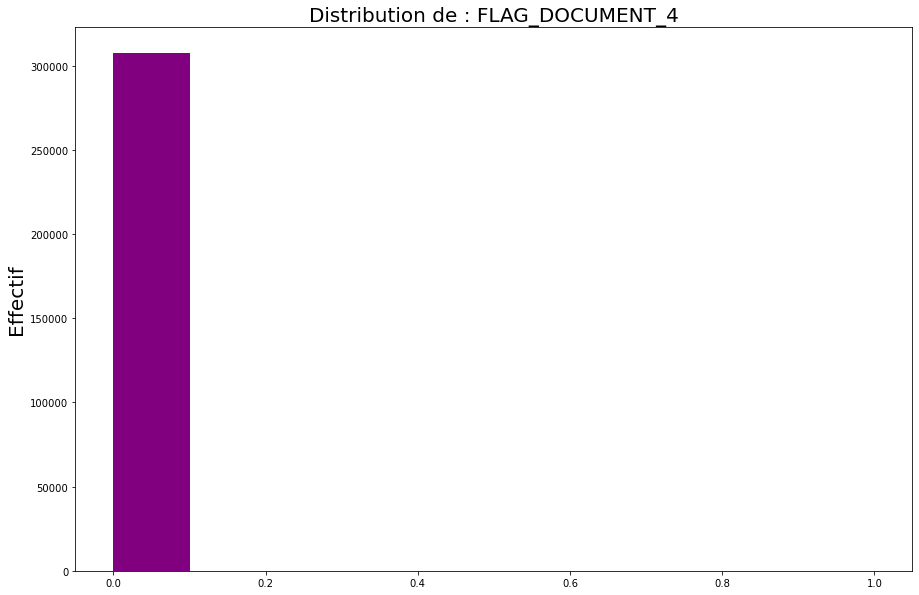

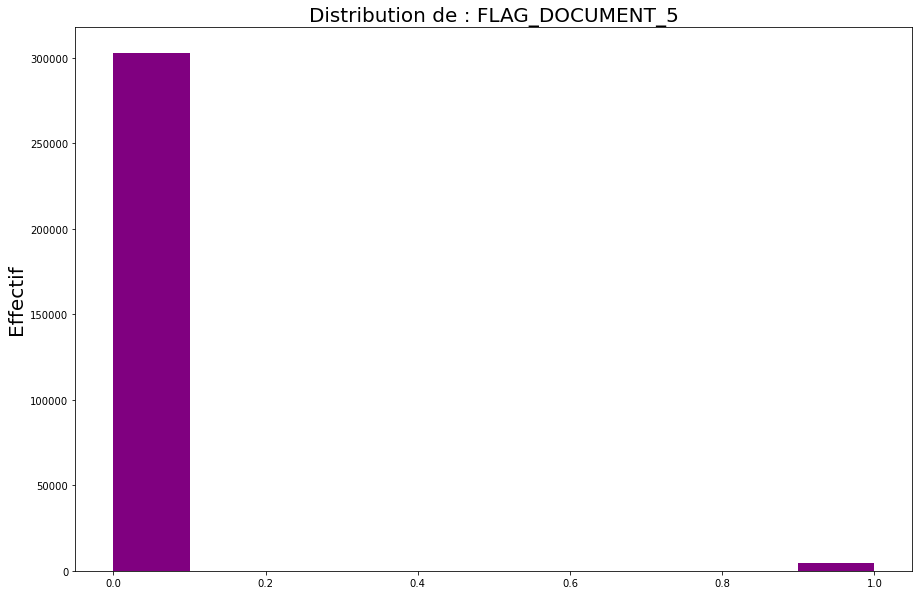

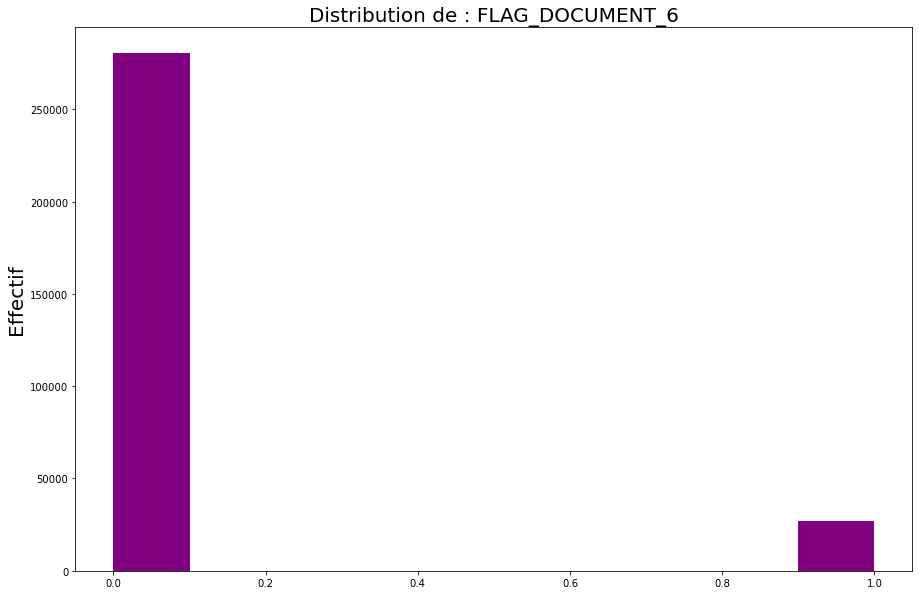

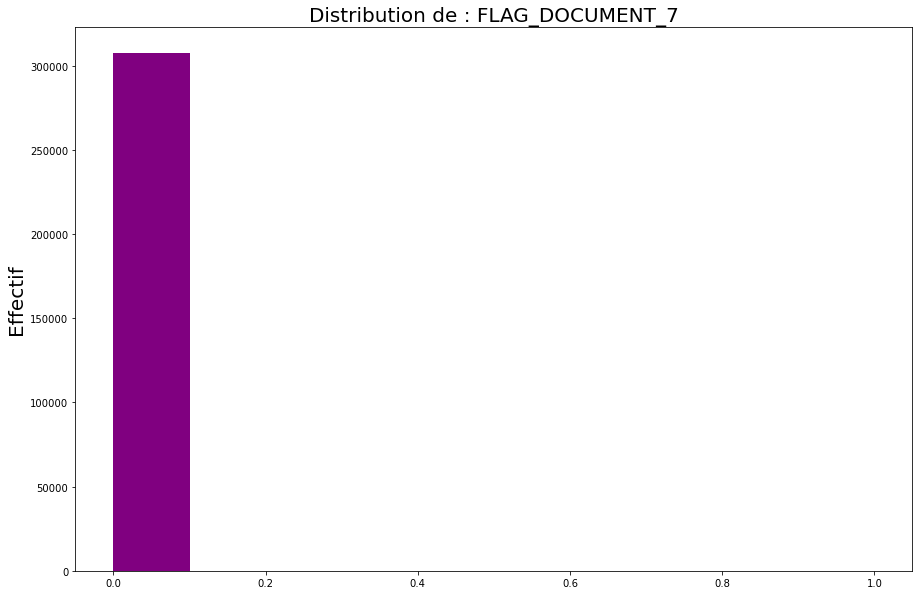

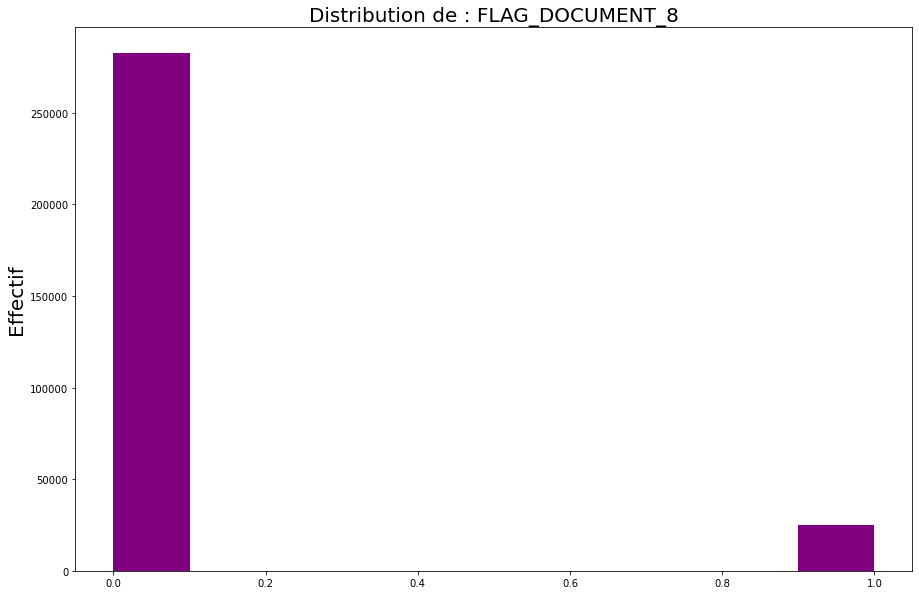

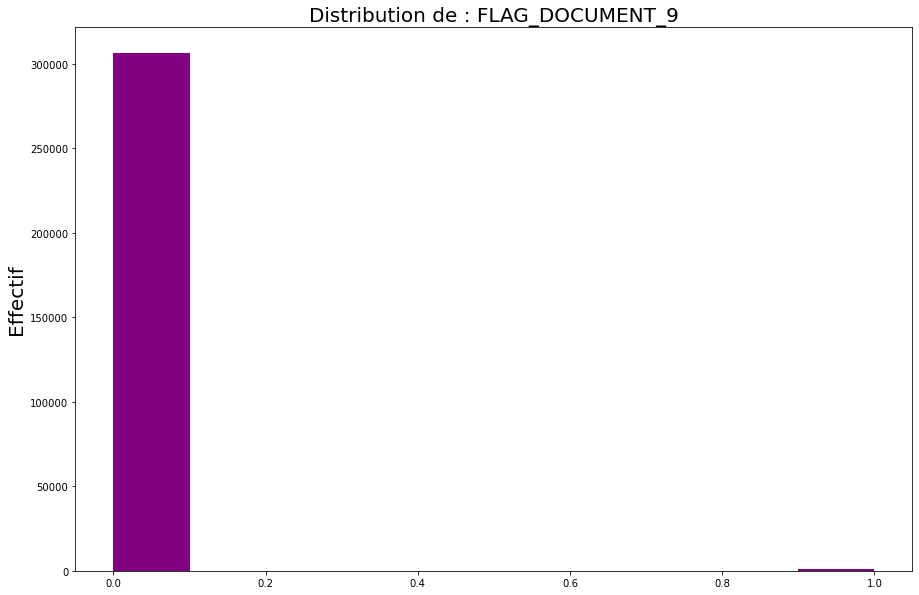

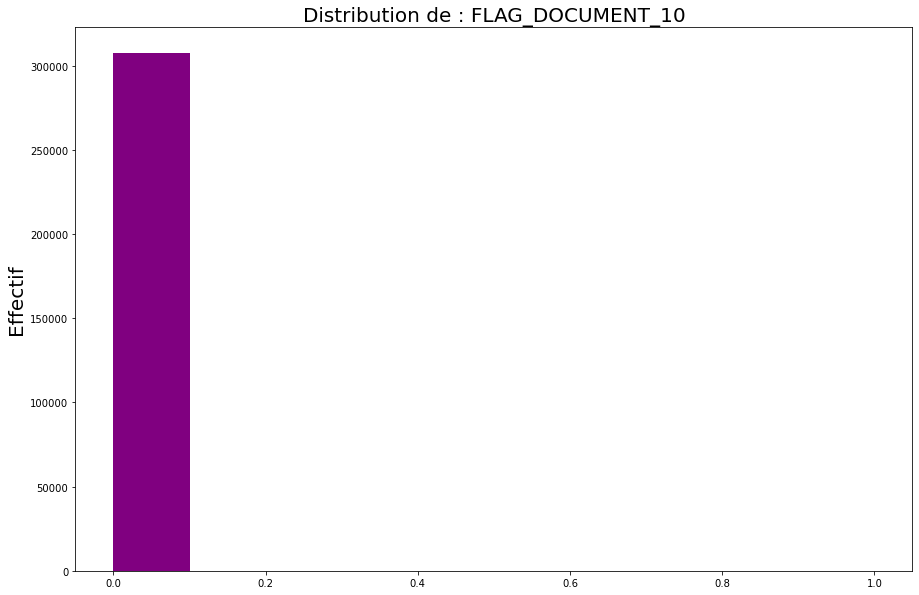

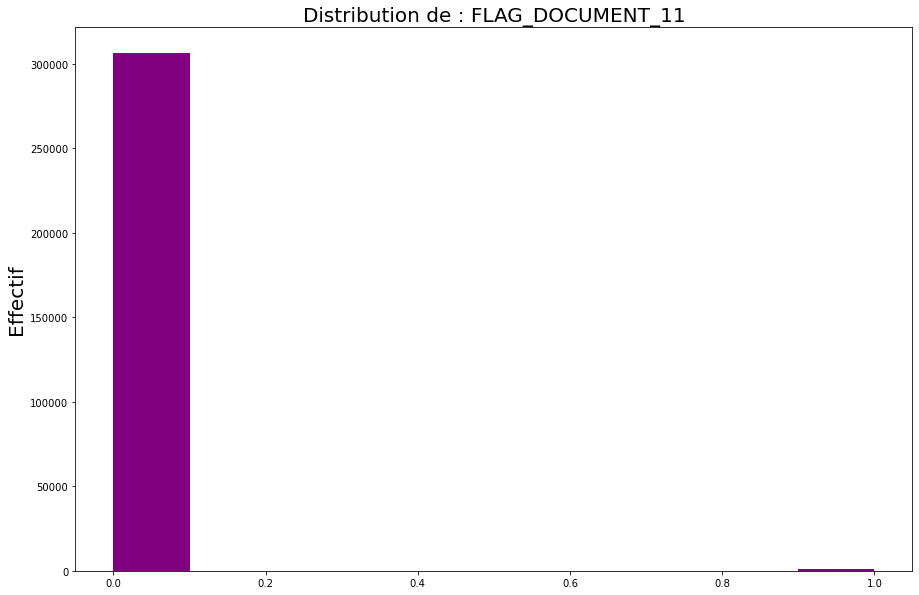

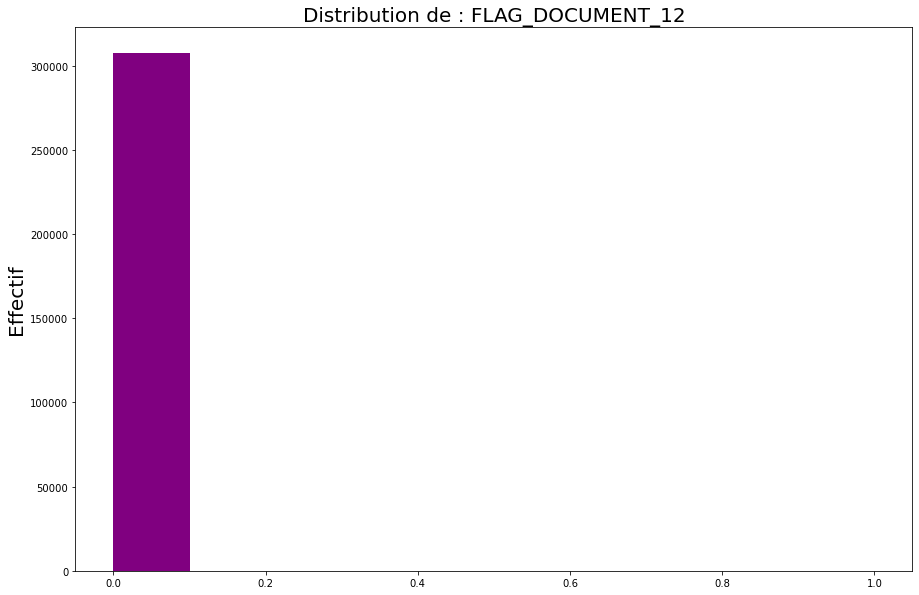

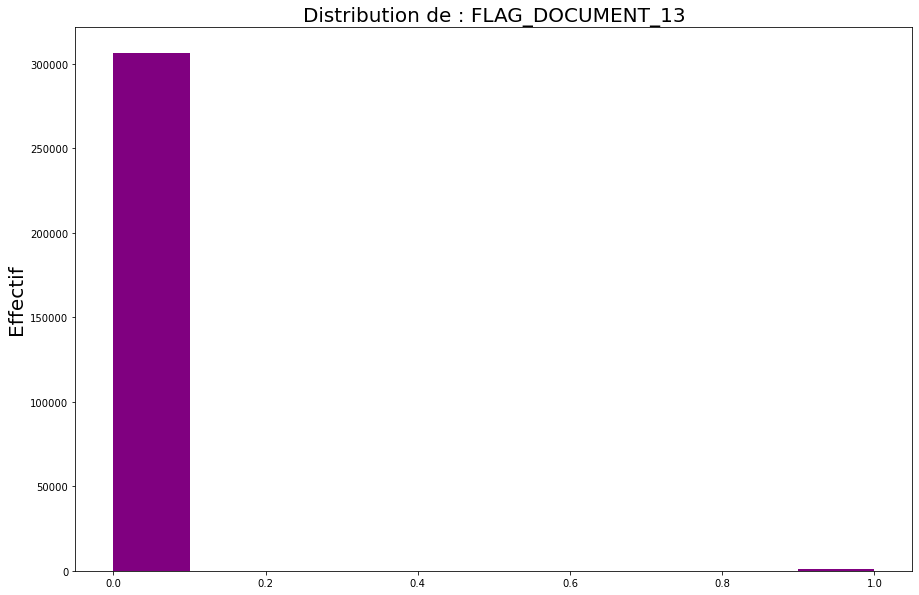

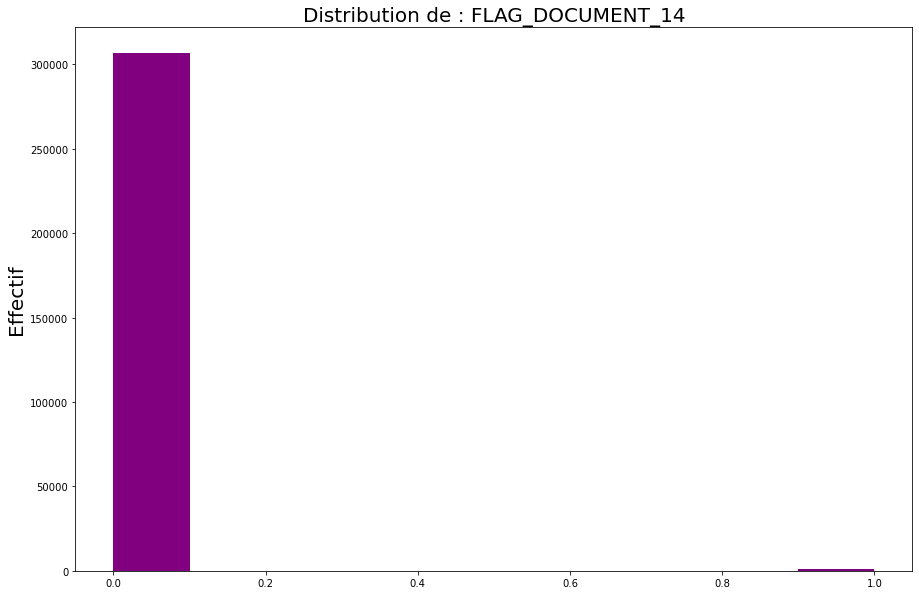

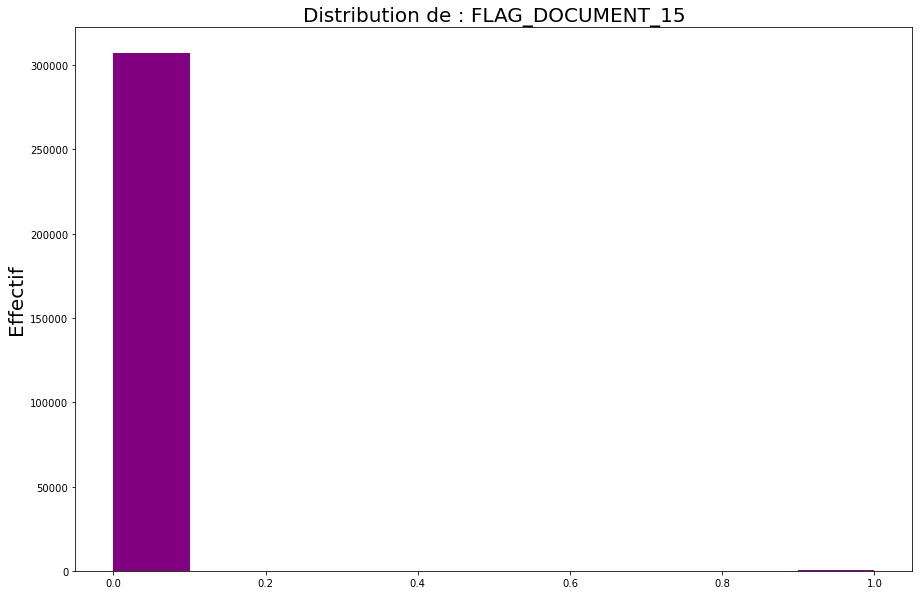

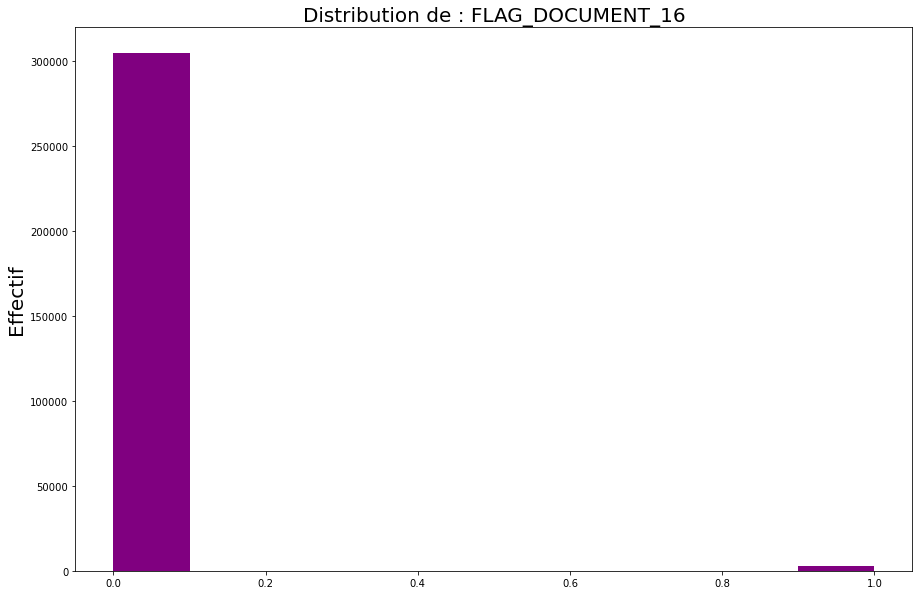

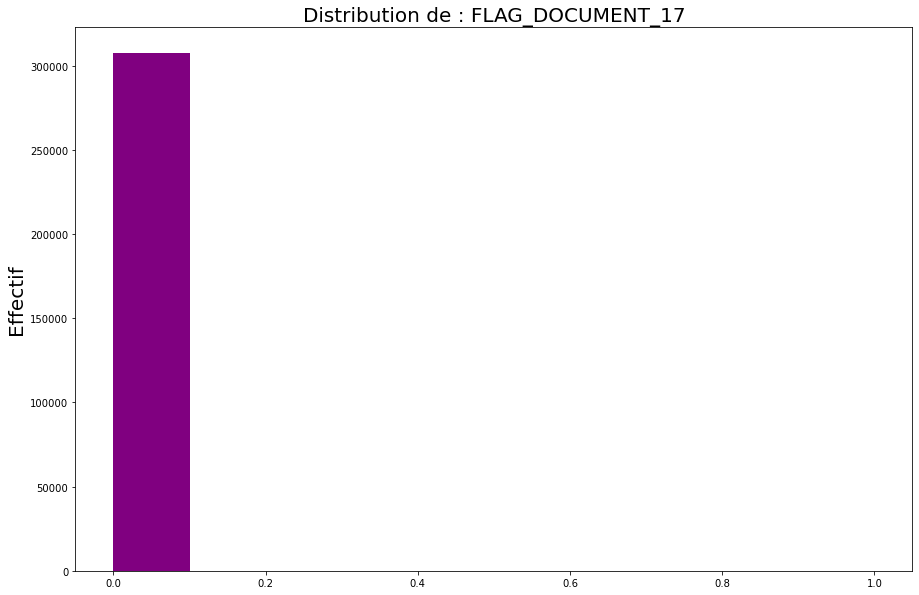

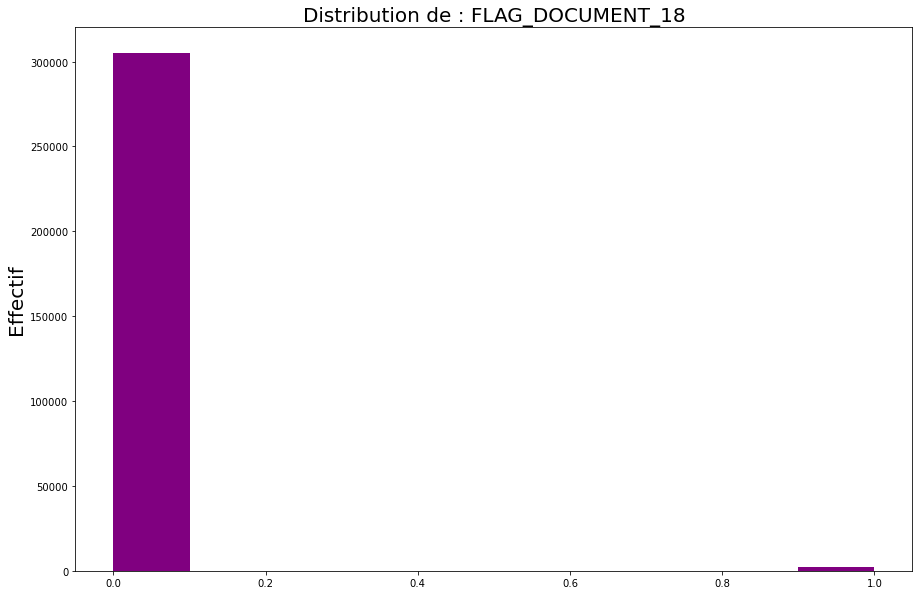

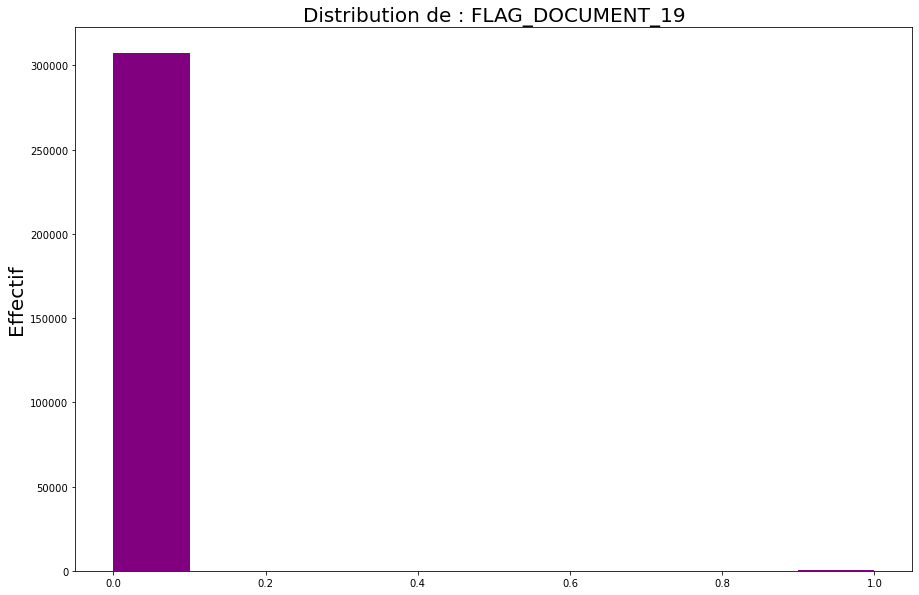

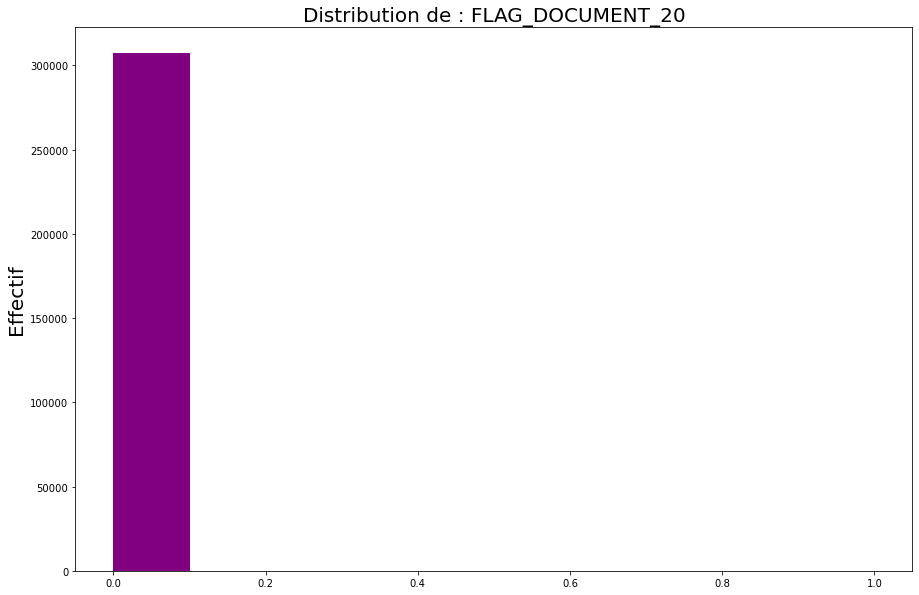

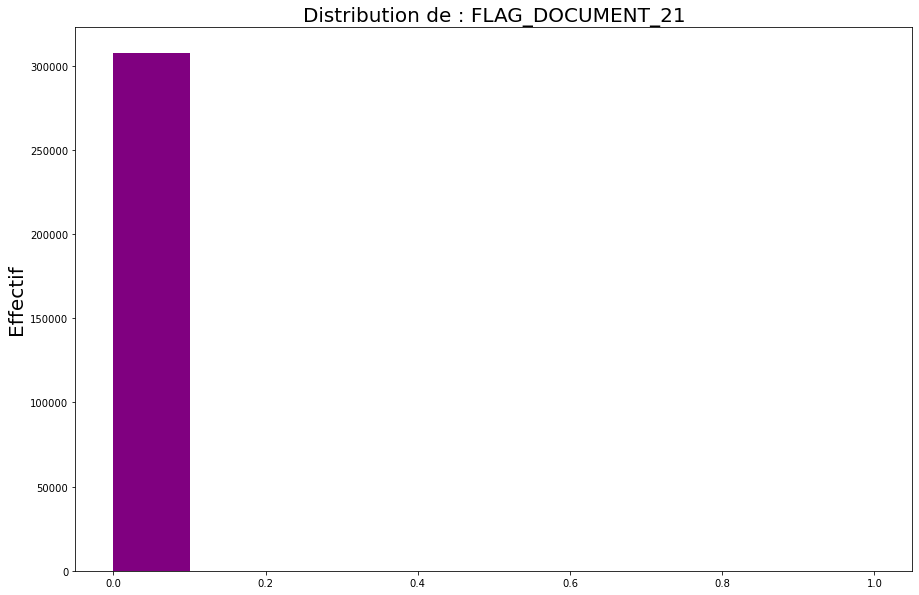

In [69]:
for col in data.select_dtypes('int64'):
    plt.figure(figsize=(15, 10))
    plt.hist(data[col], color='purple')#, bins=30)
    plt.xlabel("", fontsize=20)
    plt.ylabel("Effectif", fontsize=20)
    plt.title("Distribution de : " + str(col), fontsize=20)
    plt.show()

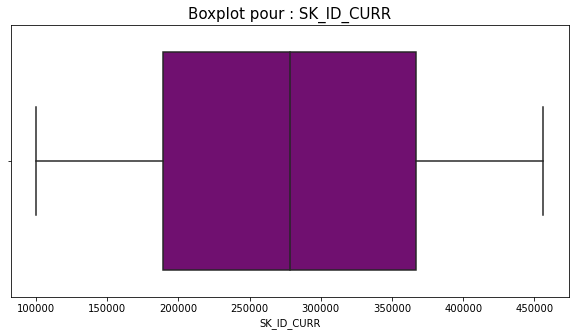

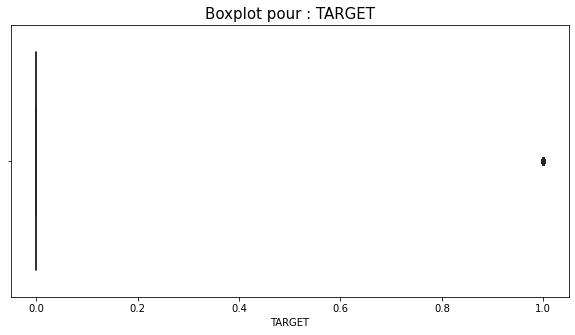

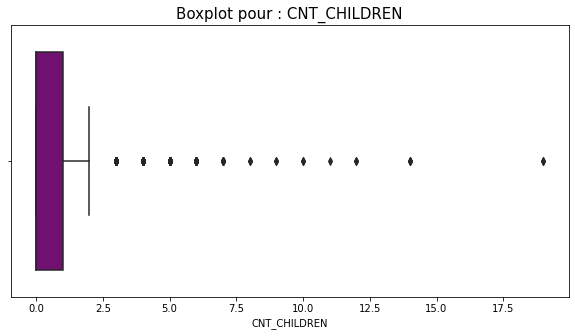

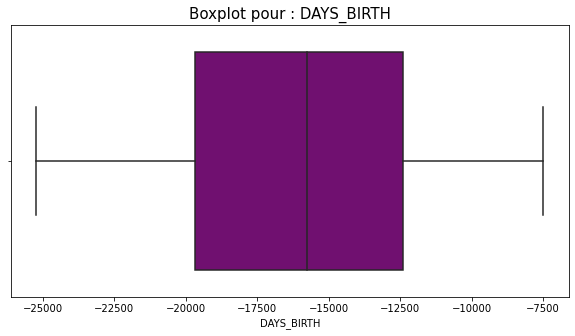

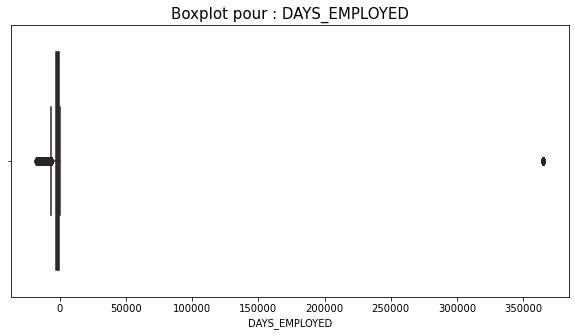

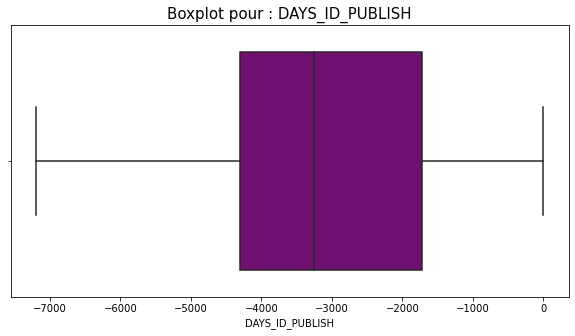

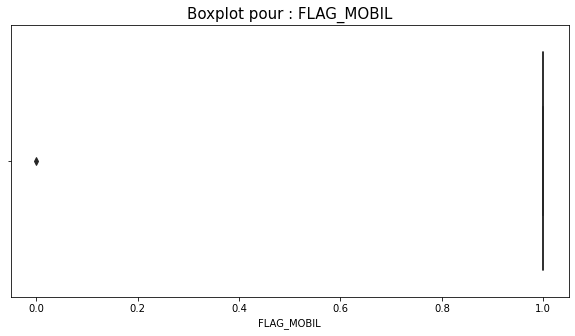

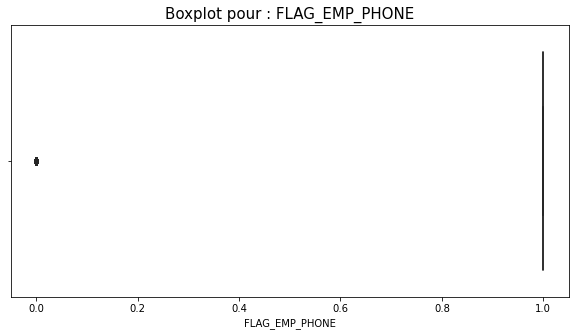

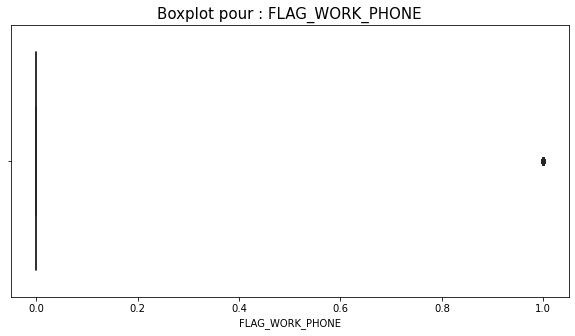

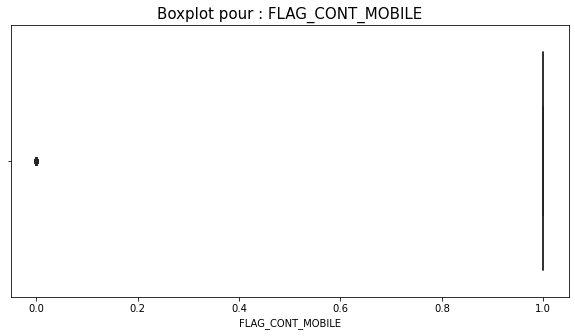

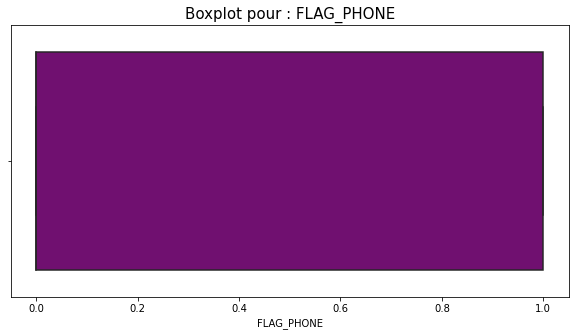

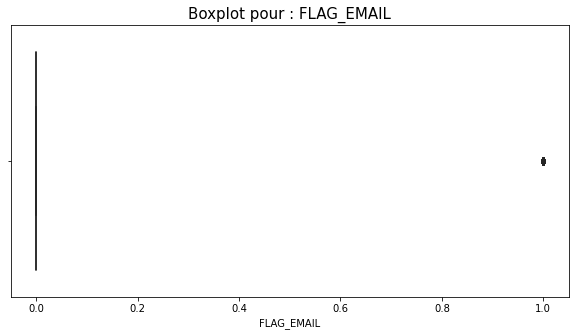

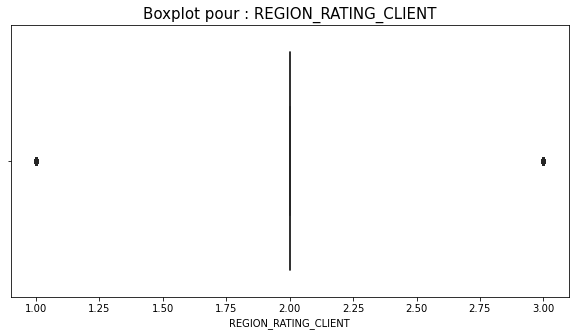

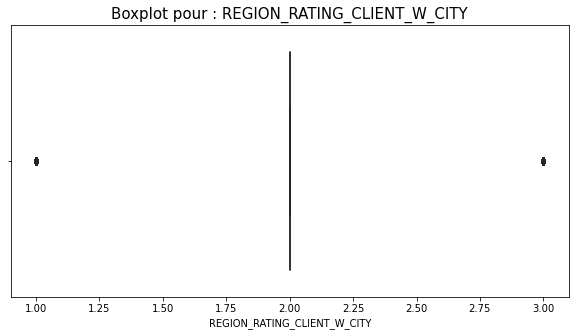

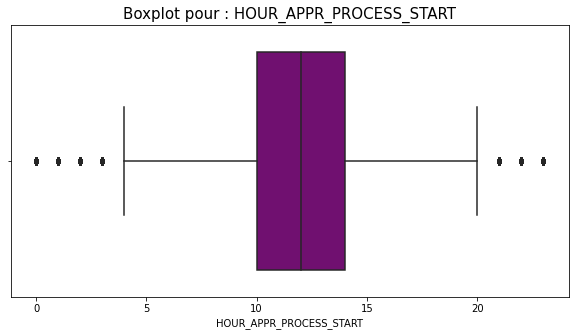

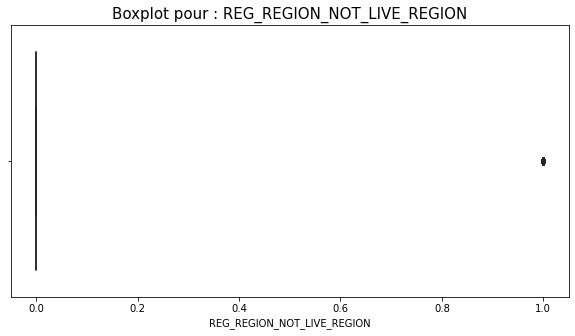

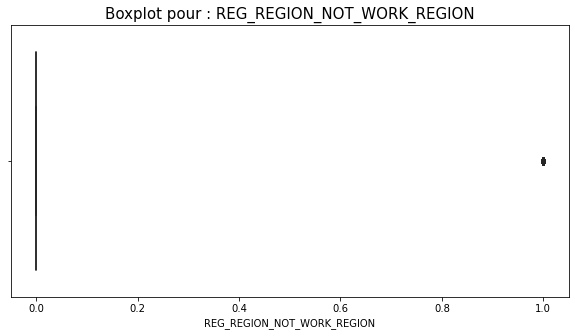

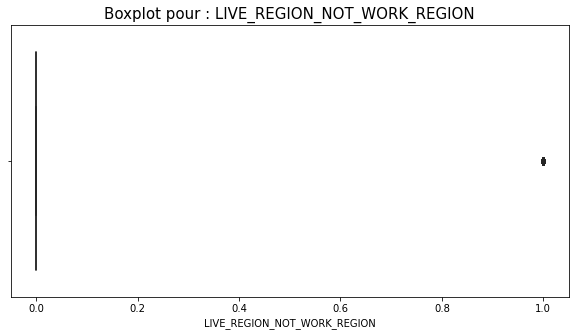

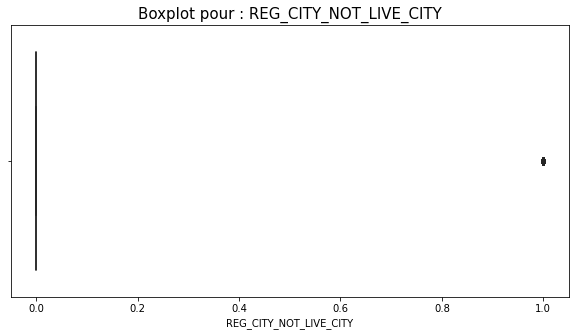

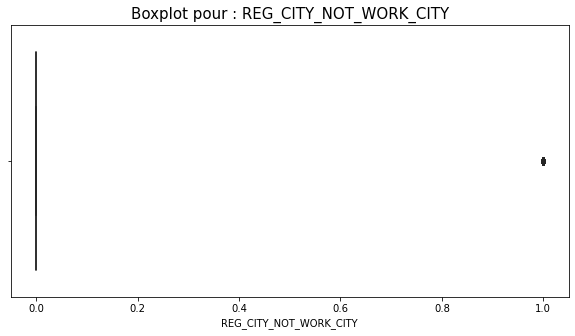

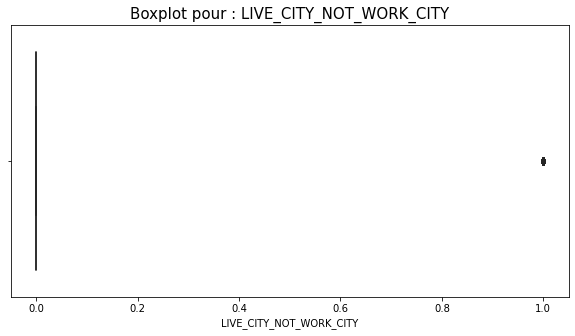

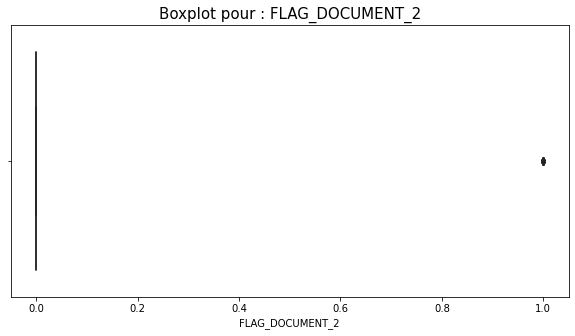

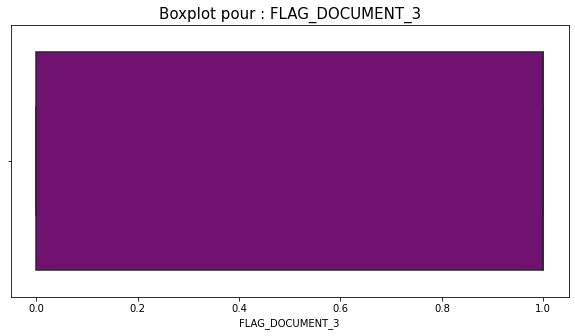

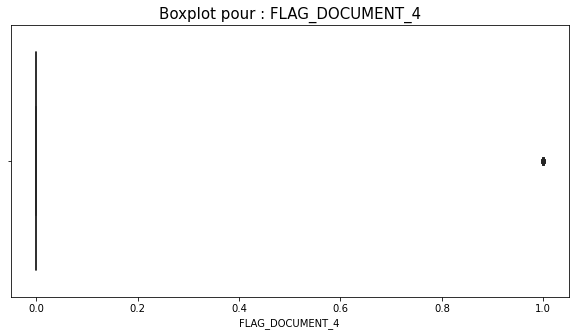

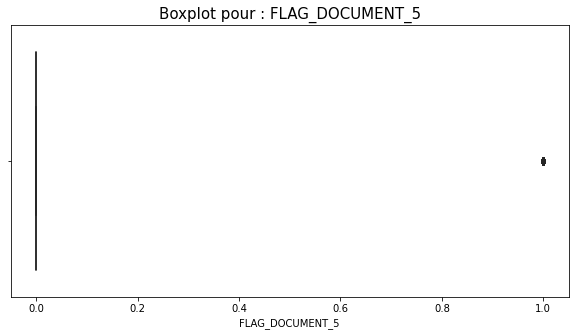

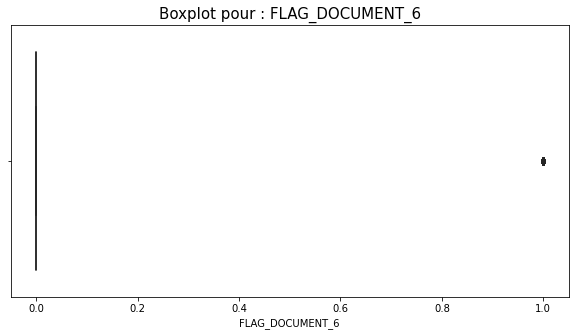

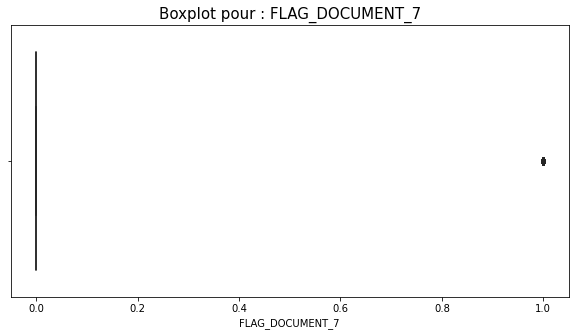

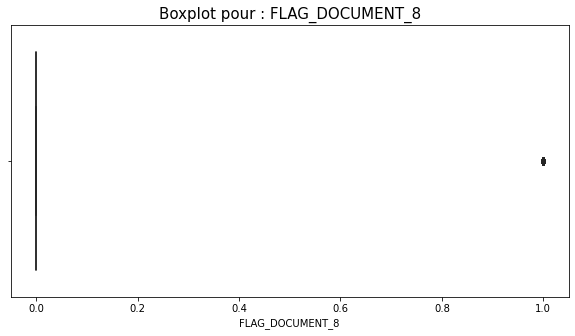

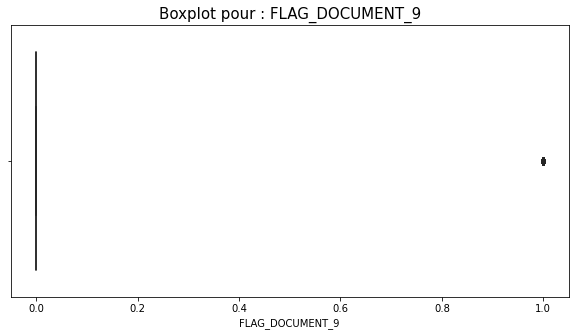

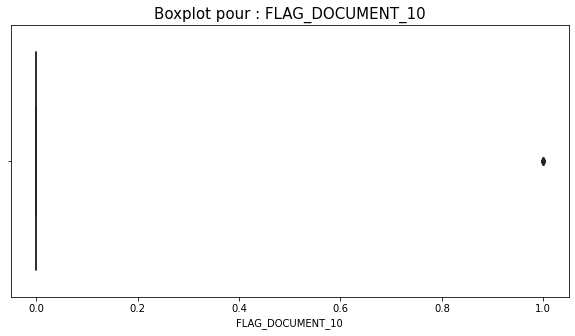

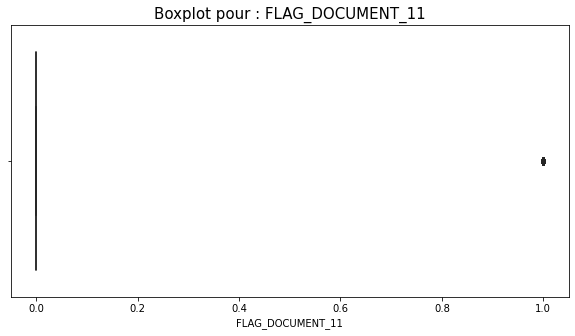

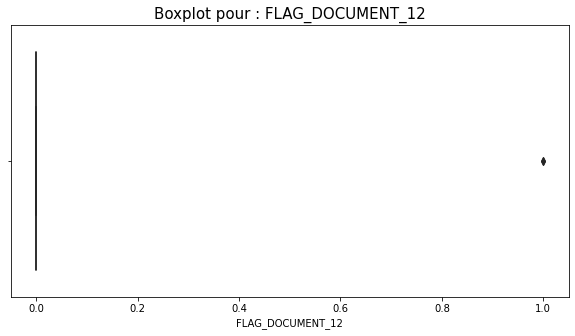

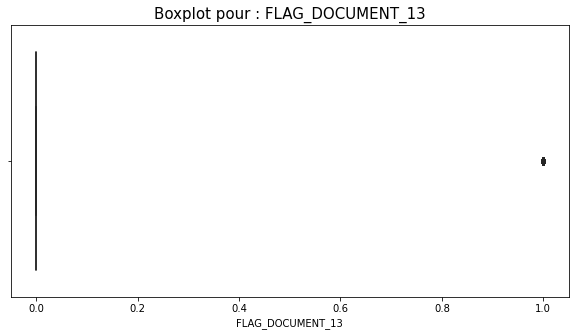

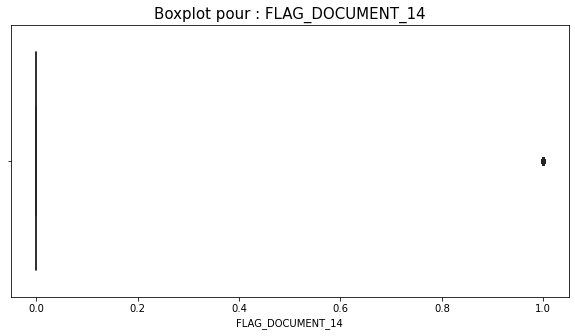

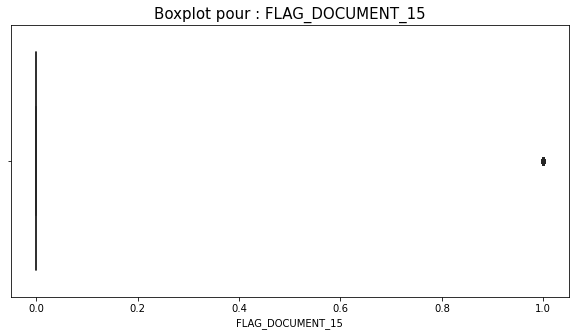

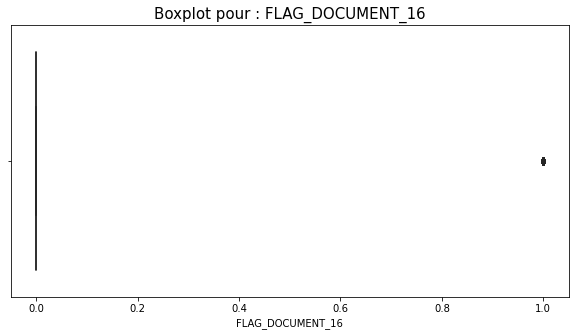

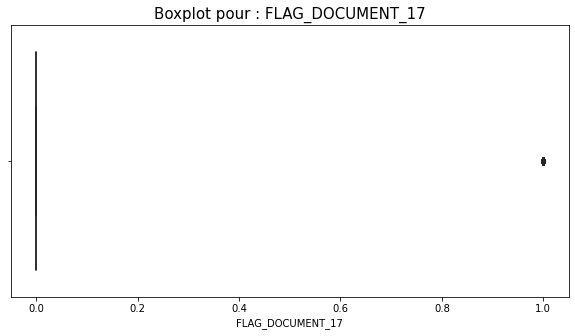

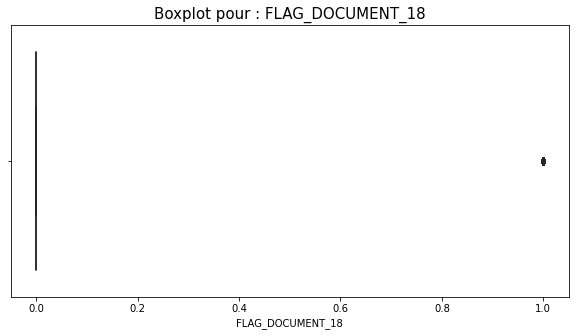

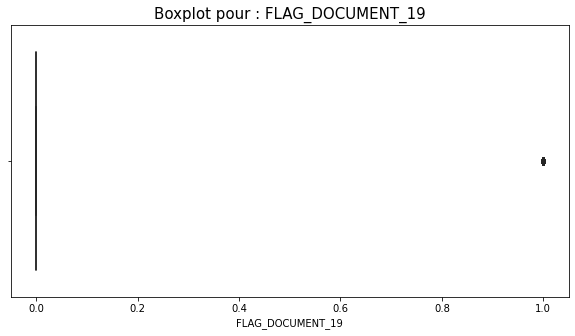

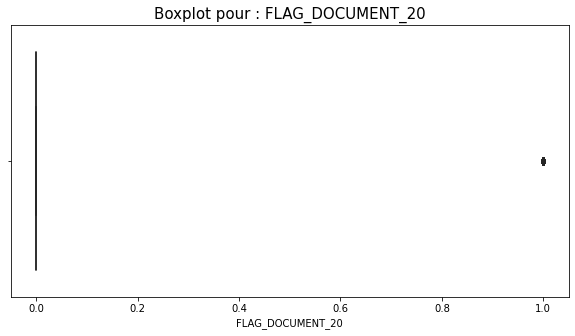

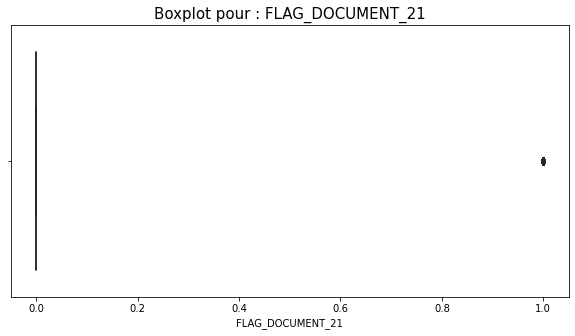

In [70]:
for col in data.select_dtypes('int64'):
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=col, data=data, color='purple')
    plt.title("Boxplot pour : " + str(col), fontsize=15)
    plt.show()

#### Remarques : 
- les variables suivantes ne prennent que 2 valeurs possibles : 0 ou 1
    - FLAG_MOBILE / FLAG_EMP_PHONE / FLAG_WORK_PHONE / FLAG_CONT_MOBILE / FLAG_PHONE / FLAG_PHONE
    - REG_REGION_NOT_LIVE_REGION / REG_REGION_NOT_WORK_REGION / LIVE_REGION_NOT_WORK_REGION / REG_CITY_NOT_LIVE_CITY / REG_CITY_NOT_WORK_CITY / LIVE_CITY_NOT_WORK_CITY 
    - FLAG_DOCUMENT 
    
    
- les variables suivantes ne prennent que 3 valeurs possibles : 1, 2 ou 3
    - REGION_RATING_CLIENT 
    - REGION_RATING_CLIENT_W_CITY 
    
-> Ce sont des variables qualitatives (catégorielles)

On pourrait les transformer en variables catégorielles mais cela ne fait pas de sens car il faudrait ensuite les encoder en valeurs numériques afin qu'elles puissent être traitées par les algorithmes d'apprentissage

- les variables DAYS_BIRTH, DAYS_EMPLOYED et DAYS_ID_PUBLISH sont négatives car calculées en nombre de jours à partir de la date de demande du prêt
    - il semble y avoir des valeurs aberrantes pour la variable DAYS_EMPLOYED

#### Traitement des variables 'DAYS_BIRTH', 'DAYS_EMPLOYED' et 'DAYS_ID_PUBLISH'

In [71]:
data['DAYS_BIRTH'].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

<AxesSubplot:>

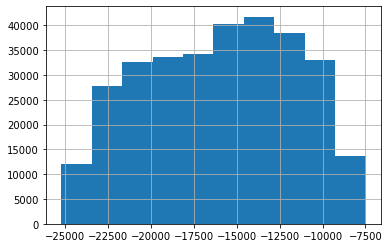

In [72]:
data['DAYS_BIRTH'].hist()

In [73]:
(data['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

<AxesSubplot:>

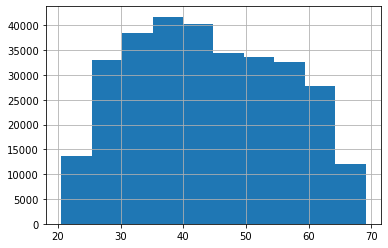

In [74]:
(data['DAYS_BIRTH'] / -365).hist()

In [75]:
data['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

<AxesSubplot:>

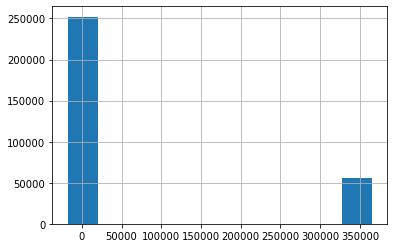

In [76]:
data['DAYS_EMPLOYED'].hist()

##### Remarque : il y a des données aberrantes, nous les traitons ci-dessous

In [77]:
data['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)

In [78]:
(data['DAYS_EMPLOYED'] / -365).describe()

count    252137.000000
mean          6.531971
std           6.406466
min          -0.000000
25%           2.101370
50%           4.515068
75%           8.698630
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

<AxesSubplot:>

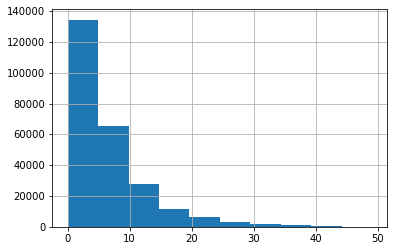

In [79]:
(data['DAYS_EMPLOYED'] / -365).hist()

In [80]:
data['DAYS_ID_PUBLISH'].describe()

count    307511.000000
mean      -2994.202373
std        1509.450419
min       -7197.000000
25%       -4299.000000
50%       -3254.000000
75%       -1720.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64

<AxesSubplot:>

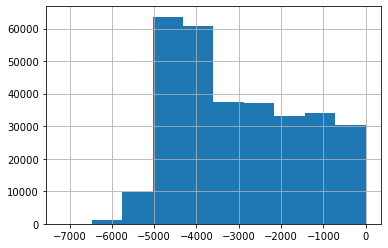

In [81]:
data['DAYS_ID_PUBLISH'].hist()

In [82]:
(data['DAYS_ID_PUBLISH'] / -365).describe()

count    307511.000000
mean          8.203294
std           4.135481
min          -0.000000
25%           4.712329
50%           8.915068
75%          11.778082
max          19.717808
Name: DAYS_ID_PUBLISH, dtype: float64

<AxesSubplot:>

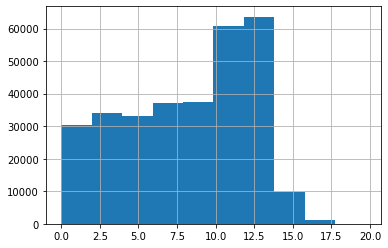

In [83]:
(data['DAYS_ID_PUBLISH'] / -365).hist()

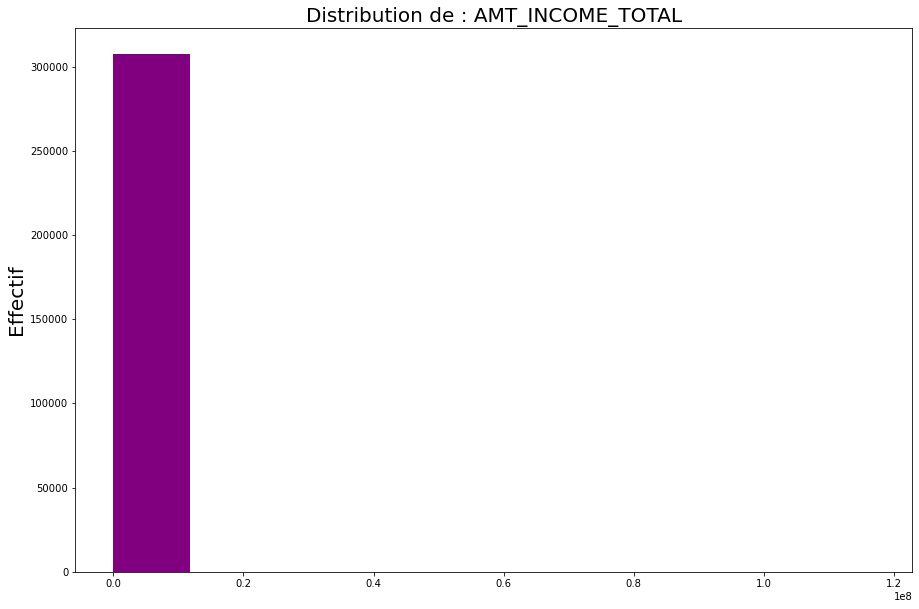

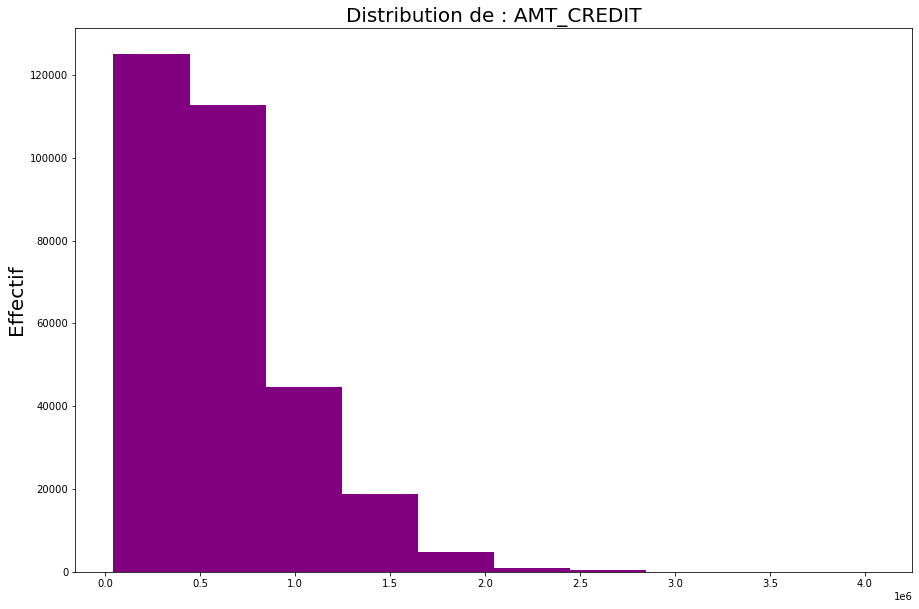

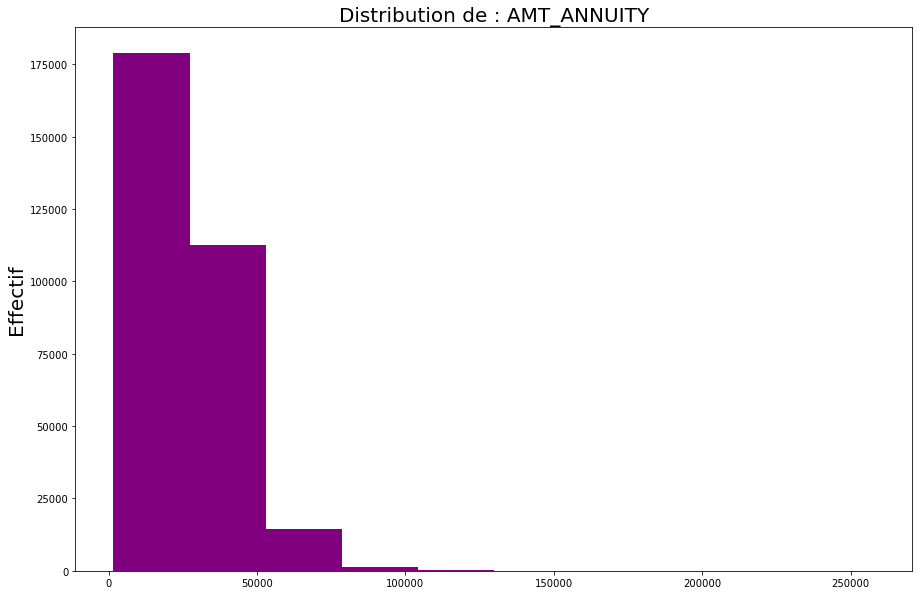

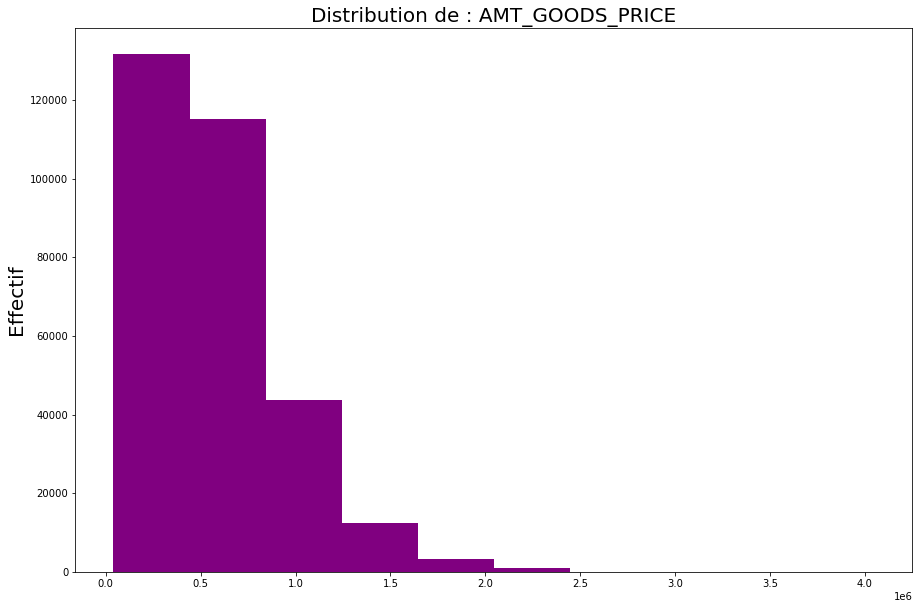

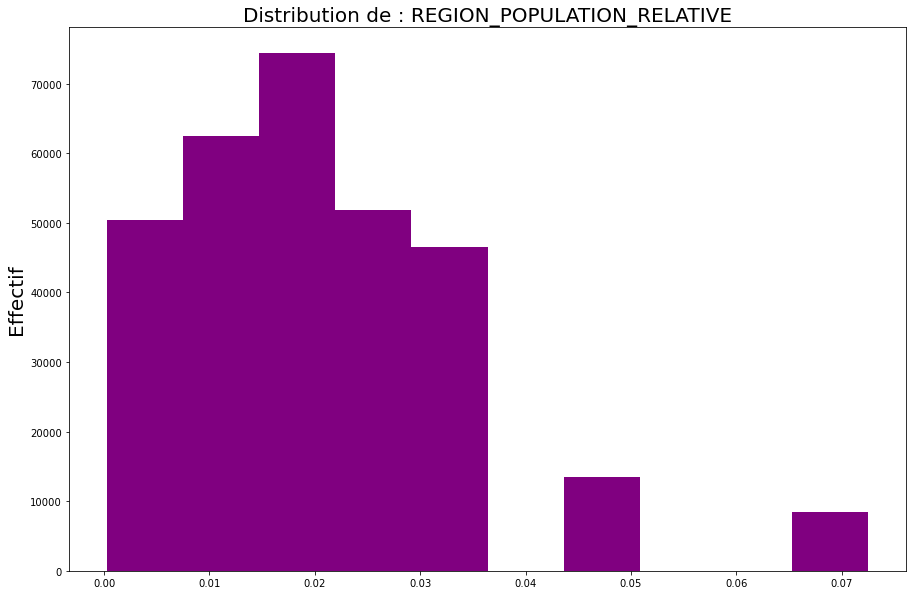

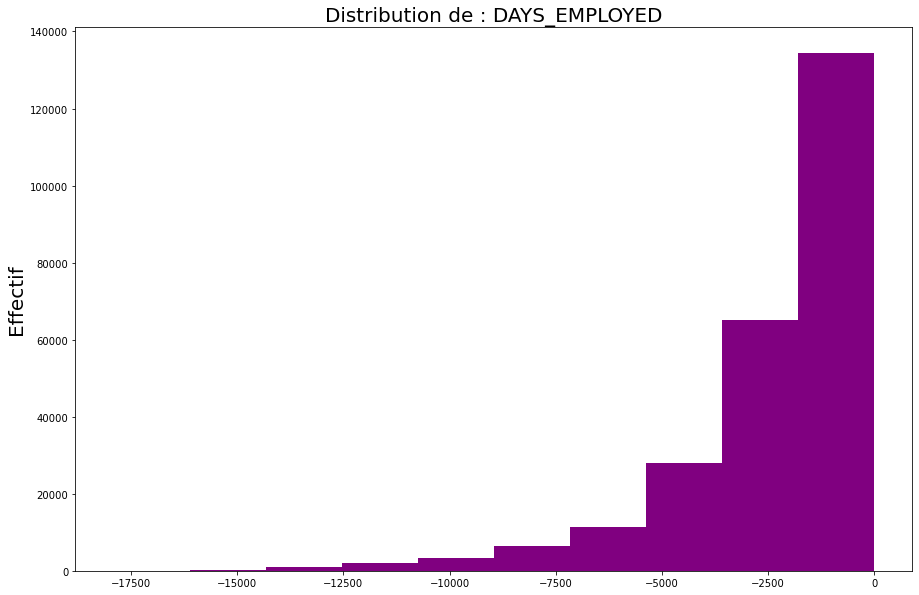

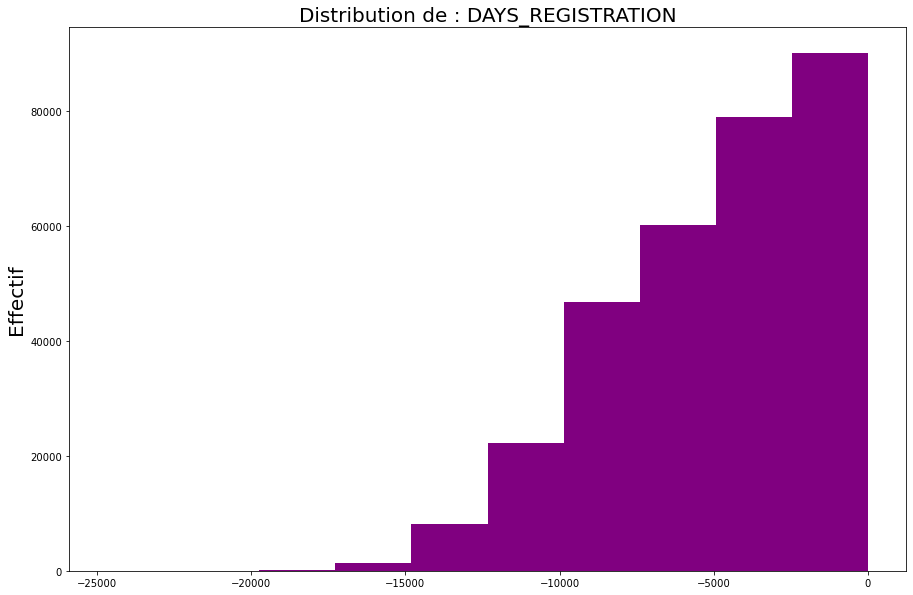

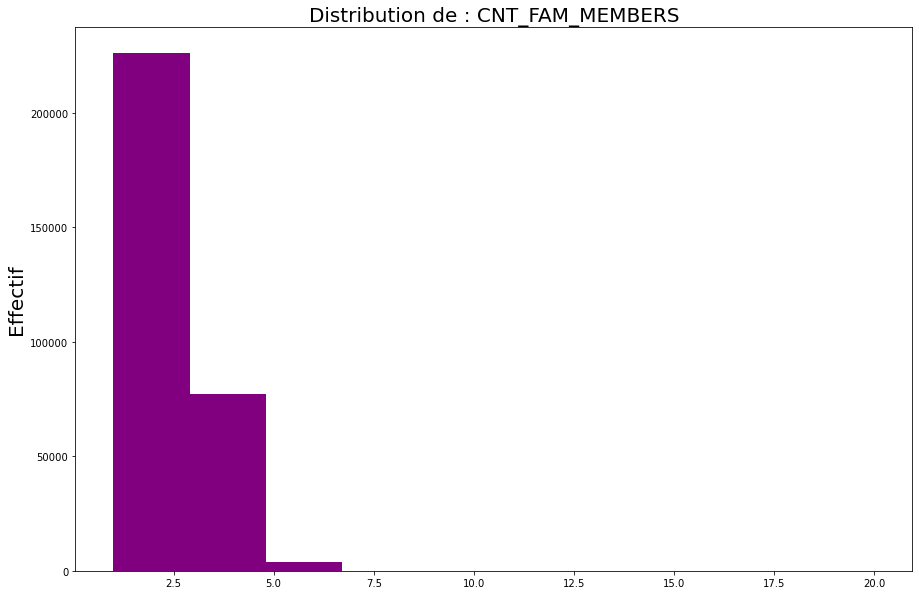

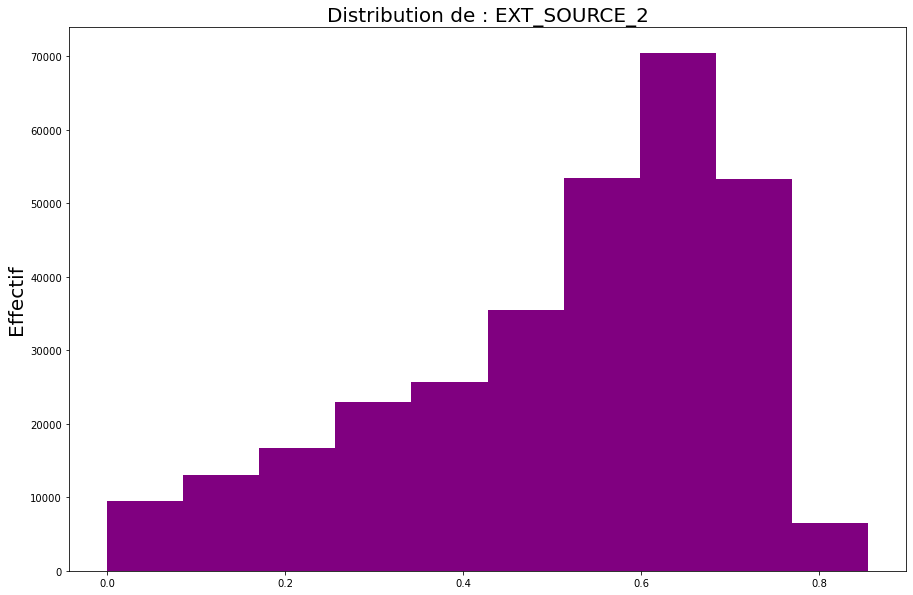

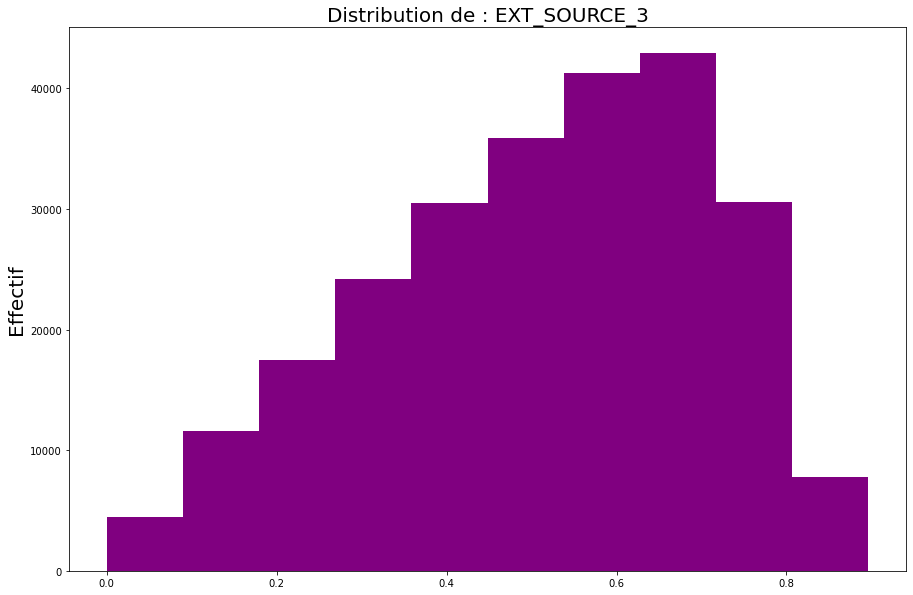

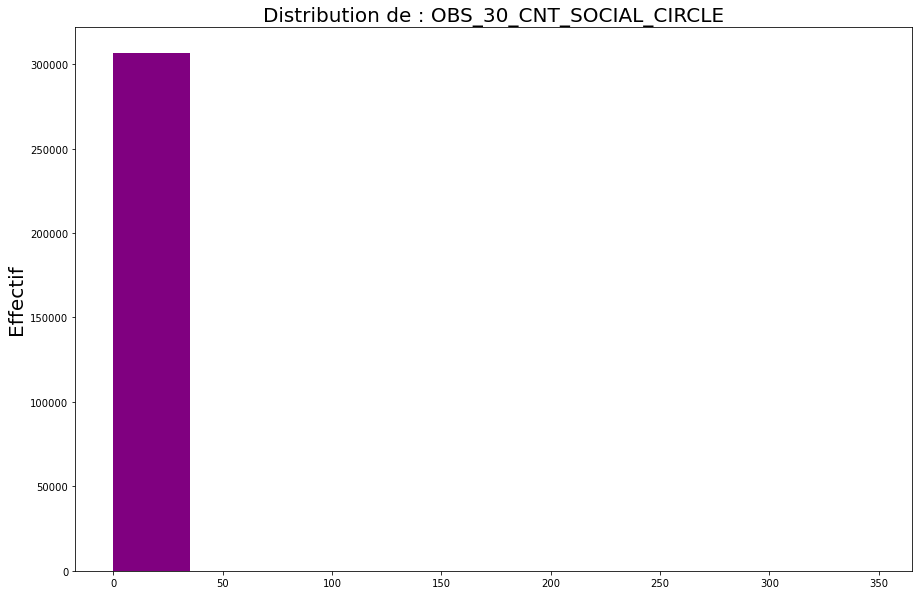

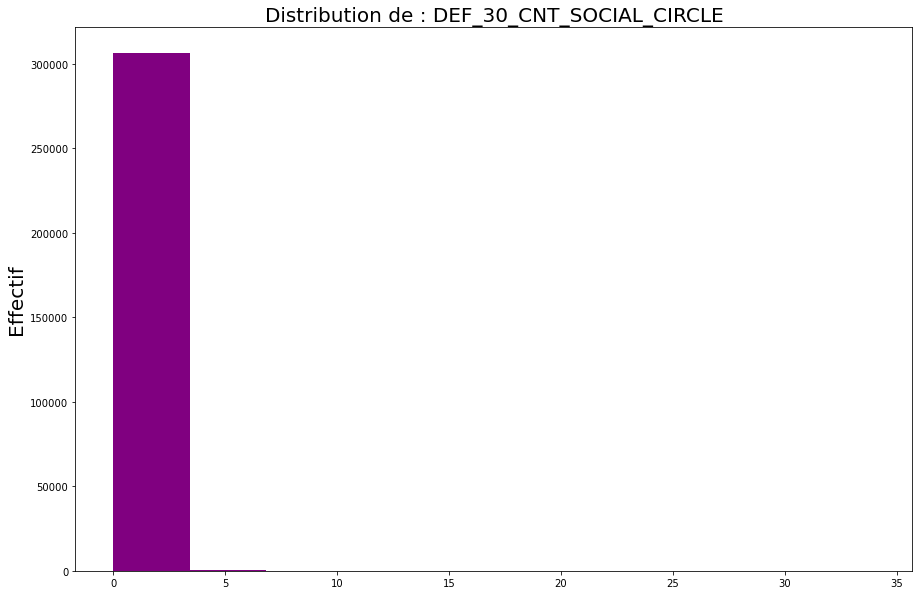

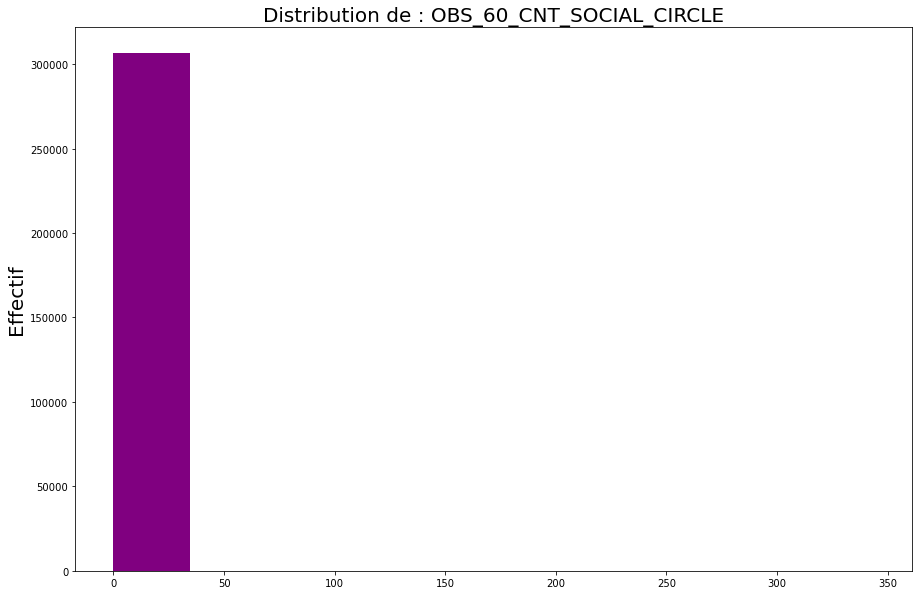

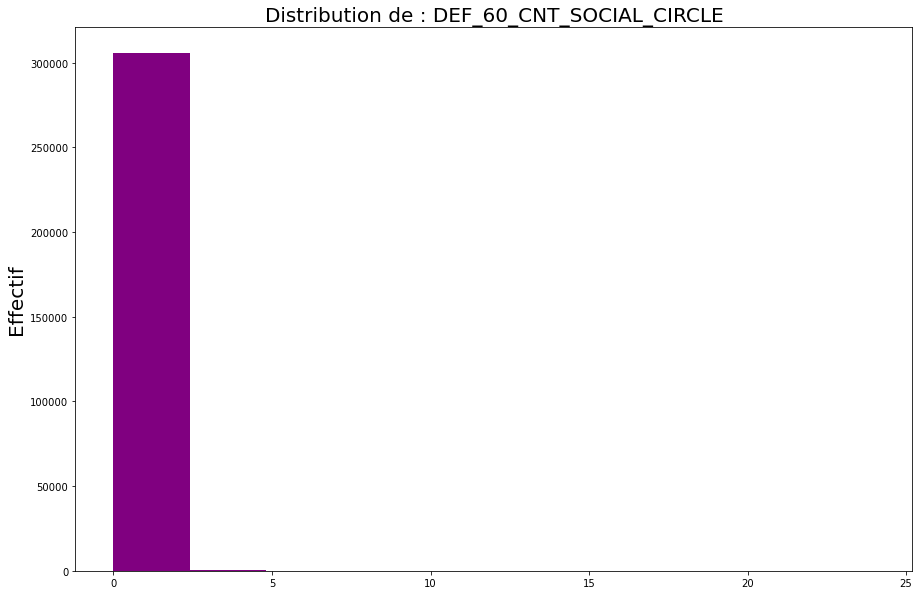

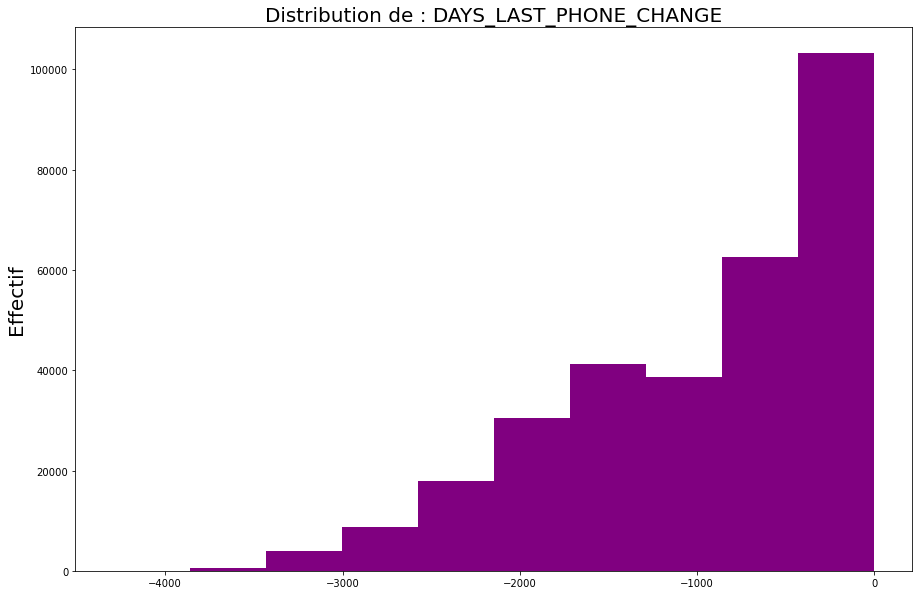

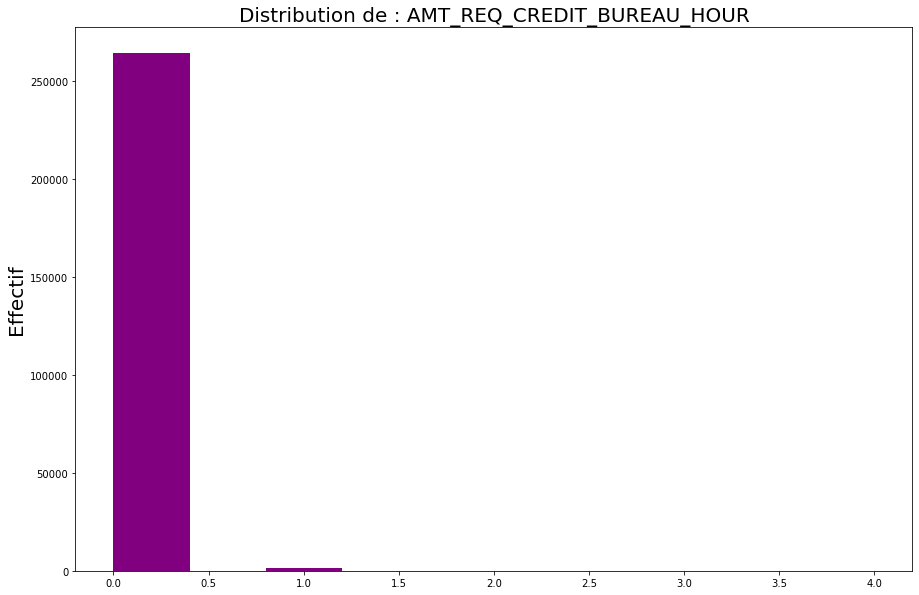

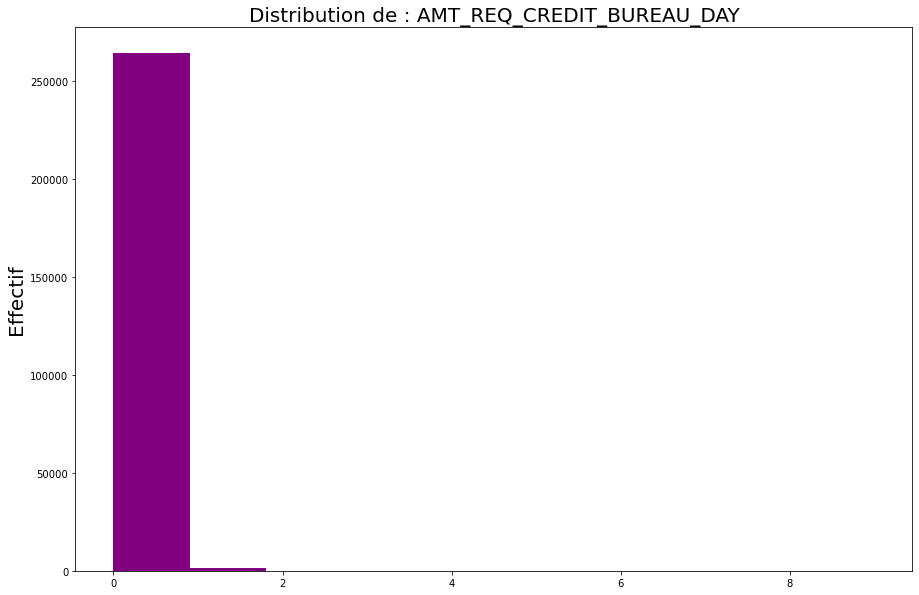

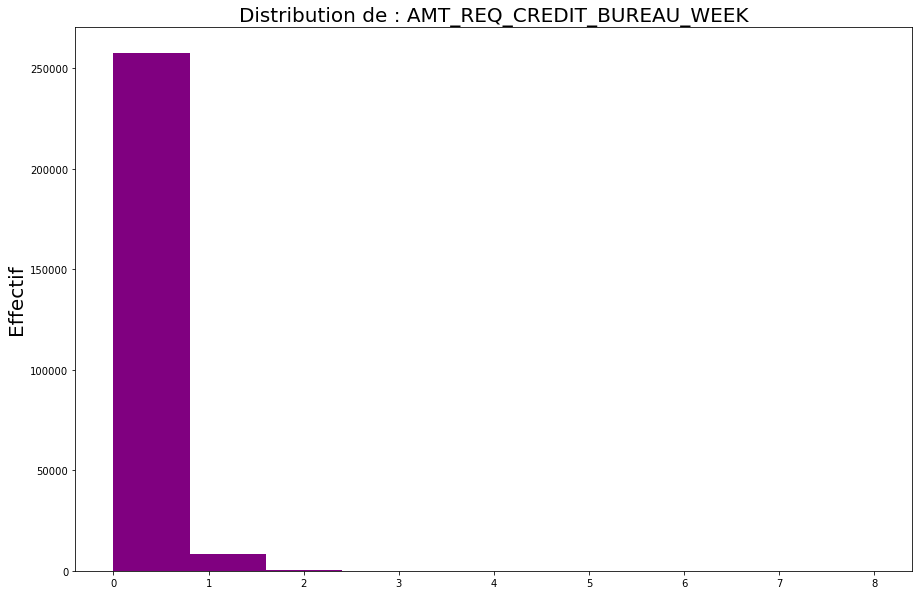

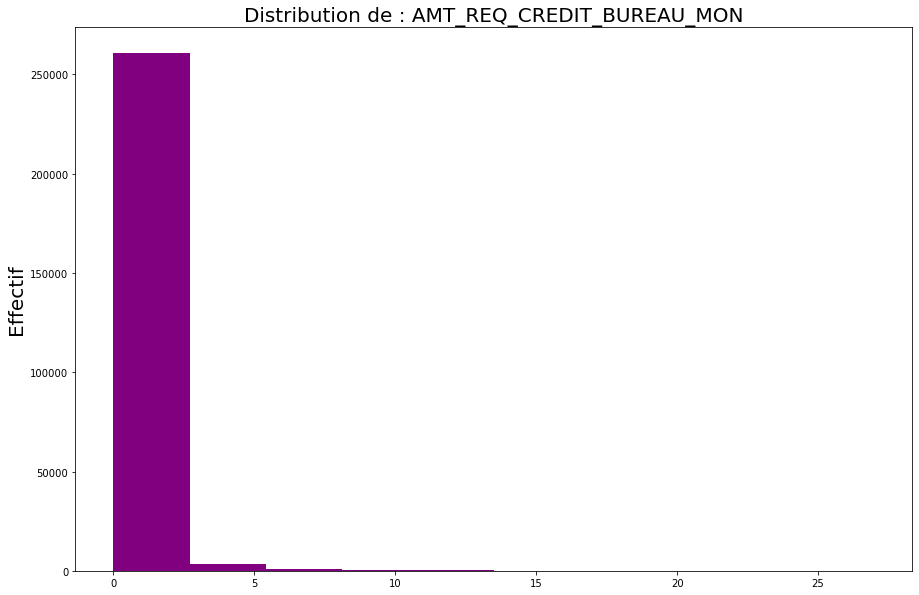

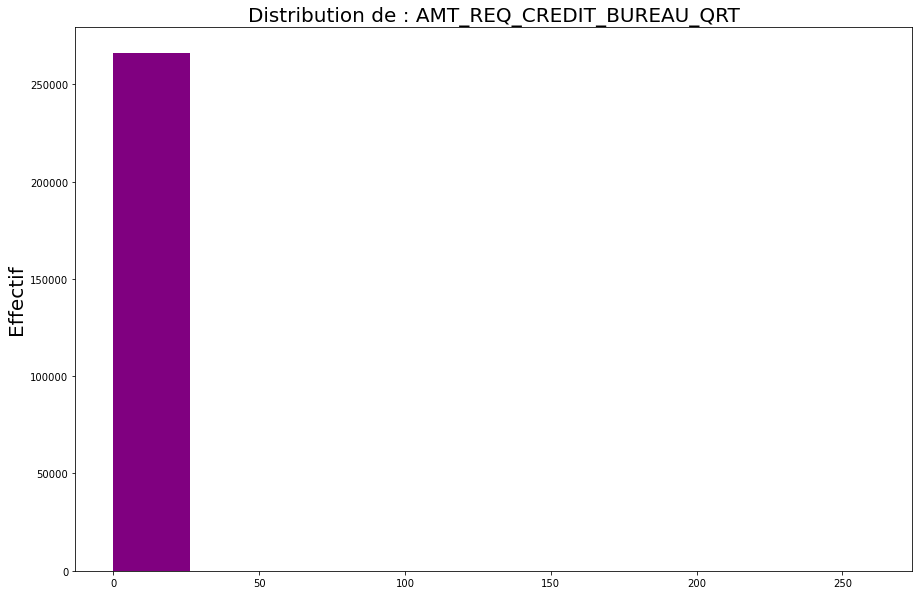

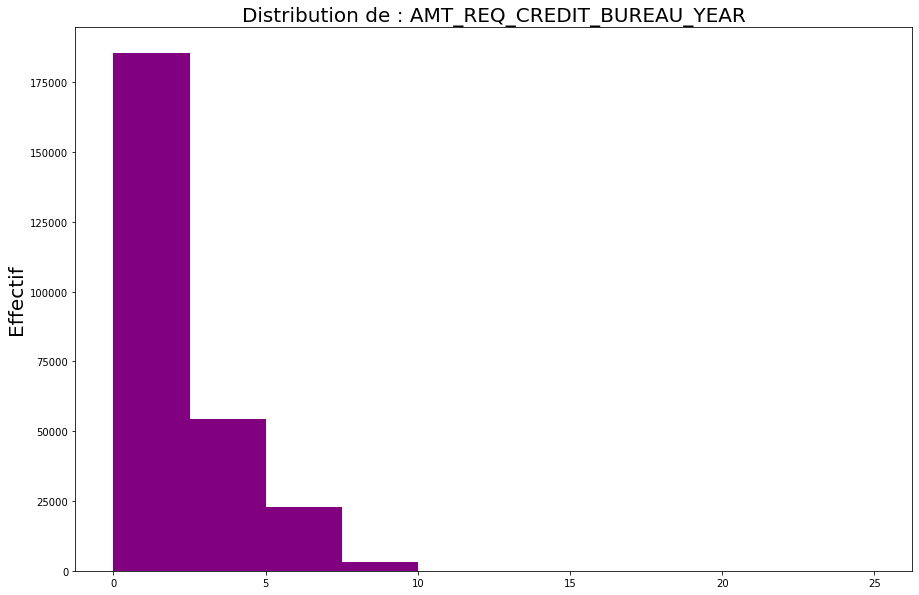

In [84]:
for col in data.select_dtypes('float64'):
    plt.figure(figsize=(15, 10))
    plt.hist(data[col], color='purple')#, bins=30)
    plt.xlabel("", fontsize=20)
    plt.ylabel("Effectif", fontsize=20)
    plt.title("Distribution de : " + str(col), fontsize=20)
    plt.show()

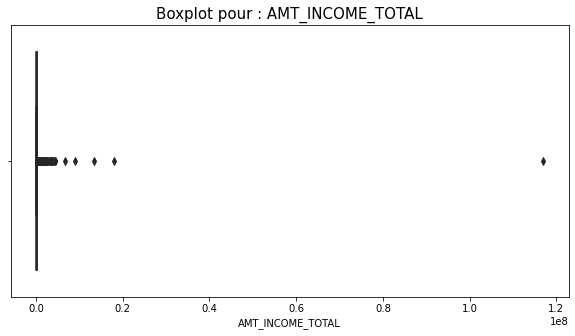

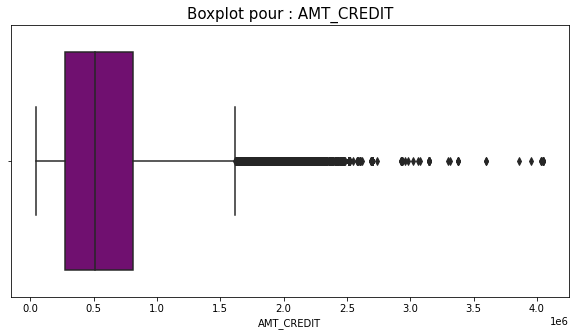

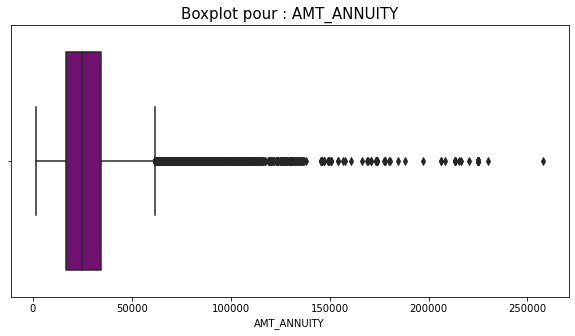

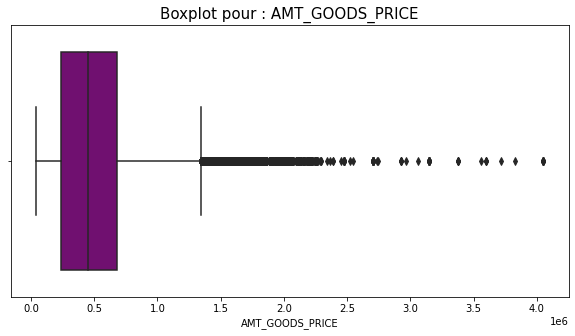

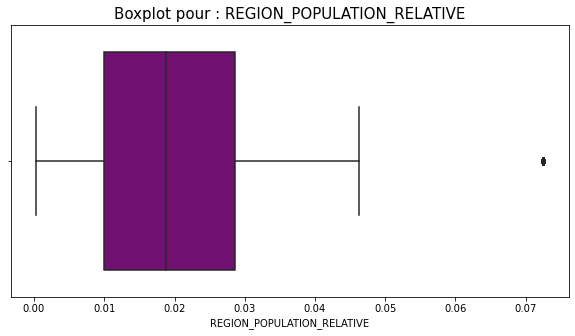

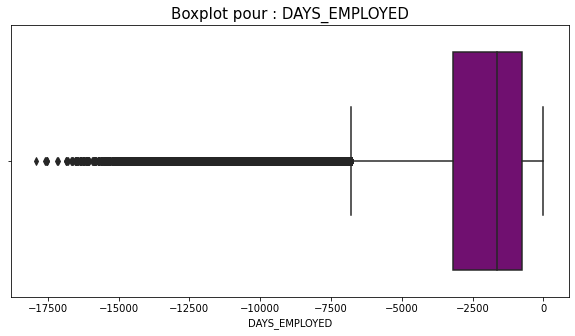

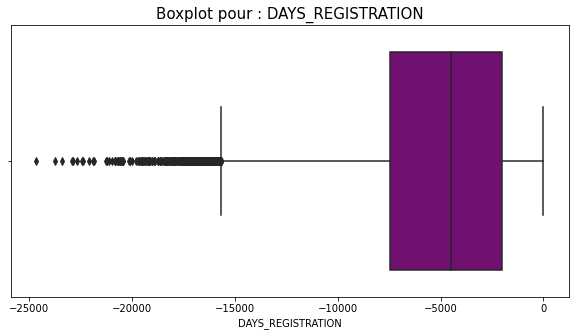

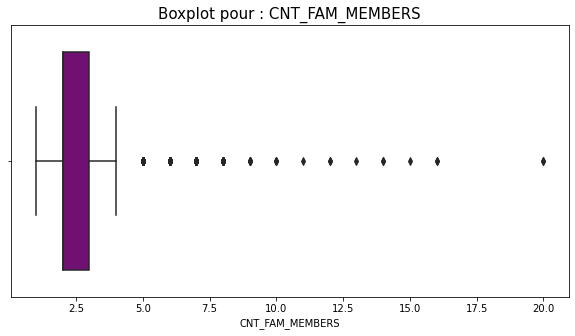

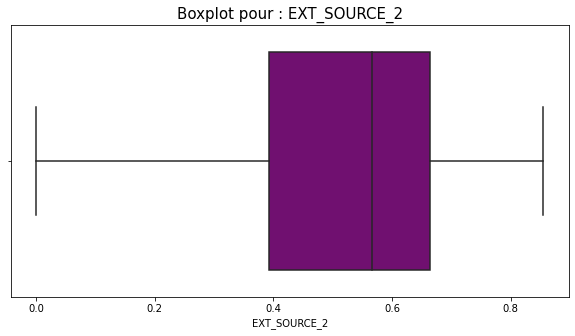

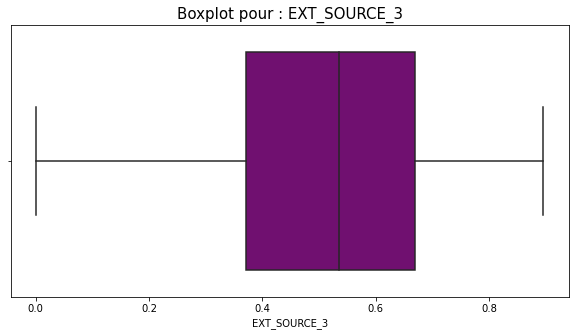

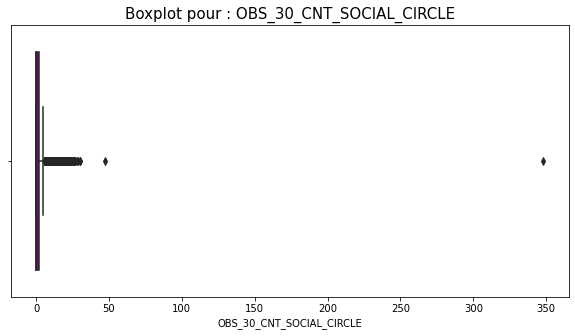

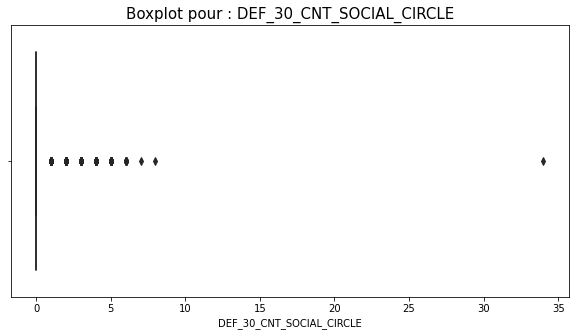

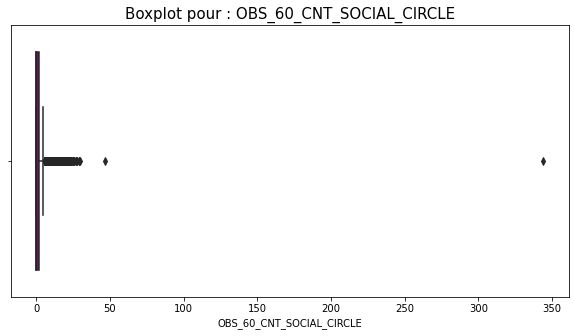

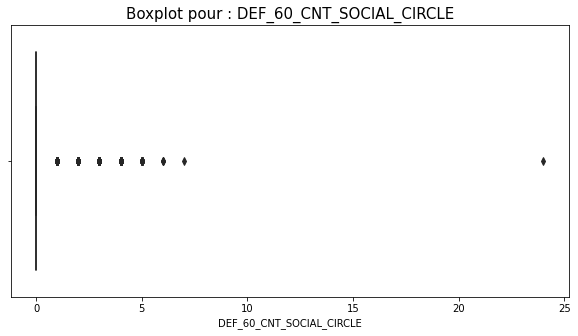

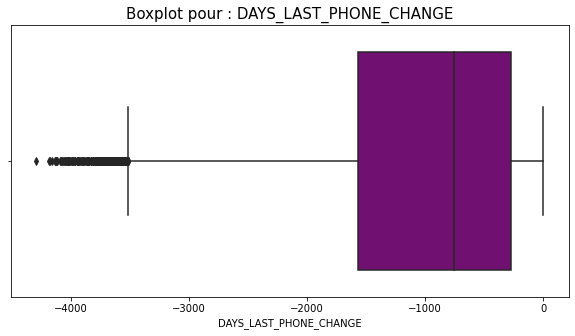

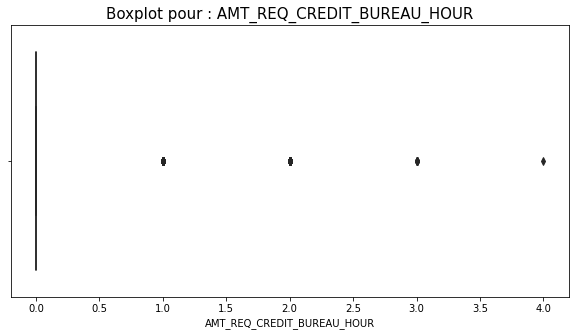

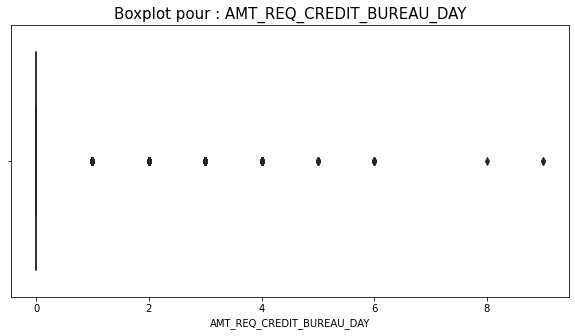

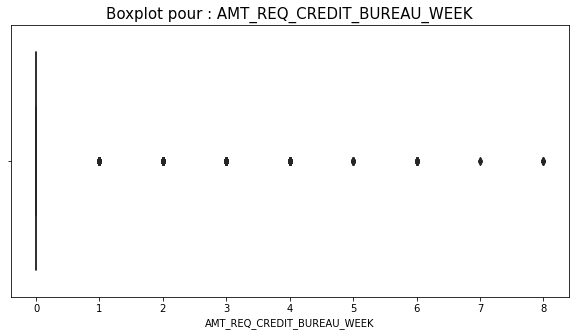

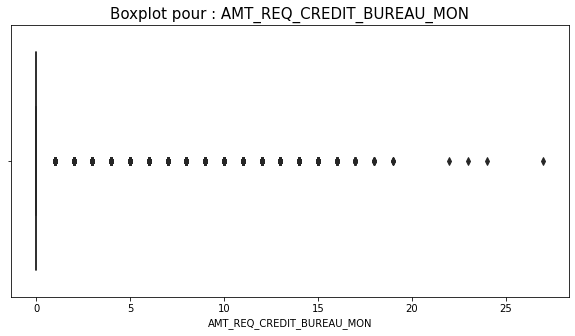

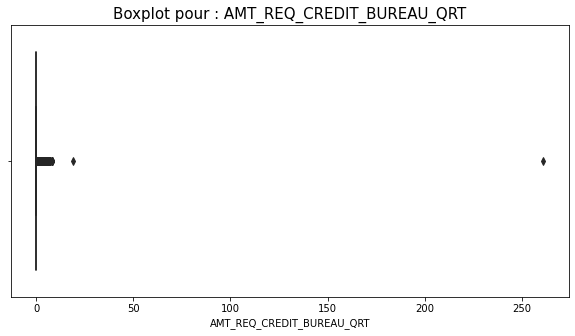

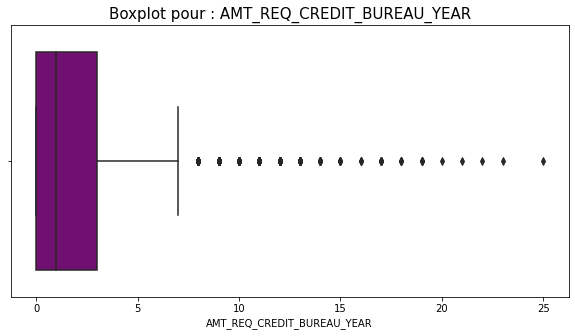

In [85]:
for col in data.select_dtypes('float64'):
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=col, data=data, color='purple')
    plt.title("Boxplot pour : " + str(col), fontsize=15)
    plt.show()

#### Remarques : 
- les variables DAYS_REGISTRATION et DAYS_LAST_PHONE_CHANGE sont négatives car calculées en nombre de jours à partir de la date de demande du prêt

#### Traitement des variables 'DAYS_REGISTRATION' et 'DAYS_LAST_PHONE_CHANGE'

In [86]:
data['DAYS_REGISTRATION'].describe()

count    307511.000000
mean      -4986.120328
std        3522.886321
min      -24672.000000
25%       -7479.500000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64

<AxesSubplot:>

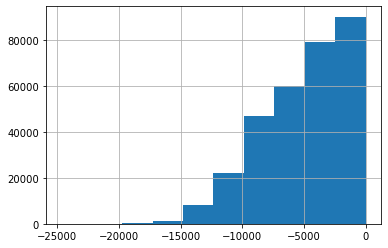

In [87]:
data['DAYS_REGISTRATION'].hist()

In [88]:
(data['DAYS_REGISTRATION'] / -365).describe()

count    307511.000000
mean         13.660604
std           9.651743
min          -0.000000
25%           5.506849
50%          12.339726
75%          20.491781
max          67.594521
Name: DAYS_REGISTRATION, dtype: float64

<AxesSubplot:>

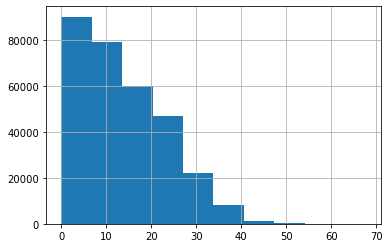

In [89]:
(data['DAYS_REGISTRATION'] / -365).hist()

In [90]:
data['DAYS_LAST_PHONE_CHANGE'].describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

<AxesSubplot:>

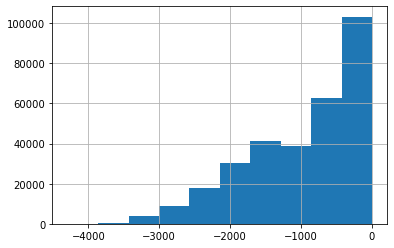

In [91]:
data['DAYS_LAST_PHONE_CHANGE'].hist()

In [92]:
(data['DAYS_LAST_PHONE_CHANGE'] / -365).describe()

count    307510.000000
mean          2.637969
std           2.265229
min          -0.000000
25%           0.750685
50%           2.073973
75%           4.301370
max          11.758904
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

<AxesSubplot:>

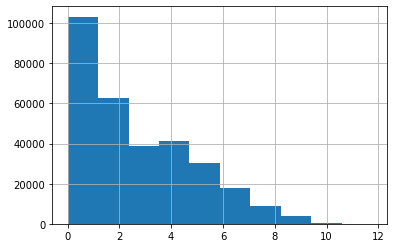

In [93]:
(data['DAYS_LAST_PHONE_CHANGE'] / -365).hist()

### Récapitulatif des données :

- Informations sur le prêt :
    - Type de contrat
    
    
- Informations sur l'emprunteur :
    - Informations personnelles : age, sexe, famille, travail, éducation, habitation...
    - Informations financières : revenu, crédit, annuités...
    - Informations sur la localisation du client
    - Informations sur les moyens de communication : téléphone, mail..
    - Notation du client par des sources extérieurs


- Informations sur le processus d'octroi du prêt :
     - Jour de la semaine et heure de la demande de prêt
     - Documents fournis par le client 

### Vérification des colonnes avec valeur unique

In [94]:
for col in data.columns:
    if data[col].nunique() == 1:
        print("Valeur unique dans la colonne ", col)

### -> Il n'y a pas de variable avec une valeur unique

## Analyse de la variable cible

<AxesSubplot:ylabel='Frequency'>

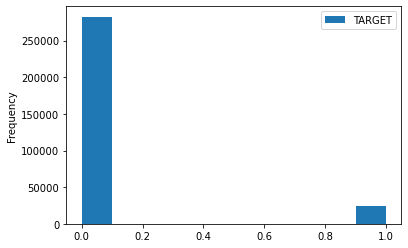

In [95]:
data['TARGET'].astype(int).plot.hist(legend='Cible')

In [96]:
data['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

### On remarque qu'il y a un sous-échantillonage de la valeur 1 (défaut du client) comparée à la valeur 0 (pas de défaut)
### -> On pourra y remédier en sur-échantillonant les individus ayant comme cible la valeur 1

## Analyse des corrélations des variables avec la cible

In [97]:
correlations = data.corr()['TARGET'].sort_values()

print('Correlations Positives les plus élevées:\n', correlations.tail(15))
print('\nCorrelations Negatives les plus élevées:\n', correlations.head(15))

Correlations Positives les plus élevées:
 DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Correlations Negatives les plus élevées:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
AMT_CREDIT                   -0.030369
FLAG_DOCUMENT_6              -0.028602
HOUR_APPR_PROCESS_START      -0.024166
FLAG_PHONE   

### Corrélations les plus élevées (en valeur absolue) :
- positives : DAYS_BIRTH (8%)
- négatives : EXT_SOURCE_3 (18%) / EXT_SOURCE_2 (16%)

### Etude de la variable 'DAYS_BIRTH' (âge des clients)

#### Distribution

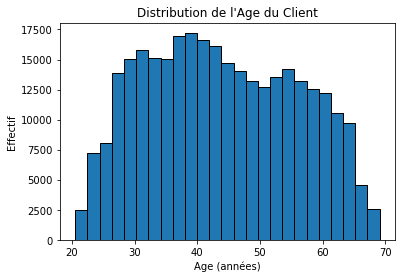

In [98]:
plt.figure()
plt.hist((data['DAYS_BIRTH'] / -365), edgecolor = 'k', bins = 25)
plt.title("Distribution de l'Age du Client")
plt.xlabel('Age (années)')
plt.ylabel('Effectif')
plt.show()

#### Effet de l'âge sur la cible

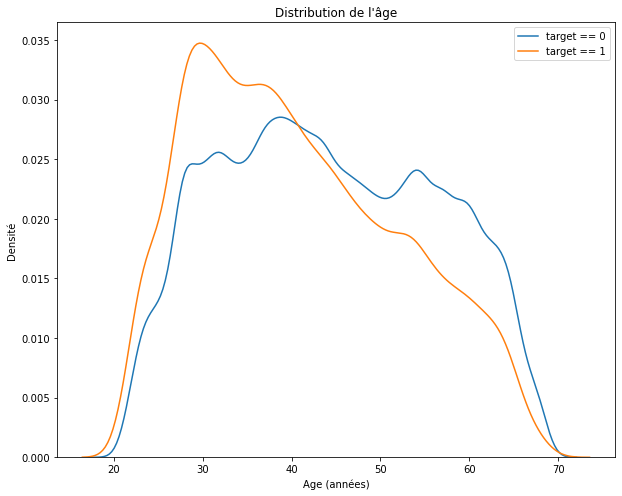

In [99]:
plt.figure(figsize = (10, 8))

sns.kdeplot((data.loc[data['TARGET'] == 0, 'DAYS_BIRTH'] / -365), label = 'target == 0')

sns.kdeplot((data.loc[data['TARGET'] == 1, 'DAYS_BIRTH'] / -365), label = 'target == 1')

plt.xlabel('Age (années)')
plt.ylabel('Densité')
plt.title("Distribution de l'âge")
plt.legend()
plt.show()

#### Etude du défaut de remboursement en fonction de l'âge

In [100]:
age_data = data [['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = abs(age_data['DAYS_BIRTH'] / 365)

# On discrétise la variable des données sur l'âge
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

TARGET  DAYS_BIRTH  YEARS_BIRTH  YEARS_BINNED
0       1       -9461    25.920548  (25.0, 30.0]
1       0      -16765    45.931507  (45.0, 50.0]
2       0      -19046    52.180822  (50.0, 55.0]
3       0      -19005    52.068493  (50.0, 55.0]
4       0      -19932    54.608219  (50.0, 55.0]
5       0      -16941    46.413699  (45.0, 50.0]
6       0      -13778    37.747945  (35.0, 40.0]
7       0      -18850    51.643836  (50.0, 55.0]
8       0      -20099    55.065753  (55.0, 60.0]
9       0      -14469    39.641096  (35.0, 40.0]

In [101]:
# On regroupe par classe et on calcule la moyenne
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

TARGET    DAYS_BIRTH  YEARS_BIRTH
YEARS_BINNED                                     
(20.0, 25.0]  0.123036  -8532.795625    23.377522
(25.0, 30.0]  0.111436 -10155.219250    27.822518
(30.0, 35.0]  0.102814 -11854.848377    32.479037
(35.0, 40.0]  0.089414 -13707.908253    37.555913
(40.0, 45.0]  0.078491 -15497.661233    42.459346
(45.0, 50.0]  0.074171 -17323.900441    47.462741
(50.0, 55.0]  0.066968 -19196.494791    52.593136
(55.0, 60.0]  0.055314 -20984.262742    57.491131
(60.0, 65.0]  0.052737 -22780.547460    62.412459
(65.0, 70.0]  0.037270 -24292.614340    66.555108

Text(0.5, 1.0, "Défaut par groupe d'âge")

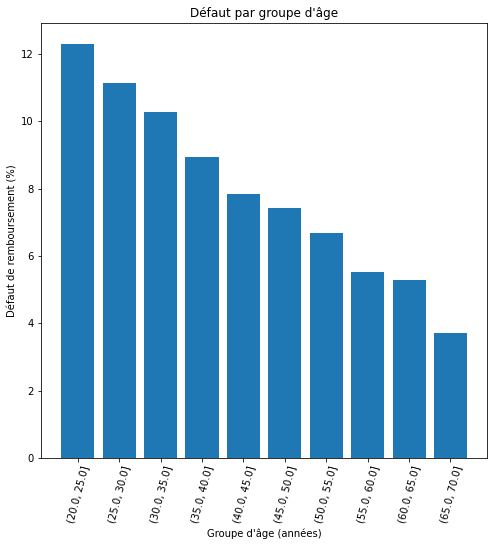

In [102]:
plt.figure(figsize = (8, 8))

plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

plt.xticks(rotation = 75)
plt.xlabel("Groupe d'âge (années)")
plt.ylabel('Défaut de remboursement (%)')
plt.title("Défaut par groupe d'âge")

#### On remarque que le taux de défaut diminue avec l'âge des clients

### Etude des variables EXT_SOURCE_2 et EXT_SOURCE_3

#### Corrélations

In [103]:
ext_data = data[['TARGET', 'EXT_SOURCE_2', 'EXT_SOURCE_3']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

TARGET  EXT_SOURCE_2  EXT_SOURCE_3
TARGET        1.000000     -0.160472     -0.178919
EXT_SOURCE_2 -0.160472      1.000000      0.109167
EXT_SOURCE_3 -0.178919      0.109167      1.000000

#### Etude du défaut de remboursement en fonction des 2 variables

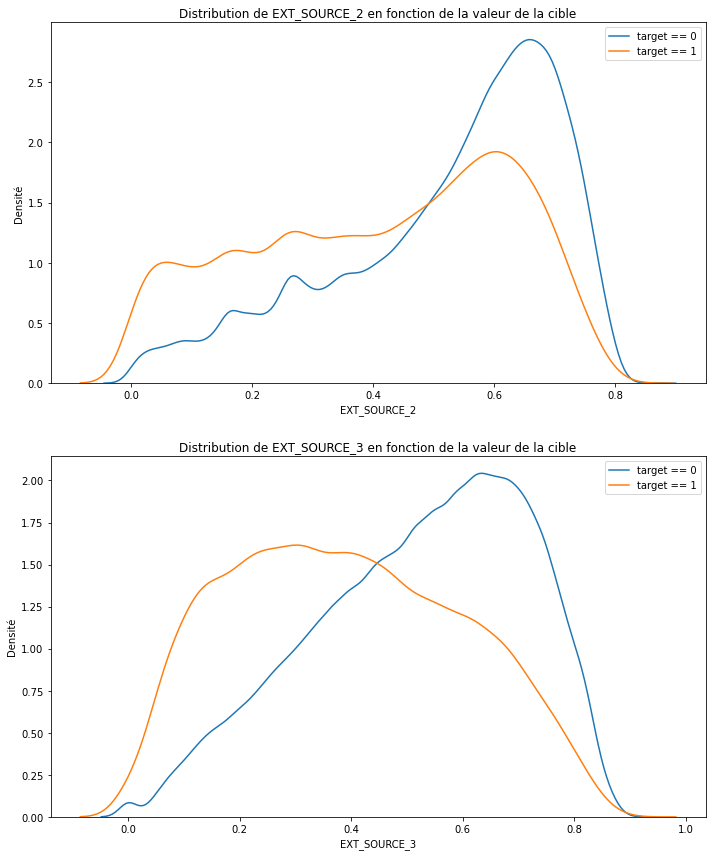

In [104]:
plt.figure(figsize = (10, 12))

for i, source in enumerate(['EXT_SOURCE_2', 'EXT_SOURCE_3']):
    plt.subplot(2, 1, i + 1)
    sns.kdeplot(data.loc[data['TARGET'] == 0, source], label = 'target == 0')
    sns.kdeplot(data.loc[data['TARGET'] == 1, source], label = 'target == 1')
    plt.title('Distribution de %s en fonction de la valeur de la cible' % source)
    plt.xlabel('%s' % source)
    plt.ylabel('Densité')
    plt.legend()
    
plt.tight_layout(h_pad = 2.5)
plt.show()

# 5 - Copie et sauvegarde des donnée nettoyées

In [105]:
data_cleaned = data.copy(deep=True)

In [106]:
data_cleaned.to_csv("application_train_cleaned.csv", index=False)

# C - PreProcessing 

## 1 - Création d'un jeu de données d'entrainement et de test

In [107]:
X = data_cleaned.drop(columns="TARGET")
y = data_cleaned["TARGET"]

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y, random_state=0)

In [109]:
print("X_train : ")
print(f" - Nombre de lignes : {X_train.shape[0]}")
print(f" - Nombre de colonnes : {X_train.shape[1]}")

print("y_train : ")
print(f" - Nombre de lignes : {y_train.shape[0]}")

print("\nX_test : ")
print(f" - Nombre de lignes : {X_test.shape[0]}")
print(f" - Nombre de colonnes : {X_test.shape[1]}")

print("y_test : ")
print(f" - Nombre de lignes : {y_test.shape[0]}")


X_train : 
 - Nombre de lignes : 246008
 - Nombre de colonnes : 72
y_train : 
 - Nombre de lignes : 246008

X_test : 
 - Nombre de lignes : 61503
 - Nombre de colonnes : 72
y_test : 
 - Nombre de lignes : 61503


In [110]:
X_train_echantillon, _ , y_train_echantillon, _ = train_test_split(X_train, y_train, train_size=0.05, stratify=y_train, random_state=0)

## 2 - Création de nouvelles variables métier

#### Nouvelles variables métier :
- CREDIT_INCOME_PERCENT = AMT_CREDIT / AMT_INCOME_TOTAL
- ANNUITY_INCOME_PERCENT = AMT_ANNUITY / AMT_INCOME_TOTAL
- CREDIT_LENGTH = AMT_CREDIT / AMT_ANNUITY
- DAYS_EMPLOYED_PERCENT = DAYS_EMPLOYED / DAYS_BIRTH
- INCOME_PER_PERSON = AMT_INCOME_TOTAL / CNT_FAM_MEMBERS

##### Création d'un 'Transfomer' personnalisé pour ajouter les nouvelles variables métier créées

In [111]:
class AttributesAdder (BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X['CREDIT_INCOME_PERCENT'] = X['AMT_CREDIT'].div(X['AMT_INCOME_TOTAL']).replace(np.inf, np.nan )
        X['ANNUITY_INCOME_PERCENT'] = X['AMT_ANNUITY'].div(X['AMT_INCOME_TOTAL']).replace(np.inf, np.nan )
        X['CREDIT_LENGTH'] = X['AMT_CREDIT'].div(X['AMT_ANNUITY']).replace(np.inf, np.nan )
        X['DAYS_EMPLOYED_PERCENT'] = X['DAYS_EMPLOYED'].div(X['DAYS_BIRTH']).replace(np.inf, np.nan )
        X['INCOME_PER_PERSON'] = X['AMT_INCOME_TOTAL'].div(X['CNT_FAM_MEMBERS']).replace(np.inf, np.nan )
        return X

In [112]:
attributes_adder = AttributesAdder()

## 3 - Imputation / Encodage / Standardisation

### Variables quantitatives :
- Imputation des valeurs manquantes par la moyenne
- Standardisation

In [113]:
numerical_features = make_column_selector(dtype_include=['int64', 'float64'])

In [114]:
num_simple_imputer = SimpleImputer(strategy='mean')
num_standard_scaler = StandardScaler()

In [115]:
numerical_pipeline = Pipeline([('num_imputer', num_simple_imputer),
                                 ('num_scaler', num_standard_scaler)])

### Variables qualitatives :
- Imputation des valeurs manquantes par la valeur la plus fréquente
- Encodage pour les transformer en valeurs numériques

In [116]:
cateorical_features = make_column_selector(dtype_include=['category'])

In [117]:
cat_simple_imputer = SimpleImputer(strategy='most_frequent')
cat_one_hot_encoder = OneHotEncoder(handle_unknown='ignore')

In [118]:
categorical_pipeline = Pipeline([('cat_imputer', cat_simple_imputer),
                                 ('cat_encoder', cat_one_hot_encoder)])

### PreProcessor colonnes :

In [119]:
preprocessor_columns = make_column_transformer((numerical_pipeline, numerical_features),
                                      (categorical_pipeline, cateorical_features))

## 4 - Ré-échantillonage des données

##### Utilisation de la méthode de sur échantillonage SMOTE (Synthetic Minority Oversampling Technique) pour rééquilibrer les classes

In [120]:
over_sample = SMOTE()

## 5 - Sélection des variables

##### Utilisation de la méthode SelectKBest pour sélectionner les variables les plus significatives

In [121]:
selector_best_var = SelectKBest()

# D - Modélisation

## 1 - Choix de la métrique adaptée à l'objectif et l'aspect métier

### Choix d'une métrique :

La métrique doit permettre de :

1 - **Minimiser les faux négatifs** : risque le plus important pour la banque = prêter et ne pas être remboursée
- Faux négatifs : le modèle predit 0 alors que la target vaut 1 = la banque va prêter et ne sera pas remboursée
- *Pour cela il faut maximiser le Recall*


2 - **Minimiser les faux positifs** : risque le moins important pour la banque = ne pas prêter alors qu'elle aurait été remboursée (il ne faut pas prédire uniquement des valeurs à 0 car la banque doit aussi accorder des prêts pour gagner de l'argent)
- Faux positifs le modèle prédit 1 alors que la target vaut 0 = la banque ne va pas prêter alors qu'elle aurait été remboursée
- *Pour cela il faut maximiser la Precision*

### Il faut un compromis entre la maximisation du Recall et la maximisation de la Precision en mettant plus d'importance sur le Recall car il correspond au risque le plus important pour la banque

### Métrique choisie : 
- **AUROC** :
    - pour optimiser les hyperparamètres et choisir parmi tous les modèles quel est le modèle le plus performant
    
    
- **F-Beta** :
    - pour optimiser le modèle le plus performant
    - avec un Beta = 3 pour surpondérer le Recall par rapport à la Precision

### Création de la métrique dédiée 'fthree' = F-Beta avec Beta=3 pour donner plus d'importance au Recall

In [122]:
fthree_scorer = make_scorer(fbeta_score, beta=3)

## 2 - Modèles

In [123]:
dict_model_param={}

### Modèles linéaires

#### LogisticRegression

In [124]:
model_logisticregression = LogisticRegression(random_state=0)

In [125]:
param_grid_logisticregression = {
    'selectkbest__k':[10, 20, 30, 40, 50, 60, 72],
    'logisticregression__penalty':['l1', 'l2', 'elasticnet', 'none'],
    'logisticregression__C':[0.01, 0.1, 1, 10, 100]
}

In [126]:
dict_model_param['logisticregression'] = [model_logisticregression, param_grid_logisticregression]

#### SGDClassifier

In [127]:
model_sgdclassifier = SGDClassifier(random_state=0)

In [128]:
param_grid_sgdclassifier = {
    'selectkbest__k':[10, 20, 30, 40, 50, 60, 72],
    'sgdclassifier__loss':['hinge','log','squared_loss'],
    'sgdclassifier__penalty':['l2', 'l1', 'elasticnet'],
    'sgdclassifier__alpha':[0.0001, 0.001, 0.01, 0.1]
}

In [129]:
dict_model_param['sgdclassifier'] = [model_sgdclassifier, param_grid_sgdclassifier]

### Modèles non linéaires

#### Kernel SVC

In [130]:
model_svc = SVC(random_state=0)

In [131]:
param_grid_svc = {
    'selectkbest__k':[10, 20, 30, 40, 50, 60, 72],
    'svc__kernel':['poly','sigmoid', 'rbf'],
    'svc__C':[0.001, 0.1, 1, 10, 100, 1000]
}

In [132]:
dict_model_param['svc'] = [model_svc, param_grid_svc]

### Modèles ensemblistes

#### RandomForestClassifier

In [133]:
model_randomforestclassifier = RandomForestClassifier(random_state=0)

In [134]:
param_grid_randomforestclassifier = {
    'selectkbest__k':[10, 20, 30, 40, 50, 60, 72],
    'randomforestclassifier__max_depth':[3, 5, 7, 10, 'None'],
    'randomforestclassifier__max_features':['sqrt', 'log2']
}

In [135]:
dict_model_param['randomforestclassifier'] = [model_randomforestclassifier, param_grid_randomforestclassifier]

#### AdaBoost

In [136]:
model_adaboost = AdaBoostClassifier(random_state=0)

In [137]:
param_grid_adaboost = {
    'selectkbest__k':[10, 20, 30, 40, 50, 60, 70],
    'adaboostclassifier__learning_rate':[0.001, 0.01, 0.1, 1]
}

In [138]:
dict_model_param['adaboostclassifier'] = [model_adaboost, param_grid_adaboost]

#### HistGradientBoostingClassifier

In [139]:
model_histgradientboosting = HistGradientBoostingClassifier(random_state=0)

In [140]:
param_grid_histgradientboosting = {
    'selectkbest__k':[10, 20, 30, 40, 50, 60, 70],
    'histgradientboostingclassifier__learning_rate':[0.001, 0.01, 0.1],
    'histgradientboostingclassifier__max_iter':[10, 30, 50, 150, 200],
    'histgradientboostingclassifier__max_depth':[3, 7, 9, 'None']
}

In [141]:
dict_model_param['histgradientboosting'] = [model_histgradientboosting, param_grid_histgradientboosting]

### Modèle de référence Dummy Classifier

In [142]:
model_dummy = DummyClassifier(random_state=0, strategy="constant", constant=0)

In [143]:
param_grid_dummy = {}

In [144]:
dict_model_param['dummy'] = [model_dummy, param_grid_dummy]

## 3 - Entrainement

In [145]:
def train(model, param_grid, X_train, y_train):
    
    model_pipeline = make_pipeline(attributes_adder, preprocessor_columns, over_sample, selector_best_var, model)

    stratified_cv = StratifiedKFold(shuffle=True, random_state=0)
    
    grid_search = GridSearchCV(model_pipeline, param_grid, scoring='roc_auc', cv=stratified_cv, return_train_score=True)
    
    grid_search_result_fit = grid_search.fit(X_train, y_train)
    
    return grid_search_result_fit

In [146]:
cv_results={}
best_params={}
best_score={}
best_index={}
best_estimator={}
best_mean_train_score={} 
best_mean_test_score={}
best_mean_fit_time={}

for k, v in dict_model_param.items():

    # entrainement
    grid_search_result_fit = train(v[0], v[1], X_train_echantillon, y_train_echantillon)

    # sauvegarde des résultats
    cv_results_df = pd.DataFrame(grid_search_result_fit.cv_results_)
    best_mean_train_score[k] = cv_results_df["mean_train_score"][grid_search_result_fit.best_index_]
    best_mean_test_score[k] = cv_results_df["mean_test_score"][grid_search_result_fit.best_index_]
    best_mean_fit_time[k] = cv_results_df["mean_fit_time"][grid_search_result_fit.best_index_]
    cv_results[k] = grid_search_result_fit.cv_results_
    best_params[k] = grid_search_result_fit.best_params_
    best_score[k] = grid_search_result_fit.best_score_
    best_index[k] = grid_search_result_fit.best_index_
    best_estimator[k] = grid_search_result_fit.best_estimator_
    
    # affichage des résultats
    print("\n", k)
    print(" - Best params : ", grid_search_result_fit.best_params_)
    print(" - Best index : ", grid_search_result_fit.best_index_)
    print("\n - Best mean_train_score = ", best_mean_train_score[k])
    print(" - Best mean_test_score = ", best_mean_test_score[k])
    print(" - Best mean_fit_time = ", best_mean_fit_time[k])


 logisticregression
 - Best params :  {'logisticregression__C': 1, 'logisticregression__penalty': 'l2', 'selectkbest__k': 30}
 - Best index :  65

 - Best mean_train_score =  0.743440826103153
 - Best mean_test_score =  0.7360193556207522
 - Best mean_fit_time =  1.1240042209625245

 sgdclassifier
 - Best params :  {'selectkbest__k': 30, 'sgdclassifier__alpha': 0.01, 'sgdclassifier__loss': 'hinge', 'sgdclassifier__penalty': 'l2'}
 - Best index :  90

 - Best mean_train_score =  0.7418590112446607
 - Best mean_test_score =  0.7351311273125962
 - Best mean_fit_time =  1.0030065536499024

 svc
 - Best params :  {'selectkbest__k': 10, 'svc__C': 0.001, 'svc__kernel': 'sigmoid'}
 - Best index :  1

 - Best mean_train_score =  0.720707484668438
 - Best mean_test_score =  0.7177893205519863
 - Best mean_fit_time =  16.52244563102722

 randomforestclassifier
 - Best params :  {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 'sqrt', 'selectkbest__k': 40}
 - Best

### Récapitulatif des meilleurs train scores, test scores et fit time pour chaque modèle

In [147]:
best_mean_train_score_sorted = dict(sorted(best_mean_train_score.items(), key=lambda item: item[1], reverse=True))
best_mean_test_score_sorted = dict(sorted(best_mean_test_score.items(), key=lambda item: item[1], reverse=True))
best_mean_fit_time_sorted = dict(sorted(best_mean_fit_time.items(), key=lambda item: item[1]))

# Récapitulatif des best scores
print("\nBEST MEAN TRAIN SCORES")
for k, v in best_mean_train_score_sorted.items():
    print(k,f"{v:.5f}")

print("\nBEST MEAN TEST SCORES")
for k, v in best_mean_test_score_sorted.items():
    print(k,f"{v:.5f}")
    
print("\nBEST MEAN FIT TIME")
for k, v in best_mean_fit_time_sorted.items():
    print(k,f"{v:.5f}")


BEST MEAN TRAIN SCORES
randomforestclassifier 0.92812
histgradientboosting 0.87503
logisticregression 0.74344
sgdclassifier 0.74186
svc 0.72071
adaboostclassifier 0.71924
dummy 0.50000

BEST MEAN TEST SCORES
logisticregression 0.73602
sgdclassifier 0.73513
histgradientboosting 0.71987
svc 0.71779
randomforestclassifier 0.70846
adaboostclassifier 0.69854
dummy 0.50000

BEST MEAN FIT TIME
sgdclassifier 1.00301
logisticregression 1.12400
dummy 1.49380
histgradientboosting 3.54820
randomforestclassifier 4.69420
adaboostclassifier 4.72376
svc 16.52245


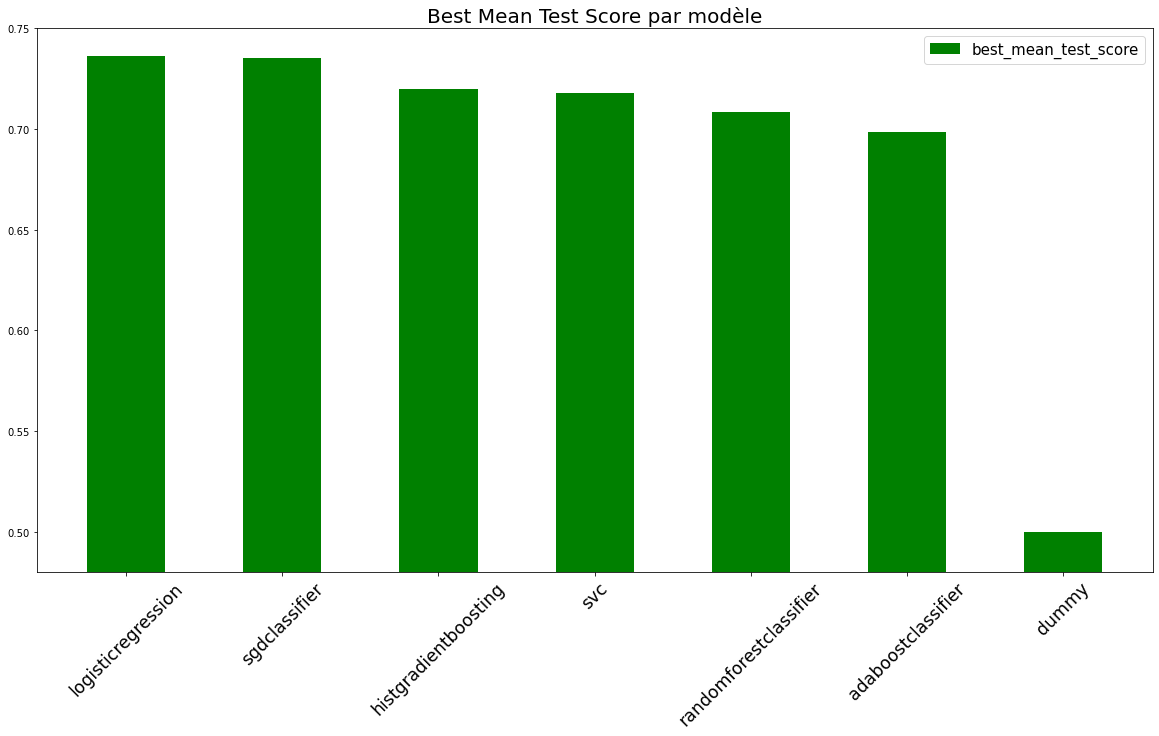

In [148]:
width=0.5
ind=np.arange(len(best_mean_test_score_sorted.items()))

plt.figure(figsize=(20,10))
plt.bar(ind, best_mean_test_score_sorted.values(), width, color='g', label='best_mean_test_score')
plt.xticks(range(len(best_mean_test_score_sorted.items())), best_mean_test_score_sorted.keys(), size='xx-large', rotation=45)
plt.ylim(0.48, 0.75)
plt.legend(fontsize=15)
plt.title("Best Mean Test Score par modèle", fontsize=20)
plt.show()

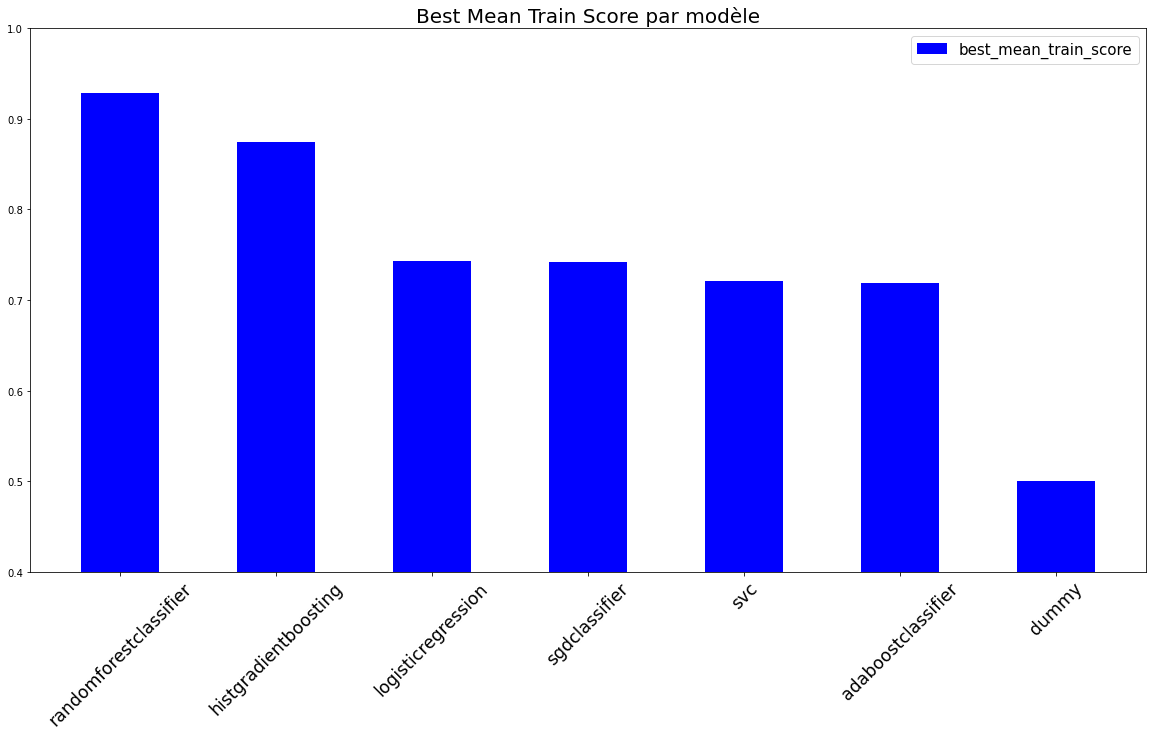

In [149]:
width=0.5
ind=np.arange(len(best_mean_train_score_sorted.items()))

plt.figure(figsize=(20,10))
plt.bar(ind, best_mean_train_score_sorted.values(), width, color='b', label='best_mean_train_score')
plt.xticks(range(len(best_mean_train_score_sorted.items())), best_mean_train_score_sorted.keys(), size='xx-large', rotation=45)
plt.ylim(0.4, 1.0)
plt.legend(fontsize=15)
plt.title("Best Mean Train Score par modèle", fontsize=20)
plt.show()

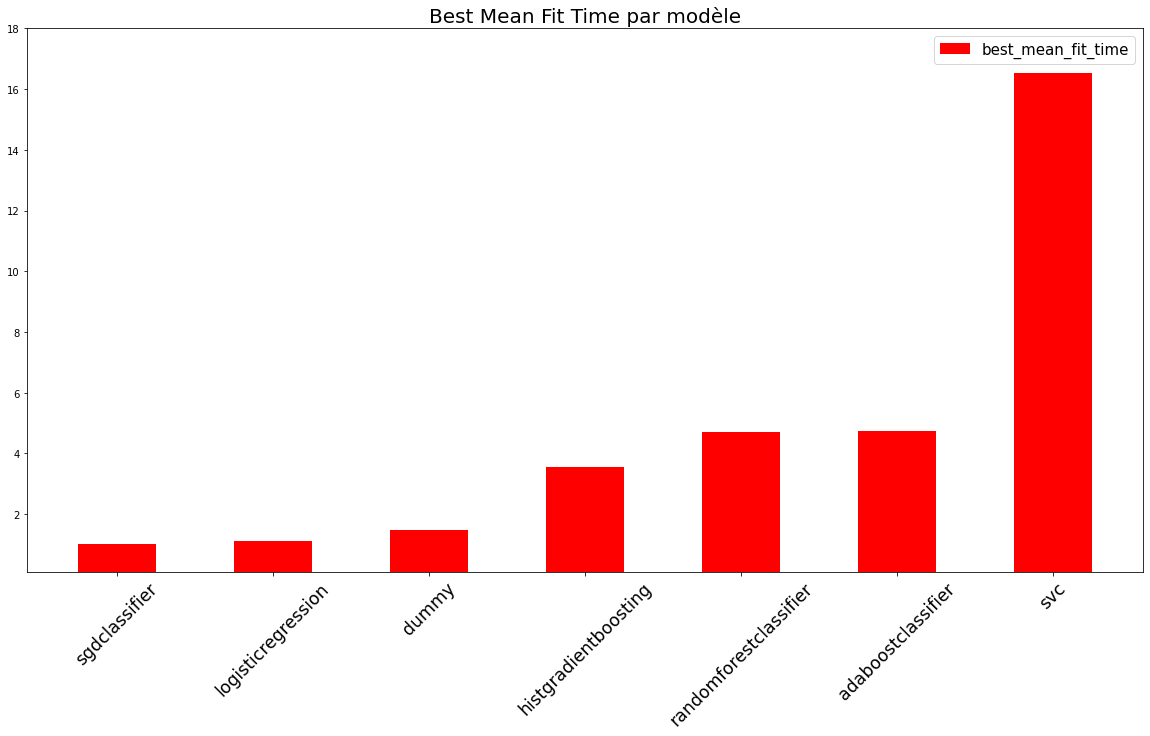

In [195]:
width=0.5
ind=np.arange(len(best_mean_fit_time_sorted.items()))

plt.figure(figsize=(20,10))
plt.bar(ind, best_mean_fit_time_sorted.values(), width, color='r', label='best_mean_fit_time')
plt.xticks(range(len(best_mean_fit_time_sorted.items())), best_mean_fit_time_sorted.keys(), size='xx-large', rotation=45)
plt.ylim(0.1, 18)
plt.legend(fontsize=15)
plt.title("Best Mean Fit Time par modèle", fontsize=20)
plt.show()

### Modèle retenu : Regression Logistique 
- Meilleur Mean Test Score
- Faible différence entre Mean Test Score et Mean Train Score (pas d'overfitting)
- Rapidité élevée

#### On reprend le modèle selectionné avec les meilleurs hyper paramètres et on l'entraine sur la totalité des données

In [151]:
best_params['logisticregression']

{'logisticregression__C': 1,
 'logisticregression__penalty': 'l2',
 'selectkbest__k': 30}

In [152]:
model_new = LogisticRegression(random_state=0,
                               C=best_params['logisticregression']['logisticregression__C'], 
                               penalty=best_params['logisticregression']['logisticregression__penalty'])

In [153]:
model_new_pipeline = make_pipeline(attributes_adder, preprocessor_columns, over_sample, SelectKBest(k=best_params['logisticregression']['selectkbest__k']), model_new)

In [154]:
best_model_new = model_new_pipeline.fit(X_train, y_train)

In [155]:
best_model_new

Pipeline(steps=[('attributesadder', AttributesAdder()),
                ('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('num_scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001BD98E19A30>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001BD97869370>)])),
                ('smote', SMOTE()), ('selectkbest', SelectKBest(k=30)),
                ('logisticregression',
                 LogisticRegression(C=1, random_state=0))])

## 4 - Evaluation

In [156]:
y_pred_cv_new = cross_val_predict(best_model_new, X_train, y_train, cv=5)

### AUC Score

In [157]:
auc = roc_auc_score(y_train, y_pred_cv_new)
print(f"AUC Score = {auc:.2f}")

AUC Score = 0.67


### Matrice de confusion

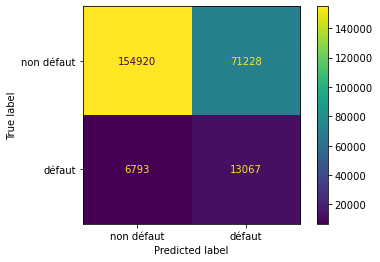

In [158]:
cm = confusion_matrix(y_train, y_pred_cv_new)

cmd = ConfusionMatrixDisplay(cm, display_labels=['non défaut','défaut'])
cmd.plot()

### Rapport de classification

In [159]:
print(classification_report(y_train, y_pred_cv_new))

              precision    recall  f1-score   support

           0       0.96      0.69      0.80    226148
           1       0.16      0.66      0.25     19860

    accuracy                           0.68    246008
   macro avg       0.56      0.67      0.52    246008
weighted avg       0.89      0.68      0.75    246008



## 5 - Optimisation en utilisant le seuil de décision

#### Nous allons chercher le seuil de décision au niveau des probabilités qui maximise la métrique cible F-Beta 3

In [160]:
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

In [161]:
def model_final(model, X, threshold):
    return model.predict_proba(X)[:,1] > threshold

### Probabilités prédites

In [162]:
prob_pos = best_model_new.predict_proba(X_train)[:, 1]
prob_pos

array([0.56287496, 0.42660894, 0.81194457, ..., 0.3910487 , 0.33015099,
       0.38515032])

In [163]:
thresholds = np.arange(0, 1, 0.001)

### Scores F-Beta_Three en fonction du seuil de décision

In [164]:
scores_fbeta = [fbeta_score(y_train, to_labels(prob_pos, t), beta=3) for t in thresholds]

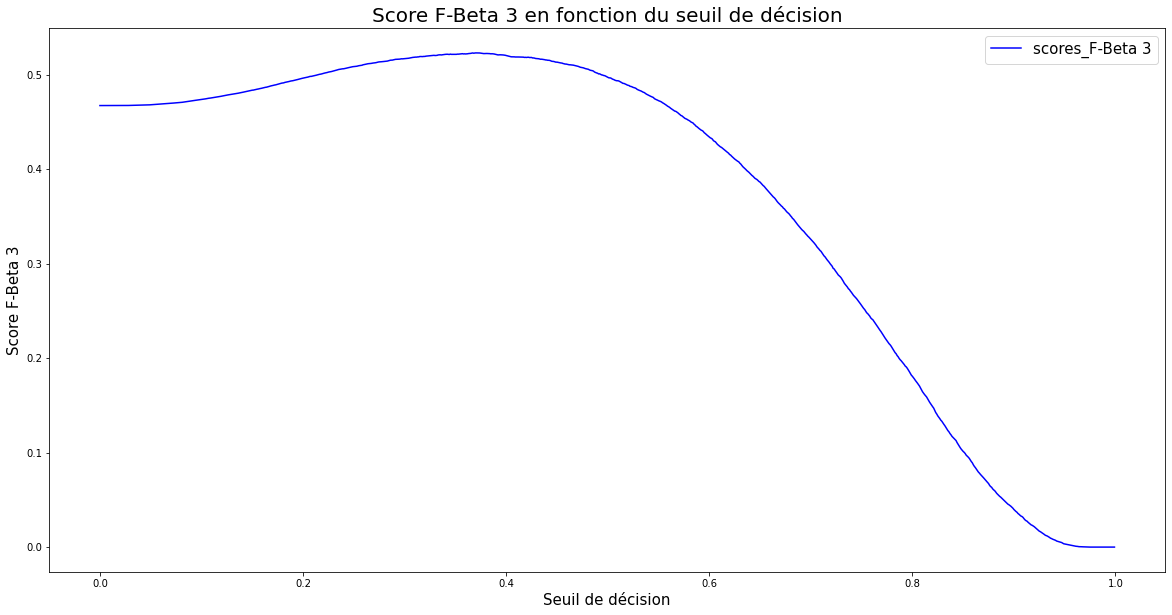

In [165]:
plt.figure(figsize=(20,10))
plt.plot(thresholds, scores_fbeta, color='b', label='scores_F-Beta 3')
plt.legend(fontsize=15)
plt.xlabel("Seuil de décision", fontsize=15)
plt.ylabel("Score F-Beta 3", fontsize=15)
plt.title("Score F-Beta 3 en fonction du seuil de décision", fontsize=20)
plt.show()

### Meilleur score F-Beta3

In [166]:
ix_best_fbeta = np.argmax(scores_fbeta)
best_threshold_fbeta = thresholds[ix_best_fbeta]
best_score_fbeta = scores_fbeta[ix_best_fbeta]

print('Best F-Beta3-Score Threshold=%.3f, Best F-Beta3-Score=%.3f' % (best_threshold_fbeta, best_score_fbeta))

Best F-Beta3-Score Threshold=0.370, Best F-Beta3-Score=0.523


### Courbe Précision - Rappel

In [167]:
precision, recall, threshold = precision_recall_curve(y_train, prob_pos)

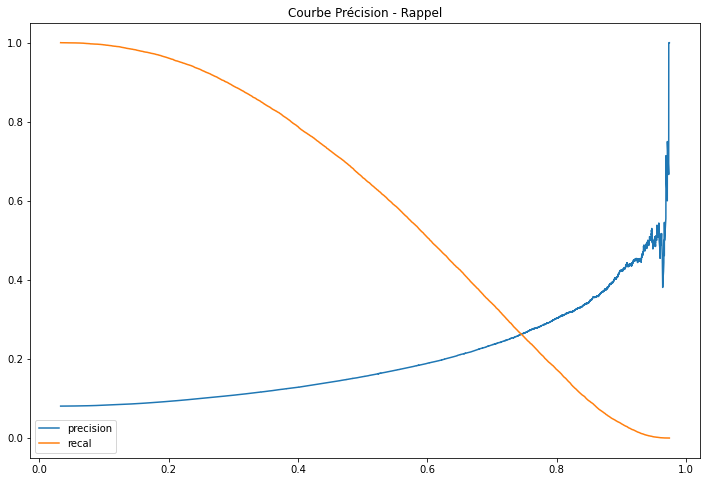

In [168]:
plt.figure(figsize=(12,8))
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recal')
plt.legend()
plt.title("Courbe Précision - Rappel")
plt.show()

### Evaluation sans optimisation du seuil de décision

In [169]:
y_pred = model_final(best_model_new, X_train, 0.5)

In [170]:
fbeta = fbeta_score(y_train, y_pred, beta=3)
print(f"F-Beta3 Score = {fbeta:.2f}")

F-Beta3 Score = 0.50


#### Matrice de confusion

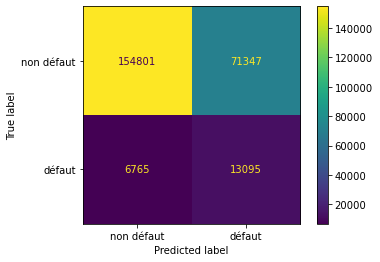

In [171]:
cm = confusion_matrix(y_train, y_pred)

cmd = ConfusionMatrixDisplay(cm, display_labels=['non défaut','défaut'])
cmd.plot()

#### Rapport de classification

In [172]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.68      0.80    226148
           1       0.16      0.66      0.25     19860

    accuracy                           0.68    246008
   macro avg       0.56      0.67      0.52    246008
weighted avg       0.89      0.68      0.75    246008



### Evaluation avec optimisation du seuil de décision

In [173]:
y_pred_optim = model_final(best_model_new, X_train, best_threshold_fbeta)

In [174]:
fbeta = fbeta_score(y_train, y_pred_optim, beta=3)
print(f"F-Beta3 Score = {fbeta:.2f}")

F-Beta3 Score = 0.52


#### Matrice de confusion

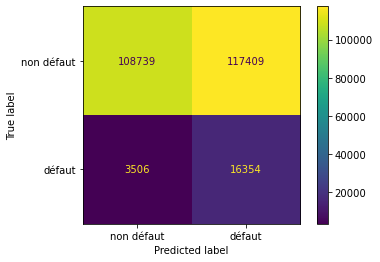

In [175]:
cm = confusion_matrix(y_train, y_pred_optim)

cmd = ConfusionMatrixDisplay(cm, display_labels=['non défaut','défaut'])
cmd.plot()

#### Rapport de classification

In [176]:
print(classification_report(y_train, y_pred_optim))

              precision    recall  f1-score   support

           0       0.97      0.48      0.64    226148
           1       0.12      0.82      0.21     19860

    accuracy                           0.51    246008
   macro avg       0.55      0.65      0.43    246008
weighted avg       0.90      0.51      0.61    246008



##### Nous avons amélioré la métrique cible en ajustant le seuil de décision

## 6 - Prediction

### Prédictions optimisées avec le seuil de décision

In [177]:
y_pred_optim_test = model_final(best_model_new, X_test, best_threshold_fbeta)

In [178]:
fbeta = fbeta_score(y_test, y_pred_optim_test, beta=3)
print(f"F-Beta3 Score = {fbeta:.2f}")

F-Beta3 Score = 0.53


#### Matrice de confusion

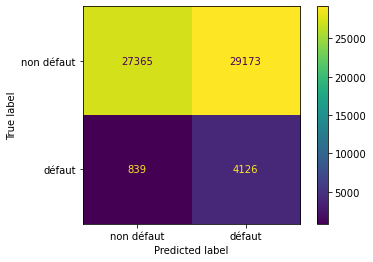

In [179]:
cm = confusion_matrix(y_test, y_pred_optim_test)

cmd = ConfusionMatrixDisplay(cm, display_labels=['non défaut','défaut'])
cmd.plot()

#### Rapport de classification

In [180]:
print(classification_report(y_test, y_pred_optim_test))

              precision    recall  f1-score   support

           0       0.97      0.48      0.65     56538
           1       0.12      0.83      0.22      4965

    accuracy                           0.51     61503
   macro avg       0.55      0.66      0.43     61503
weighted avg       0.90      0.51      0.61     61503



## 7 - Interprétation - Importance des variables

### Utilisation de la librairie SHAP *(SHapley Additive exPlanations)* pour l'interprétation du modèle et l'importance des variables

SHAP est basé sur les valeurs 'Shapley' qui viennent de la théorie des jeux :
- le 'jeu' correspond à la prédiction du modèle
- les 'joueurs' sont les variables inclus dans le modèle

Les valeurs 'Shapley' quantifient la contribution de chaque joueur au jeu. 

De façon similaire, SHAP quantifie la **contribution** de chaque variable à la prédiction faite par le modèle.

Pour calculer la contribution marginale de chaque variable, SHAP calcule la prédiction avec et sans la variable, et cela pour chaque combinaison de variables. 

Il y a deux avantages principaux à utiliser cette librairie :
- SHAP est 'modèle agnostique' : c'est à dire qu'il fonctionne pour tout modèle
- SHAP permet une analyse à la fois locale et globale :
    - l'analyse **globale** permet d'interpréter le modèle dans sa globalité, c'est à dire l'importance des variables pour le modèle pris dans sa globalité
    - l'analyse **locale** permet d'interpréter chaque individu, c'est à dire l'importance des variables pour chaque individu pris individuellement

In [181]:
shap.initjs()

In [182]:
def model_predict(data_asarray):
    data_asframe =  pd.DataFrame(data_asarray, columns=X_train.columns)
    return best_model_new.predict(data_asframe)

In [183]:
shap_kernel_explainer = shap.KernelExplainer(model_predict, X_train)

Using 246008 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [184]:
X_train_summary = shap.sample(X_train, 100)
X_train_summary

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
219293      354035         Cash loans           M            Y   
295696      442583         Cash loans           M            N   
304661      452972         Cash loans           F            N   
65638       176124         Cash loans           M            Y   
101098      217380         Cash loans           F            N   
154879      279526         Cash loans           F            N   
127848      248282         Cash loans           F            N   
56894       165942         Cash loans           M            Y   
233241      370158         Cash loans           F            N   
256339      396630         Cash loans           F            N   
71076       182434         Cash loans           F            N   
291681      437908    Revolving loans           F            Y   
167699      294398    Revolving loans           F            N   
297551      444718         Cash loans           M            Y   
26705       131043         Cash loans           M            N   
64300       174566         Cash loans           M            Y   
117019      235696         Cash loans           F            Y   
228857      365083    Revolving loans           F            N   
218172      352771         Cash loans           F            N   
160326      285855    Revolving loans           F            N   
5505        106447         Cash loans           M            N   
229151      365414         Cash loans           M            Y   
267140      409511    Revolving loans           M            Y   
45001       152131         Cash loans           F            N   
216475      350830         Cash loans           F            Y   
169813      296812         Cash loans           M            Y   
85701       199451         Cash loans           F            N   
11756       113704         Cash loans           M            N   
174237      301915         Cash loans           F            N   
208967      342199    Revolving loans           F            N   
232228      368984         Cash loans           F            N   
205768      338509         Cash loans           M            Y   
298057      445307         Cash loans           F            N   
274612      418284         Cash loans           F            N   
182331      311329         Cash loans           F            N   
233604      370583         Cash loans           F            Y   
101454      217789         Cash loans           F            N   
23504       127350         Cash loans           F            Y   
184036      313309         Cash loans           M            Y   
20338       123729         Cash loans           M            Y   
183911      313169         Cash loans           F            Y   
285929      431155         Cash loans           F            Y   
179398      307884         Cash loans           M            Y   
51291       159391         Cash loans           F            N   
174059      301710         Cash loans           M            Y   
37048       142913         Cash loans           F            N   
43727       150621         Cash loans           M            Y   
110846      228595         Cash loans           F            N   
193795      324725         Cash loans           F            N   
193853      324792         Cash loans           M            Y   
74409       186292         Cash loans           F            N   
3096        103617         Cash loans           F            N   
290125      436112         Cash loans           M            Y   
21655       125228         Cash loans           F            N   
4264        104989         Cash loans           M            N   
285037      430109         Cash loans           M            N   
144611      267686         Cash loans           M            Y   
143267      266126         Cash loans           F            Y   
35349       140946         Cash loans           F            N   
70954       182291         Cash loans           

In [185]:
shap_kernel_explainer = shap.KernelExplainer(model_predict, X_train_summary)
shap_kernel_explainer

### Interprétation locale (par individu)

##### Exemple pour l'individu d'index 10

In [186]:
shap_values_single = shap_kernel_explainer.shap_values(X_test.iloc[10])

In [187]:
shap.force_plot(shap_kernel_explainer.expected_value, shap_values_single, X_test.iloc[[10]])

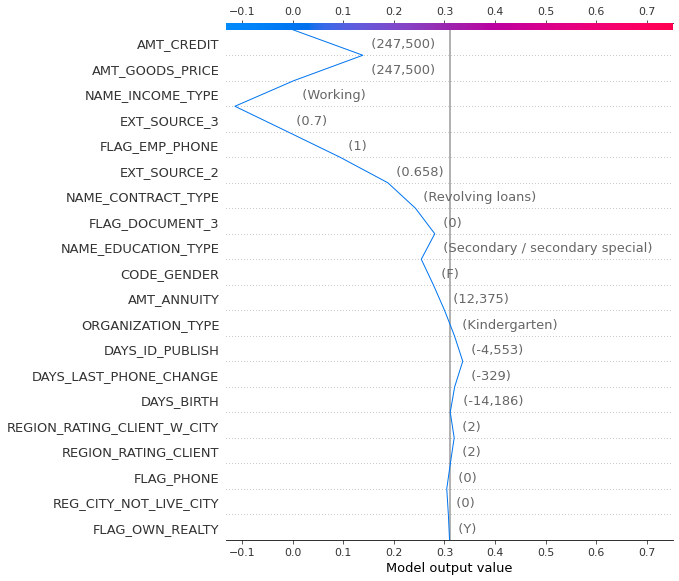

In [188]:
shap.decision_plot(shap_kernel_explainer.expected_value, shap_values_single, X_test.iloc[[10]])

##### Les variables qui expliquent le plus le résultat pour cet individu sont :
- AMT_CREDIT
- AMT_GOODS_PRICE
- NAME_INCOME_TYPE
- EXT_SOURCE_3
- FLAG_EMP_PHONE
- EXT_SOURCE_2

Les représentations visuelles nous indiquent que l'individu est classé comme n'allant pas faire défaut et nous montrent comment les variables contribuent à cette décision.

### Interprétation globale (pour le modèle dans sa globalité)

In [189]:
shap_values_all = shap_kernel_explainer.shap_values(X_test.iloc[0:100,:])

In [190]:
shap.force_plot(shap_kernel_explainer.expected_value, shap_values_all, X_test.iloc[0:100,:])

In [191]:
shap_values_matrix = shap_kernel_explainer.shap_values(X_test.iloc[:100,:])

##### Importance des variables

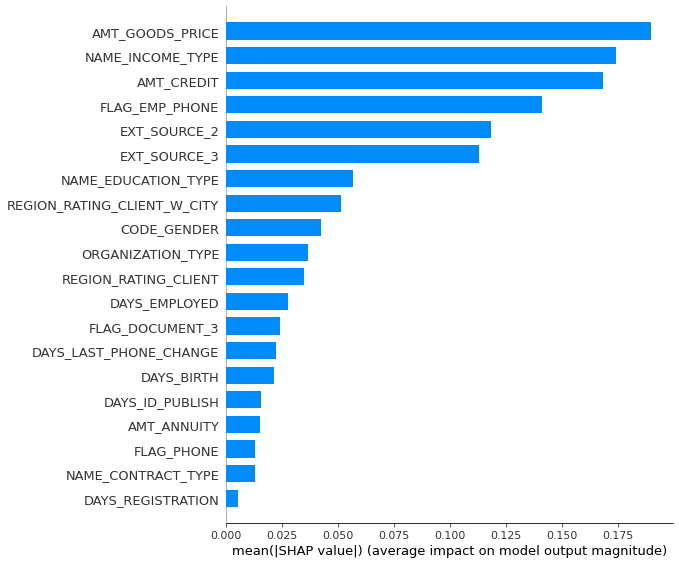

In [192]:
shap.summary_plot(shap_values_matrix, X_test.iloc[:100,:], plot_type='bar')

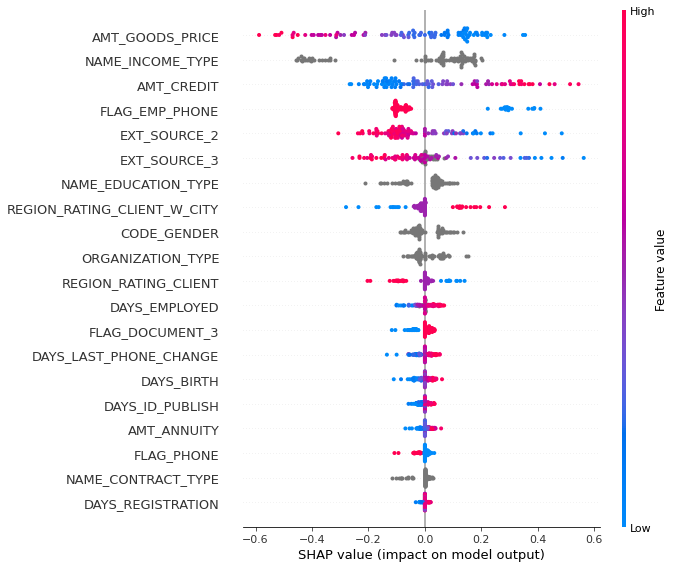

In [193]:
shap.summary_plot(shap_values_matrix, X_test.iloc[:100,:])

##### Les 10 variables les plus importantes sont :
- AMT_GOODS_PRICE
- NAME_INCOME_TYPE
- AMT_CREDIT
- FLAG_EMP_PHONE
- EXT_SOURCE_2
- EXT_SOURCE_3
- NAME_EDUCATION_TYPE
- REGION_RATING_CLIENT_W_CITY
- CODE_GENDER
- ORGANIZATION_TYPE